This notebook deals with the data samples that have a single particle
embedded into them. The main focus is on studying the quantities
related to the embedded track. Studies related to the samples without
single embedded particles and QA for single embedded track samples to
be done in data-driven.ipynb.

We start by importing the necessary modules.

In [1]:
from importlib import reload

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import utils.common
from utils.common import \
    progressbar, flatten, is_embedded_track_id, make_pq_loader, \
    select_trig, TRIG_VPDMB_NOBSMD, TRIG_JP0, TRIG_JP1, TRIG_JP2
from utils.constants import TPC_NUM_ROWS
import utils.efficiency
import utils.plot

In [2]:
utils.plot.setup_paper_style()

Define a helper function to save plots graphics to an output
directory. To ensure that the canvas sizes are the same for all of the
generated plots, we set the bounding box manually.

In [3]:
def save_fig(name, bbox_inches=mpl.transforms.Bbox.from_bounds(-0.2, 0.0, 3.0, 3.0)):
    filename = f"single_track_embedding-output/{name}.pgf"
    print(f"Saving {filename}")
    plt.savefig(filename, bbox_inches=bbox_inches)

Each embedding job produces a separate directory with parquet
files. There are currently six samples: data, embedding and pure MC
for the two center of mass energies.

The current implementation loads the files completely into the memory,
which is likely to go to the swap on most systems. Loading is combined
with some preprocessing which inserts new columns into the pandas
dataframes. The loading takes some time, however, after it's done the
analysis works quickly enough.

In [4]:
def readlines(filename):
    lines = open(filename).read().splitlines()
    return list(map(lambda l: l.replace("/direct/star+u/veprbl/nix/", ""), lines))

In [5]:
filelist = readlines("pp200.sl13b_embed.data_single_track_multi_1b91fc62ed8f8245e3de078224a958ccb749a2bc.lst")
sl13b_embed_13059025_data_single_track = utils.common.concatenate(list(progressbar(map(make_pq_loader(load_thrown_particle=True), filelist), total=len(filelist))))

filelist = readlines("pp200.sl13b_embed.embed_single_track_multi_cff3d69a5315f98cd42ab7c4dd2c4eebecd7c7c2.lst")
sl13b_embed_13059025_embed_single_track = utils.common.concatenate(list(progressbar(map(make_pq_loader(load_thrown_particle=True), filelist), total=len(filelist))))

filelist = readlines("pp200.sl13b_embed.reset_tpcrawdata.embed_single_track_multi_fafd13ddde05957f1faa0a80ebfe37221659369f.lst")
sl13b_embed_13059025_mc_single_track = utils.common.concatenate(list(progressbar(map(make_pq_loader(load_thrown_particle=True), filelist), total=len(filelist))))

  0%|          | 0/480

  0%|          | 1/480

  0%|          | 2/480

  1%|          | 3/480

  1%|          | 4/480

  1%|          | 5/480

  1%|▏         | 6/480

  1%|▏         | 7/480

  2%|▏         | 8/480

  2%|▏         | 9/480

  2%|▏         | 10/480

  2%|▏         | 11/480

  2%|▎         | 12/480

  3%|▎         | 13/480

  3%|▎         | 14/480

  3%|▎         | 15/480

  3%|▎         | 16/480

  4%|▎         | 17/480

  4%|▍         | 18/480

  4%|▍         | 19/480

  4%|▍         | 20/480

  4%|▍         | 21/480

  5%|▍         | 22/480

  5%|▍         | 23/480

  5%|▌         | 24/480

  5%|▌         | 25/480

  5%|▌         | 26/480

  6%|▌         | 27/480

  6%|▌         | 28/480

  6%|▌         | 29/480

  6%|▋         | 30/480

  6%|▋         | 31/480

  7%|▋         | 32/480

  7%|▋         | 33/480

  7%|▋         | 34/480

  7%|▋         | 35/480

  8%|▊         | 36/480

  8%|▊         | 37/480

  8%|▊         | 38/480

  8%|▊         | 39/480

  8%|▊         | 40/480

  9%|▊         | 41/480

  9%|▉         | 42/480

  9%|▉         | 43/480

  9%|▉         | 44/480

  9%|▉         | 45/480

 10%|▉         | 46/480

 10%|▉         | 47/480

 10%|█         | 48/480

 10%|█         | 49/480

 10%|█         | 50/480

 11%|█         | 51/480

 11%|█         | 52/480

 11%|█         | 53/480

 11%|█▏        | 54/480

 11%|█▏        | 55/480

 12%|█▏        | 56/480

 12%|█▏        | 57/480

 12%|█▏        | 59/480

 12%|█▎        | 60/480

 13%|█▎        | 61/480

 13%|█▎        | 62/480

 13%|█▎        | 63/480

 13%|█▎        | 64/480

 14%|█▎        | 65/480

 14%|█▍        | 66/480

 14%|█▍        | 67/480

 14%|█▍        | 68/480

 14%|█▍        | 69/480

 15%|█▍        | 70/480

 15%|█▍        | 71/480

 15%|█▌        | 72/480

 15%|█▌        | 73/480

 15%|█▌        | 74/480

 16%|█▌        | 75/480

 16%|█▌        | 76/480

 16%|█▌        | 77/480

 16%|█▋        | 78/480

 16%|█▋        | 79/480

 17%|█▋        | 80/480

 17%|█▋        | 81/480

 17%|█▋        | 82/480

 17%|█▋        | 83/480

 18%|█▊        | 84/480

 18%|█▊        | 85/480

 18%|█▊        | 86/480

 18%|█▊        | 87/480

 18%|█▊        | 88/480

 19%|█▊        | 89/480

 19%|█▉        | 90/480

 19%|█▉        | 91/480

 19%|█▉        | 92/480

 20%|█▉        | 94/480

 20%|█▉        | 95/480

 20%|██        | 96/480

 20%|██        | 97/480

 20%|██        | 98/480

 21%|██        | 99/480

 21%|██        | 100/480

 21%|██        | 101/480

 21%|██▏       | 102/480

 21%|██▏       | 103/480

 22%|██▏       | 104/480

 22%|██▏       | 105/480

 22%|██▏       | 106/480

 22%|██▏       | 107/480

 22%|██▎       | 108/480

 23%|██▎       | 109/480

 23%|██▎       | 110/480

 23%|██▎       | 111/480

 23%|██▎       | 112/480

 24%|██▎       | 113/480

 24%|██▍       | 114/480

 24%|██▍       | 115/480

 24%|██▍       | 116/480

 24%|██▍       | 117/480

 25%|██▍       | 118/480

 25%|██▍       | 119/480

 25%|██▌       | 120/480

 25%|██▌       | 121/480

 25%|██▌       | 122/480

 26%|██▌       | 123/480

 26%|██▌       | 124/480

 26%|██▌       | 125/480

 26%|██▋       | 126/480

 26%|██▋       | 127/480

 27%|██▋       | 128/480

 27%|██▋       | 129/480

 27%|██▋       | 130/480

 27%|██▋       | 131/480

 28%|██▊       | 132/480

 28%|██▊       | 133/480

 28%|██▊       | 134/480

 28%|██▊       | 136/480

 29%|██▊       | 137/480

 29%|██▉       | 138/480

 29%|██▉       | 139/480

 29%|██▉       | 140/480

 29%|██▉       | 141/480

 30%|██▉       | 142/480

 30%|███       | 144/480

 30%|███       | 145/480

 30%|███       | 146/480

 31%|███       | 147/480

 31%|███       | 148/480

 31%|███       | 149/480

 31%|███▏      | 150/480

 31%|███▏      | 151/480

 32%|███▏      | 152/480

 32%|███▏      | 153/480

 32%|███▏      | 154/480

 32%|███▏      | 155/480

 32%|███▎      | 156/480

 33%|███▎      | 157/480

 33%|███▎      | 158/480

 33%|███▎      | 159/480

 33%|███▎      | 160/480

 34%|███▎      | 161/480

 34%|███▍      | 162/480

 34%|███▍      | 163/480

 34%|███▍      | 164/480

 34%|███▍      | 165/480

 35%|███▍      | 166/480

 35%|███▍      | 167/480

 35%|███▌      | 168/480

 35%|███▌      | 169/480

 35%|███▌      | 170/480

 36%|███▌      | 171/480

 36%|███▌      | 172/480

 36%|███▌      | 173/480

 36%|███▋      | 174/480

 36%|███▋      | 175/480

 37%|███▋      | 176/480

 37%|███▋      | 177/480

 37%|███▋      | 178/480

 37%|███▋      | 179/480

 38%|███▊      | 180/480

 38%|███▊      | 181/480

 38%|███▊      | 182/480

 38%|███▊      | 183/480

 38%|███▊      | 184/480

 39%|███▊      | 185/480

 39%|███▉      | 186/480

 39%|███▉      | 188/480

 39%|███▉      | 189/480

 40%|███▉      | 190/480

 40%|███▉      | 191/480

 40%|████      | 192/480

 40%|████      | 193/480

 40%|████      | 194/480

 41%|████      | 195/480

 41%|████      | 196/480

 41%|████      | 197/480

 41%|████▏     | 198/480

 41%|████▏     | 199/480

 42%|████▏     | 200/480

 42%|████▏     | 201/480

 42%|████▏     | 202/480

 42%|████▏     | 203/480

 42%|████▎     | 204/480

 43%|████▎     | 205/480

 43%|████▎     | 206/480

 43%|████▎     | 207/480

 43%|████▎     | 208/480

 44%|████▎     | 209/480

 44%|████▍     | 211/480

 44%|████▍     | 212/480

 44%|████▍     | 213/480

 45%|████▍     | 214/480

 45%|████▍     | 215/480

 45%|████▌     | 217/480

 45%|████▌     | 218/480

 46%|████▌     | 219/480

 46%|████▌     | 220/480

 46%|████▌     | 221/480

 46%|████▋     | 222/480

 46%|████▋     | 223/480

 47%|████▋     | 224/480

 47%|████▋     | 225/480

 47%|████▋     | 226/480

 47%|████▋     | 227/480

 48%|████▊     | 228/480

 48%|████▊     | 229/480

 48%|████▊     | 230/480

 48%|████▊     | 231/480

 48%|████▊     | 232/480

 49%|████▊     | 233/480

 49%|████▉     | 234/480

 49%|████▉     | 235/480

 49%|████▉     | 236/480

 49%|████▉     | 237/480

 50%|████▉     | 238/480

 50%|████▉     | 239/480

 50%|█████     | 240/480

 50%|█████     | 241/480

 50%|█████     | 242/480

 51%|█████     | 243/480

 51%|█████     | 244/480

 51%|█████     | 245/480

 51%|█████▏    | 246/480

 51%|█████▏    | 247/480

 52%|█████▏    | 248/480

 52%|█████▏    | 249/480

 52%|█████▏    | 250/480

 52%|█████▏    | 251/480

 52%|█████▎    | 252/480

 53%|█████▎    | 253/480

 53%|█████▎    | 254/480

 53%|█████▎    | 256/480

 54%|█████▎    | 257/480

 54%|█████▍    | 258/480

 54%|█████▍    | 259/480

 54%|█████▍    | 260/480

 54%|█████▍    | 261/480

 55%|█████▍    | 262/480

 55%|█████▍    | 263/480

 55%|█████▌    | 264/480

 55%|█████▌    | 265/480

 55%|█████▌    | 266/480

 56%|█████▌    | 267/480

 56%|█████▌    | 268/480

 56%|█████▌    | 269/480

 56%|█████▋    | 270/480

 56%|█████▋    | 271/480

 57%|█████▋    | 272/480

 57%|█████▋    | 274/480

 57%|█████▋    | 275/480

 57%|█████▊    | 276/480

 58%|█████▊    | 278/480

 58%|█████▊    | 279/480

 58%|█████▊    | 280/480

 59%|█████▊    | 281/480

 59%|█████▉    | 283/480

 59%|█████▉    | 284/480

 59%|█████▉    | 285/480

 60%|█████▉    | 286/480

 60%|█████▉    | 287/480

 60%|██████    | 288/480

 60%|██████    | 289/480

 60%|██████    | 290/480

 61%|██████    | 291/480

 61%|██████    | 292/480

 61%|██████    | 293/480

 61%|██████▏   | 294/480

 61%|██████▏   | 295/480

 62%|██████▏   | 296/480

 62%|██████▏   | 297/480

 62%|██████▏   | 298/480

 62%|██████▏   | 299/480

 62%|██████▎   | 300/480

 63%|██████▎   | 301/480

 63%|██████▎   | 302/480

 63%|██████▎   | 303/480

 63%|██████▎   | 304/480

 64%|██████▎   | 305/480

 64%|██████▍   | 306/480

 64%|██████▍   | 307/480

 64%|██████▍   | 308/480

 64%|██████▍   | 309/480

 65%|██████▍   | 310/480

 65%|██████▍   | 311/480

 65%|██████▌   | 312/480

 65%|██████▌   | 313/480

 65%|██████▌   | 314/480

 66%|██████▌   | 315/480

 66%|██████▌   | 316/480

 66%|██████▌   | 317/480

 66%|██████▋   | 318/480

 66%|██████▋   | 319/480

 67%|██████▋   | 320/480

 67%|██████▋   | 321/480

 67%|██████▋   | 323/480

 68%|██████▊   | 324/480

 68%|██████▊   | 325/480

 68%|██████▊   | 326/480

 68%|██████▊   | 328/480

 69%|██████▊   | 329/480

 69%|██████▉   | 330/480

 69%|██████▉   | 331/480

 69%|██████▉   | 332/480

 69%|██████▉   | 333/480

 70%|██████▉   | 334/480

 70%|██████▉   | 335/480

 70%|███████   | 336/480

 70%|███████   | 337/480

 70%|███████   | 338/480

 71%|███████   | 339/480

 71%|███████   | 340/480

 71%|███████   | 341/480

 71%|███████▏  | 342/480

 71%|███████▏  | 343/480

 72%|███████▏  | 344/480

 72%|███████▏  | 345/480

 72%|███████▏  | 346/480

 72%|███████▏  | 347/480

 72%|███████▎  | 348/480

 73%|███████▎  | 349/480

 73%|███████▎  | 350/480

 73%|███████▎  | 351/480

 73%|███████▎  | 352/480

 74%|███████▎  | 353/480

 74%|███████▍  | 354/480

 74%|███████▍  | 355/480

 74%|███████▍  | 356/480

 74%|███████▍  | 357/480

 75%|███████▍  | 358/480

 75%|███████▍  | 359/480

 75%|███████▌  | 360/480

 75%|███████▌  | 362/480

 76%|███████▌  | 363/480

 76%|███████▌  | 364/480

 76%|███████▌  | 365/480

 76%|███████▋  | 366/480

 76%|███████▋  | 367/480

 77%|███████▋  | 368/480

 77%|███████▋  | 369/480

 77%|███████▋  | 370/480

 77%|███████▋  | 371/480

 78%|███████▊  | 372/480

 78%|███████▊  | 373/480

 78%|███████▊  | 374/480

 78%|███████▊  | 375/480

 78%|███████▊  | 376/480

 79%|███████▊  | 377/480

 79%|███████▉  | 378/480

 79%|███████▉  | 379/480

 79%|███████▉  | 380/480

 79%|███████▉  | 381/480

 80%|███████▉  | 382/480

 80%|███████▉  | 383/480

 80%|████████  | 384/480

 80%|████████  | 385/480

 80%|████████  | 386/480

 81%|████████  | 387/480

 81%|████████  | 388/480

 81%|████████  | 389/480

 81%|████████▏ | 390/480

 81%|████████▏ | 391/480

 82%|████████▏ | 393/480

 82%|████████▏ | 394/480

 82%|████████▏ | 395/480

 82%|████████▎ | 396/480

 83%|████████▎ | 397/480

 83%|████████▎ | 398/480

 83%|████████▎ | 399/480

 83%|████████▎ | 400/480

 84%|████████▎ | 401/480

 84%|████████▍ | 402/480

 84%|████████▍ | 403/480

 84%|████████▍ | 404/480

 84%|████████▍ | 405/480

 85%|████████▍ | 406/480

 85%|████████▍ | 407/480

 85%|████████▌ | 408/480

 85%|████████▌ | 409/480

 85%|████████▌ | 410/480

 86%|████████▌ | 411/480

 86%|████████▌ | 412/480

 86%|████████▌ | 413/480

 86%|████████▋ | 414/480

 86%|████████▋ | 415/480

 87%|████████▋ | 416/480

 87%|████████▋ | 417/480

 87%|████████▋ | 418/480

 87%|████████▋ | 419/480

 88%|████████▊ | 420/480

 88%|████████▊ | 421/480

 88%|████████▊ | 422/480

 88%|████████▊ | 423/480

 88%|████████▊ | 424/480

 89%|████████▊ | 425/480

 89%|████████▉ | 426/480

 89%|████████▉ | 427/480

 89%|████████▉ | 428/480

 89%|████████▉ | 429/480

 90%|████████▉ | 430/480

 90%|████████▉ | 431/480

 90%|█████████ | 432/480

 90%|█████████ | 433/480

 90%|█████████ | 434/480

 91%|█████████ | 435/480

 91%|█████████ | 436/480

 91%|█████████ | 437/480

 91%|█████████▏| 438/480

 91%|█████████▏| 439/480

 92%|█████████▏| 440/480

 92%|█████████▏| 441/480

 92%|█████████▏| 442/480

 92%|█████████▏| 443/480

 92%|█████████▎| 444/480

 93%|█████████▎| 445/480

 93%|█████████▎| 446/480

 93%|█████████▎| 447/480

 93%|█████████▎| 448/480

 94%|█████████▎| 449/480

 94%|█████████▍| 450/480

 94%|█████████▍| 451/480

 94%|█████████▍| 452/480

 94%|█████████▍| 453/480

 95%|█████████▍| 454/480

 95%|█████████▍| 455/480

 95%|█████████▌| 456/480

 95%|█████████▌| 457/480

 95%|█████████▌| 458/480

 96%|█████████▌| 459/480

 96%|█████████▌| 460/480

 96%|█████████▌| 461/480

 96%|█████████▋| 462/480

 96%|█████████▋| 463/480

 97%|█████████▋| 464/480

 97%|█████████▋| 465/480

 97%|█████████▋| 466/480

 97%|█████████▋| 467/480

 98%|█████████▊| 468/480

 98%|█████████▊| 469/480

 98%|█████████▊| 470/480

 98%|█████████▊| 471/480

 98%|█████████▊| 472/480

 99%|█████████▊| 473/480

 99%|█████████▉| 474/480

 99%|█████████▉| 475/480

 99%|█████████▉| 476/480

 99%|█████████▉| 477/480

100%|█████████▉| 478/480

100%|█████████▉| 479/480

100%|██████████| 480/480

100%|██████████| 480/480

  0%|          | 0/800

  0%|          | 1/800

  0%|          | 2/800

  0%|          | 3/800

  0%|          | 4/800

  1%|          | 5/800

  1%|          | 6/800

  1%|          | 7/800

  1%|          | 8/800

  1%|          | 9/800

  1%|▏         | 10/800

  1%|▏         | 11/800

  2%|▏         | 12/800

  2%|▏         | 13/800

  2%|▏         | 14/800

  2%|▏         | 15/800

  2%|▏         | 16/800

  2%|▏         | 17/800

  2%|▏         | 18/800

  2%|▏         | 19/800

  2%|▎         | 20/800

  3%|▎         | 21/800

  3%|▎         | 22/800

  3%|▎         | 23/800

  3%|▎         | 24/800

  3%|▎         | 25/800

  3%|▎         | 26/800

  3%|▎         | 27/800

  4%|▎         | 28/800

  4%|▎         | 29/800

  4%|▍         | 30/800

  4%|▍         | 31/800

  4%|▍         | 32/800

  4%|▍         | 33/800

  4%|▍         | 34/800

  4%|▍         | 35/800

  4%|▍         | 36/800

  5%|▍         | 37/800

  5%|▍         | 38/800

  5%|▍         | 39/800

  5%|▌         | 40/800

  5%|▌         | 41/800

  5%|▌         | 42/800

  5%|▌         | 43/800

  6%|▌         | 44/800

  6%|▌         | 45/800

  6%|▌         | 46/800

  6%|▌         | 47/800

  6%|▌         | 48/800

  6%|▌         | 49/800

  6%|▋         | 50/800

  6%|▋         | 51/800

  6%|▋         | 52/800

  7%|▋         | 53/800

  7%|▋         | 54/800

  7%|▋         | 55/800

  7%|▋         | 56/800

  7%|▋         | 57/800

  7%|▋         | 58/800

  7%|▋         | 59/800

  8%|▊         | 60/800

  8%|▊         | 61/800

  8%|▊         | 62/800

  8%|▊         | 63/800

  8%|▊         | 64/800

  8%|▊         | 65/800

  8%|▊         | 66/800

  8%|▊         | 67/800

  8%|▊         | 68/800

  9%|▊         | 69/800

  9%|▉         | 70/800

  9%|▉         | 71/800

  9%|▉         | 72/800

  9%|▉         | 73/800

  9%|▉         | 74/800

  9%|▉         | 75/800

 10%|▉         | 76/800

 10%|▉         | 77/800

 10%|▉         | 78/800

 10%|▉         | 79/800

 10%|█         | 80/800

 10%|█         | 81/800

 10%|█         | 82/800

 10%|█         | 83/800

 10%|█         | 84/800

 11%|█         | 85/800

 11%|█         | 86/800

 11%|█         | 87/800

 11%|█         | 88/800

 11%|█         | 89/800

 11%|█▏        | 90/800

 11%|█▏        | 91/800

 12%|█▏        | 92/800

 12%|█▏        | 93/800

 12%|█▏        | 94/800

 12%|█▏        | 95/800

 12%|█▏        | 96/800

 12%|█▏        | 97/800

 12%|█▏        | 98/800

 12%|█▏        | 99/800

 12%|█▎        | 100/800

 13%|█▎        | 101/800

 13%|█▎        | 102/800

 13%|█▎        | 103/800

 13%|█▎        | 104/800

 13%|█▎        | 105/800

 13%|█▎        | 106/800

 13%|█▎        | 107/800

 14%|█▎        | 108/800

 14%|█▎        | 109/800

 14%|█▍        | 110/800

 14%|█▍        | 111/800

 14%|█▍        | 112/800

 14%|█▍        | 113/800

 14%|█▍        | 114/800

 14%|█▍        | 115/800

 14%|█▍        | 116/800

 15%|█▍        | 117/800

 15%|█▍        | 118/800

 15%|█▍        | 119/800

 15%|█▌        | 120/800

 15%|█▌        | 121/800

 15%|█▌        | 122/800

 15%|█▌        | 123/800

 16%|█▌        | 124/800

 16%|█▌        | 125/800

 16%|█▌        | 126/800

 16%|█▌        | 127/800

 16%|█▌        | 128/800

 16%|█▌        | 129/800

 16%|█▋        | 130/800

 16%|█▋        | 131/800

 16%|█▋        | 132/800

 17%|█▋        | 133/800

 17%|█▋        | 134/800

 17%|█▋        | 135/800

 17%|█▋        | 136/800

 17%|█▋        | 137/800

 17%|█▋        | 138/800

 17%|█▋        | 139/800

 18%|█▊        | 140/800

 18%|█▊        | 141/800

 18%|█▊        | 142/800

 18%|█▊        | 143/800

 18%|█▊        | 144/800

 18%|█▊        | 145/800

 18%|█▊        | 146/800

 18%|█▊        | 147/800

 18%|█▊        | 148/800

 19%|█▊        | 149/800

 19%|█▉        | 150/800

 19%|█▉        | 151/800

 19%|█▉        | 152/800

 19%|█▉        | 153/800

 19%|█▉        | 154/800

 19%|█▉        | 155/800

 20%|█▉        | 156/800

 20%|█▉        | 157/800

 20%|█▉        | 158/800

 20%|█▉        | 159/800

 20%|██        | 160/800

 20%|██        | 161/800

 20%|██        | 162/800

 20%|██        | 163/800

 20%|██        | 164/800

 21%|██        | 165/800

 21%|██        | 166/800

 21%|██        | 167/800

 21%|██        | 168/800

 21%|██        | 169/800

 21%|██▏       | 170/800

 21%|██▏       | 171/800

 22%|██▏       | 172/800

 22%|██▏       | 173/800

 22%|██▏       | 174/800

 22%|██▏       | 175/800

 22%|██▏       | 176/800

 22%|██▏       | 177/800

 22%|██▏       | 178/800

 22%|██▏       | 179/800

 22%|██▎       | 180/800

 23%|██▎       | 181/800

 23%|██▎       | 182/800

 23%|██▎       | 183/800

 23%|██▎       | 184/800

 23%|██▎       | 185/800

 23%|██▎       | 186/800

 23%|██▎       | 187/800

 24%|██▎       | 188/800

 24%|██▎       | 189/800

 24%|██▍       | 190/800

 24%|██▍       | 191/800

 24%|██▍       | 192/800

 24%|██▍       | 193/800

 24%|██▍       | 194/800

 24%|██▍       | 195/800

 24%|██▍       | 196/800

 25%|██▍       | 197/800

 25%|██▍       | 198/800

 25%|██▍       | 199/800

 25%|██▌       | 200/800

 25%|██▌       | 201/800

 25%|██▌       | 202/800

 25%|██▌       | 203/800

 26%|██▌       | 204/800

 26%|██▌       | 205/800

 26%|██▌       | 206/800

 26%|██▌       | 207/800

 26%|██▌       | 208/800

 26%|██▌       | 209/800

 26%|██▋       | 210/800

 26%|██▋       | 211/800

 26%|██▋       | 212/800

 27%|██▋       | 213/800

 27%|██▋       | 214/800

 27%|██▋       | 215/800

 27%|██▋       | 216/800

 27%|██▋       | 217/800

 27%|██▋       | 218/800

 27%|██▋       | 219/800

 28%|██▊       | 220/800

 28%|██▊       | 221/800

 28%|██▊       | 222/800

 28%|██▊       | 223/800

 28%|██▊       | 224/800

 28%|██▊       | 225/800

 28%|██▊       | 226/800

 28%|██▊       | 227/800

 28%|██▊       | 228/800

 29%|██▊       | 229/800

 29%|██▉       | 230/800

 29%|██▉       | 231/800

 29%|██▉       | 232/800

 29%|██▉       | 233/800

 29%|██▉       | 234/800

 29%|██▉       | 235/800

 30%|██▉       | 236/800

 30%|██▉       | 237/800

 30%|██▉       | 238/800

 30%|██▉       | 239/800

 30%|███       | 240/800

 30%|███       | 241/800

 30%|███       | 242/800

 30%|███       | 243/800

 30%|███       | 244/800

 31%|███       | 245/800

 31%|███       | 246/800

 31%|███       | 247/800

 31%|███       | 248/800

 31%|███       | 249/800

 31%|███▏      | 250/800

 31%|███▏      | 251/800

 32%|███▏      | 252/800

 32%|███▏      | 253/800

 32%|███▏      | 254/800

 32%|███▏      | 255/800

 32%|███▏      | 256/800

 32%|███▏      | 257/800

 32%|███▏      | 258/800

 32%|███▏      | 259/800

 32%|███▎      | 260/800

 33%|███▎      | 261/800

 33%|███▎      | 262/800

 33%|███▎      | 263/800

 33%|███▎      | 264/800

 33%|███▎      | 265/800

 33%|███▎      | 266/800

 33%|███▎      | 267/800

 34%|███▎      | 268/800

 34%|███▎      | 269/800

 34%|███▍      | 270/800

 34%|███▍      | 271/800

 34%|███▍      | 272/800

 34%|███▍      | 273/800

 34%|███▍      | 274/800

 34%|███▍      | 275/800

 34%|███▍      | 276/800

 35%|███▍      | 277/800

 35%|███▍      | 278/800

 35%|███▍      | 279/800

 35%|███▌      | 280/800

 35%|███▌      | 281/800

 35%|███▌      | 282/800

 35%|███▌      | 283/800

 36%|███▌      | 284/800

 36%|███▌      | 285/800

 36%|███▌      | 286/800

 36%|███▌      | 287/800

 36%|███▌      | 288/800

 36%|███▌      | 289/800

 36%|███▋      | 290/800

 36%|███▋      | 291/800

 36%|███▋      | 292/800

 37%|███▋      | 293/800

 37%|███▋      | 294/800

 37%|███▋      | 295/800

 37%|███▋      | 296/800

 37%|███▋      | 297/800

 37%|███▋      | 298/800

 37%|███▋      | 299/800

 38%|███▊      | 300/800

 38%|███▊      | 301/800

 38%|███▊      | 302/800

 38%|███▊      | 303/800

 38%|███▊      | 304/800

 38%|███▊      | 305/800

 38%|███▊      | 306/800

 38%|███▊      | 307/800

 38%|███▊      | 308/800

 39%|███▊      | 309/800

 39%|███▉      | 310/800

 39%|███▉      | 311/800

 39%|███▉      | 312/800

 39%|███▉      | 313/800

 39%|███▉      | 314/800

 39%|███▉      | 315/800

 40%|███▉      | 316/800

 40%|███▉      | 317/800

 40%|███▉      | 318/800

 40%|███▉      | 319/800

 40%|████      | 320/800

 40%|████      | 321/800

 40%|████      | 322/800

 40%|████      | 323/800

 40%|████      | 324/800

 41%|████      | 325/800

 41%|████      | 326/800

 41%|████      | 327/800

 41%|████      | 328/800

 41%|████      | 329/800

 41%|████▏     | 330/800

 41%|████▏     | 331/800

 42%|████▏     | 332/800

 42%|████▏     | 333/800

 42%|████▏     | 334/800

 42%|████▏     | 335/800

 42%|████▏     | 336/800

 42%|████▏     | 337/800

 42%|████▏     | 338/800

 42%|████▏     | 339/800

 42%|████▎     | 340/800

 43%|████▎     | 341/800

 43%|████▎     | 342/800

 43%|████▎     | 343/800

 43%|████▎     | 344/800

 43%|████▎     | 345/800

 43%|████▎     | 346/800

 43%|████▎     | 347/800

 44%|████▎     | 348/800

 44%|████▎     | 349/800

 44%|████▍     | 350/800

 44%|████▍     | 351/800

 44%|████▍     | 352/800

 44%|████▍     | 353/800

 44%|████▍     | 354/800

 44%|████▍     | 355/800

 44%|████▍     | 356/800

 45%|████▍     | 357/800

 45%|████▍     | 358/800

 45%|████▍     | 359/800

 45%|████▌     | 360/800

 45%|████▌     | 361/800

 45%|████▌     | 362/800

 45%|████▌     | 363/800

 46%|████▌     | 364/800

 46%|████▌     | 365/800

 46%|████▌     | 366/800

 46%|████▌     | 367/800

 46%|████▌     | 368/800

 46%|████▌     | 369/800

 46%|████▋     | 370/800

 46%|████▋     | 371/800

 46%|████▋     | 372/800

 47%|████▋     | 373/800

 47%|████▋     | 374/800

 47%|████▋     | 375/800

 47%|████▋     | 376/800

 47%|████▋     | 377/800

 47%|████▋     | 378/800

 47%|████▋     | 379/800

 48%|████▊     | 380/800

 48%|████▊     | 381/800

 48%|████▊     | 382/800

 48%|████▊     | 383/800

 48%|████▊     | 384/800

 48%|████▊     | 385/800

 48%|████▊     | 386/800

 48%|████▊     | 387/800

 48%|████▊     | 388/800

 49%|████▊     | 389/800

 49%|████▉     | 390/800

 49%|████▉     | 391/800

 49%|████▉     | 392/800

 49%|████▉     | 393/800

 49%|████▉     | 394/800

 49%|████▉     | 395/800

 50%|████▉     | 396/800

 50%|████▉     | 397/800

 50%|████▉     | 398/800

 50%|████▉     | 399/800

 50%|█████     | 400/800

 50%|█████     | 401/800

 50%|█████     | 402/800

 50%|█████     | 403/800

 50%|█████     | 404/800

 51%|█████     | 405/800

 51%|█████     | 406/800

 51%|█████     | 407/800

 51%|█████     | 408/800

 51%|█████     | 409/800

 51%|█████▏    | 410/800

 51%|█████▏    | 411/800

 52%|█████▏    | 412/800

 52%|█████▏    | 413/800

 52%|█████▏    | 414/800

 52%|█████▏    | 415/800

 52%|█████▏    | 416/800

 52%|█████▏    | 417/800

 52%|█████▏    | 418/800

 52%|█████▏    | 419/800

 52%|█████▎    | 420/800

 53%|█████▎    | 421/800

 53%|█████▎    | 422/800

 53%|█████▎    | 423/800

 53%|█████▎    | 424/800

 53%|█████▎    | 425/800

 53%|█████▎    | 426/800

 53%|█████▎    | 427/800

 54%|█████▎    | 428/800

 54%|█████▎    | 429/800

 54%|█████▍    | 430/800

 54%|█████▍    | 431/800

 54%|█████▍    | 432/800

 54%|█████▍    | 433/800

 54%|█████▍    | 434/800

 54%|█████▍    | 435/800

 55%|█████▍    | 436/800

 55%|█████▍    | 437/800

 55%|█████▍    | 438/800

 55%|█████▍    | 439/800

 55%|█████▌    | 440/800

 55%|█████▌    | 441/800

 55%|█████▌    | 442/800

 55%|█████▌    | 443/800

 56%|█████▌    | 444/800

 56%|█████▌    | 445/800

 56%|█████▌    | 446/800

 56%|█████▌    | 447/800

 56%|█████▌    | 448/800

 56%|█████▌    | 449/800

 56%|█████▋    | 450/800

 56%|█████▋    | 451/800

 56%|█████▋    | 452/800

 57%|█████▋    | 453/800

 57%|█████▋    | 454/800

 57%|█████▋    | 455/800

 57%|█████▋    | 456/800

 57%|█████▋    | 457/800

 57%|█████▋    | 458/800

 57%|█████▋    | 459/800

 57%|█████▊    | 460/800

 58%|█████▊    | 461/800

 58%|█████▊    | 462/800

 58%|█████▊    | 463/800

 58%|█████▊    | 464/800

 58%|█████▊    | 465/800

 58%|█████▊    | 466/800

 58%|█████▊    | 467/800

 58%|█████▊    | 468/800

 59%|█████▊    | 469/800

 59%|█████▉    | 470/800

 59%|█████▉    | 471/800

 59%|█████▉    | 472/800

 59%|█████▉    | 473/800

 59%|█████▉    | 474/800

 59%|█████▉    | 475/800

 60%|█████▉    | 476/800

 60%|█████▉    | 477/800

 60%|█████▉    | 478/800

 60%|█████▉    | 479/800

 60%|██████    | 480/800

 60%|██████    | 481/800

 60%|██████    | 482/800

 60%|██████    | 483/800

 60%|██████    | 484/800

 61%|██████    | 485/800

 61%|██████    | 486/800

 61%|██████    | 487/800

 61%|██████    | 488/800

 61%|██████    | 489/800

 61%|██████▏   | 490/800

 61%|██████▏   | 491/800

 62%|██████▏   | 492/800

 62%|██████▏   | 493/800

 62%|██████▏   | 494/800

 62%|██████▏   | 495/800

 62%|██████▏   | 496/800

 62%|██████▏   | 497/800

 62%|██████▏   | 498/800

 62%|██████▏   | 499/800

 62%|██████▎   | 500/800

 63%|██████▎   | 501/800

 63%|██████▎   | 502/800

 63%|██████▎   | 503/800

 63%|██████▎   | 504/800

 63%|██████▎   | 505/800

 63%|██████▎   | 506/800

 63%|██████▎   | 507/800

 64%|██████▎   | 508/800

 64%|██████▎   | 509/800

 64%|██████▍   | 510/800

 64%|██████▍   | 511/800

 64%|██████▍   | 512/800

 64%|██████▍   | 513/800

 64%|██████▍   | 514/800

 64%|██████▍   | 515/800

 64%|██████▍   | 516/800

 65%|██████▍   | 517/800

 65%|██████▍   | 518/800

 65%|██████▍   | 519/800

 65%|██████▌   | 520/800

 65%|██████▌   | 521/800

 65%|██████▌   | 522/800

 65%|██████▌   | 523/800

 66%|██████▌   | 524/800

 66%|██████▌   | 525/800

 66%|██████▌   | 526/800

 66%|██████▌   | 527/800

 66%|██████▌   | 528/800

 66%|██████▌   | 529/800

 66%|██████▋   | 530/800

 66%|██████▋   | 531/800

 66%|██████▋   | 532/800

 67%|██████▋   | 533/800

 67%|██████▋   | 534/800

 67%|██████▋   | 535/800

 67%|██████▋   | 536/800

 67%|██████▋   | 537/800

 67%|██████▋   | 538/800

 67%|██████▋   | 539/800

 68%|██████▊   | 540/800

 68%|██████▊   | 541/800

 68%|██████▊   | 542/800

 68%|██████▊   | 543/800

 68%|██████▊   | 544/800

 68%|██████▊   | 545/800

 68%|██████▊   | 546/800

 68%|██████▊   | 547/800

 68%|██████▊   | 548/800

 69%|██████▊   | 549/800

 69%|██████▉   | 550/800

 69%|██████▉   | 551/800

 69%|██████▉   | 552/800

 69%|██████▉   | 553/800

 69%|██████▉   | 554/800

 69%|██████▉   | 555/800

 70%|██████▉   | 556/800

 70%|██████▉   | 557/800

 70%|██████▉   | 558/800

 70%|██████▉   | 559/800

 70%|███████   | 560/800

 70%|███████   | 561/800

 70%|███████   | 562/800

 70%|███████   | 563/800

 70%|███████   | 564/800

 71%|███████   | 565/800

 71%|███████   | 566/800

 71%|███████   | 567/800

 71%|███████   | 568/800

 71%|███████   | 569/800

 71%|███████▏  | 570/800

 71%|███████▏  | 571/800

 72%|███████▏  | 572/800

 72%|███████▏  | 573/800

 72%|███████▏  | 574/800

 72%|███████▏  | 575/800

 72%|███████▏  | 576/800

 72%|███████▏  | 577/800

 72%|███████▏  | 578/800

 72%|███████▏  | 579/800

 72%|███████▎  | 580/800

 73%|███████▎  | 581/800

 73%|███████▎  | 582/800

 73%|███████▎  | 583/800

 73%|███████▎  | 584/800

 73%|███████▎  | 585/800

 73%|███████▎  | 586/800

 73%|███████▎  | 587/800

 74%|███████▎  | 588/800

 74%|███████▎  | 589/800

 74%|███████▍  | 590/800

 74%|███████▍  | 591/800

 74%|███████▍  | 592/800

 74%|███████▍  | 593/800

 74%|███████▍  | 594/800

 74%|███████▍  | 595/800

 74%|███████▍  | 596/800

 75%|███████▍  | 597/800

 75%|███████▍  | 598/800

 75%|███████▍  | 599/800

 75%|███████▌  | 600/800

 75%|███████▌  | 601/800

 75%|███████▌  | 602/800

 75%|███████▌  | 603/800

 76%|███████▌  | 604/800

 76%|███████▌  | 605/800

 76%|███████▌  | 606/800

 76%|███████▌  | 607/800

 76%|███████▌  | 608/800

 76%|███████▌  | 609/800

 76%|███████▋  | 610/800

 76%|███████▋  | 611/800

 76%|███████▋  | 612/800

 77%|███████▋  | 613/800

 77%|███████▋  | 614/800

 77%|███████▋  | 615/800

 77%|███████▋  | 616/800

 77%|███████▋  | 617/800

 77%|███████▋  | 618/800

 77%|███████▋  | 619/800

 78%|███████▊  | 620/800

 78%|███████▊  | 621/800

 78%|███████▊  | 622/800

 78%|███████▊  | 623/800

 78%|███████▊  | 624/800

 78%|███████▊  | 625/800

 78%|███████▊  | 626/800

 78%|███████▊  | 627/800

 78%|███████▊  | 628/800

 79%|███████▊  | 629/800

 79%|███████▉  | 630/800

 79%|███████▉  | 631/800

 79%|███████▉  | 632/800

 79%|███████▉  | 633/800

 79%|███████▉  | 634/800

 79%|███████▉  | 635/800

 80%|███████▉  | 636/800

 80%|███████▉  | 637/800

 80%|███████▉  | 638/800

 80%|███████▉  | 639/800

 80%|████████  | 640/800

 80%|████████  | 641/800

 80%|████████  | 642/800

 80%|████████  | 643/800

 80%|████████  | 644/800

 81%|████████  | 645/800

 81%|████████  | 646/800

 81%|████████  | 647/800

 81%|████████  | 648/800

 81%|████████  | 649/800

 81%|████████▏ | 650/800

 81%|████████▏ | 651/800

 82%|████████▏ | 652/800

 82%|████████▏ | 653/800

 82%|████████▏ | 654/800

 82%|████████▏ | 655/800

 82%|████████▏ | 656/800

 82%|████████▏ | 657/800

 82%|████████▏ | 658/800

 82%|████████▏ | 659/800

 82%|████████▎ | 660/800

 83%|████████▎ | 661/800

 83%|████████▎ | 662/800

 83%|████████▎ | 663/800

 83%|████████▎ | 664/800

 83%|████████▎ | 665/800

 83%|████████▎ | 666/800

 83%|████████▎ | 667/800

 84%|████████▎ | 668/800

 84%|████████▎ | 669/800

 84%|████████▍ | 670/800

 84%|████████▍ | 671/800

 84%|████████▍ | 672/800

 84%|████████▍ | 673/800

 84%|████████▍ | 674/800

 84%|████████▍ | 675/800

 84%|████████▍ | 676/800

 85%|████████▍ | 677/800

 85%|████████▍ | 678/800

 85%|████████▍ | 679/800

 85%|████████▌ | 680/800

 85%|████████▌ | 681/800

 85%|████████▌ | 682/800

 85%|████████▌ | 683/800

 86%|████████▌ | 684/800

 86%|████████▌ | 685/800

 86%|████████▌ | 686/800

 86%|████████▌ | 687/800

 86%|████████▌ | 688/800

 86%|████████▌ | 689/800

 86%|████████▋ | 690/800

 86%|████████▋ | 691/800

 86%|████████▋ | 692/800

 87%|████████▋ | 693/800

 87%|████████▋ | 694/800

 87%|████████▋ | 695/800

 87%|████████▋ | 696/800

 87%|████████▋ | 697/800

 87%|████████▋ | 698/800

 87%|████████▋ | 699/800

 88%|████████▊ | 700/800

 88%|████████▊ | 701/800

 88%|████████▊ | 702/800

 88%|████████▊ | 703/800

 88%|████████▊ | 704/800

 88%|████████▊ | 705/800

 88%|████████▊ | 706/800

 88%|████████▊ | 707/800

 88%|████████▊ | 708/800

 89%|████████▊ | 709/800

 89%|████████▉ | 710/800

 89%|████████▉ | 711/800

 89%|████████▉ | 712/800

 89%|████████▉ | 713/800

 89%|████████▉ | 714/800

 89%|████████▉ | 715/800

 90%|████████▉ | 716/800

 90%|████████▉ | 717/800

 90%|████████▉ | 718/800

 90%|████████▉ | 719/800

 90%|█████████ | 720/800

 90%|█████████ | 721/800

 90%|█████████ | 722/800

 90%|█████████ | 723/800

 90%|█████████ | 724/800

 91%|█████████ | 725/800

 91%|█████████ | 726/800

 91%|█████████ | 727/800

 91%|█████████ | 728/800

 91%|█████████ | 729/800

 91%|█████████▏| 730/800

 91%|█████████▏| 731/800

 92%|█████████▏| 732/800

 92%|█████████▏| 733/800

 92%|█████████▏| 734/800

 92%|█████████▏| 735/800

 92%|█████████▏| 736/800

 92%|█████████▏| 737/800

 92%|█████████▏| 738/800

 92%|█████████▏| 739/800

 92%|█████████▎| 740/800

 93%|█████████▎| 741/800

 93%|█████████▎| 742/800

 93%|█████████▎| 743/800

 93%|█████████▎| 744/800

 93%|█████████▎| 745/800

 93%|█████████▎| 746/800

 93%|█████████▎| 747/800

 94%|█████████▎| 748/800

 94%|█████████▎| 749/800

 94%|█████████▍| 750/800

 94%|█████████▍| 751/800

 94%|█████████▍| 752/800

 94%|█████████▍| 753/800

 94%|█████████▍| 754/800

 94%|█████████▍| 755/800

 94%|█████████▍| 756/800

 95%|█████████▍| 757/800

 95%|█████████▍| 758/800

 95%|█████████▍| 759/800

 95%|█████████▌| 760/800

 95%|█████████▌| 761/800

 95%|█████████▌| 762/800

 95%|█████████▌| 763/800

 96%|█████████▌| 764/800

 96%|█████████▌| 765/800

 96%|█████████▌| 766/800

 96%|█████████▌| 767/800

 96%|█████████▌| 768/800

 96%|█████████▌| 769/800

 96%|█████████▋| 770/800

 96%|█████████▋| 771/800

 96%|█████████▋| 772/800

 97%|█████████▋| 773/800

 97%|█████████▋| 774/800

 97%|█████████▋| 775/800

 97%|█████████▋| 776/800

 97%|█████████▋| 777/800

 97%|█████████▋| 778/800

 97%|█████████▋| 779/800

 98%|█████████▊| 780/800

 98%|█████████▊| 781/800

 98%|█████████▊| 782/800

 98%|█████████▊| 783/800

 98%|█████████▊| 784/800

 98%|█████████▊| 785/800

 98%|█████████▊| 786/800

 98%|█████████▊| 787/800

 98%|█████████▊| 788/800

 99%|█████████▊| 789/800

 99%|█████████▉| 790/800

 99%|█████████▉| 791/800

 99%|█████████▉| 792/800

 99%|█████████▉| 793/800

 99%|█████████▉| 794/800

 99%|█████████▉| 795/800

100%|█████████▉| 796/800

100%|█████████▉| 797/800

100%|█████████▉| 798/800

100%|█████████▉| 799/800

100%|██████████| 800/800

100%|██████████| 800/800

  0%|          | 0/800

  0%|          | 1/800

  0%|          | 2/800

  0%|          | 3/800

  0%|          | 4/800

  1%|          | 5/800

  1%|          | 6/800

  1%|          | 7/800

  1%|          | 8/800

  1%|          | 9/800

  1%|▏         | 10/800

  1%|▏         | 11/800

  2%|▏         | 12/800

  2%|▏         | 13/800

  2%|▏         | 14/800

  2%|▏         | 15/800

  2%|▏         | 16/800

  2%|▏         | 17/800

  2%|▏         | 18/800

  2%|▏         | 19/800

  2%|▎         | 20/800

  3%|▎         | 21/800

  3%|▎         | 22/800

  3%|▎         | 23/800

  3%|▎         | 24/800

  3%|▎         | 25/800

  3%|▎         | 26/800

  3%|▎         | 27/800

  4%|▎         | 28/800

  4%|▎         | 29/800

  4%|▍         | 30/800

  4%|▍         | 31/800

  4%|▍         | 32/800

  4%|▍         | 33/800

  4%|▍         | 34/800

  4%|▍         | 35/800

  4%|▍         | 36/800

  5%|▍         | 37/800

  5%|▍         | 38/800

  5%|▍         | 39/800

  5%|▌         | 40/800

  5%|▌         | 41/800

  5%|▌         | 42/800

  5%|▌         | 43/800

  6%|▌         | 44/800

  6%|▌         | 45/800

  6%|▌         | 46/800

  6%|▌         | 47/800

  6%|▌         | 48/800

  6%|▌         | 49/800

  6%|▋         | 50/800

  6%|▋         | 51/800

  6%|▋         | 52/800

  7%|▋         | 53/800

  7%|▋         | 54/800

  7%|▋         | 55/800

  7%|▋         | 56/800

  7%|▋         | 57/800

  7%|▋         | 58/800

  7%|▋         | 59/800

  8%|▊         | 60/800

  8%|▊         | 61/800

  8%|▊         | 62/800

  8%|▊         | 63/800

  8%|▊         | 64/800

  8%|▊         | 65/800

  8%|▊         | 66/800

  8%|▊         | 67/800

  8%|▊         | 68/800

  9%|▊         | 69/800

  9%|▉         | 70/800

  9%|▉         | 71/800

  9%|▉         | 72/800

  9%|▉         | 73/800

  9%|▉         | 74/800

  9%|▉         | 75/800

 10%|▉         | 76/800

 10%|▉         | 77/800

 10%|▉         | 78/800

 10%|▉         | 79/800

 10%|█         | 80/800

 10%|█         | 81/800

 10%|█         | 82/800

 10%|█         | 83/800

 10%|█         | 84/800

 11%|█         | 85/800

 11%|█         | 86/800

 11%|█         | 87/800

 11%|█         | 88/800

 11%|█         | 89/800

 11%|█▏        | 90/800

 11%|█▏        | 91/800

 12%|█▏        | 92/800

 12%|█▏        | 93/800

 12%|█▏        | 94/800

 12%|█▏        | 95/800

 12%|█▏        | 96/800

 12%|█▏        | 97/800

 12%|█▏        | 98/800

 12%|█▏        | 99/800

 12%|█▎        | 100/800

 13%|█▎        | 101/800

 13%|█▎        | 102/800

 13%|█▎        | 103/800

 13%|█▎        | 104/800

 13%|█▎        | 105/800

 13%|█▎        | 106/800

 13%|█▎        | 107/800

 14%|█▎        | 108/800

 14%|█▎        | 109/800

 14%|█▍        | 110/800

 14%|█▍        | 111/800

 14%|█▍        | 112/800

 14%|█▍        | 113/800

 14%|█▍        | 114/800

 14%|█▍        | 115/800

 14%|█▍        | 116/800

 15%|█▍        | 117/800

 15%|█▍        | 118/800

 15%|█▍        | 119/800

 15%|█▌        | 120/800

 15%|█▌        | 121/800

 15%|█▌        | 122/800

 15%|█▌        | 123/800

 16%|█▌        | 124/800

 16%|█▌        | 125/800

 16%|█▌        | 126/800

 16%|█▌        | 127/800

 16%|█▌        | 128/800

 16%|█▌        | 129/800

 16%|█▋        | 130/800

 16%|█▋        | 131/800

 16%|█▋        | 132/800

 17%|█▋        | 133/800

 17%|█▋        | 134/800

 17%|█▋        | 135/800

 17%|█▋        | 136/800

 17%|█▋        | 137/800

 17%|█▋        | 138/800

 17%|█▋        | 139/800

 18%|█▊        | 140/800

 18%|█▊        | 141/800

 18%|█▊        | 142/800

 18%|█▊        | 143/800

 18%|█▊        | 144/800

 18%|█▊        | 145/800

 18%|█▊        | 146/800

 18%|█▊        | 147/800

 18%|█▊        | 148/800

 19%|█▊        | 149/800

 19%|█▉        | 150/800

 19%|█▉        | 151/800

 19%|█▉        | 152/800

 19%|█▉        | 153/800

 19%|█▉        | 154/800

 19%|█▉        | 155/800

 20%|█▉        | 156/800

 20%|█▉        | 157/800

 20%|█▉        | 158/800

 20%|█▉        | 159/800

 20%|██        | 160/800

 20%|██        | 161/800

 20%|██        | 162/800

 20%|██        | 163/800

 20%|██        | 164/800

 21%|██        | 165/800

 21%|██        | 166/800

 21%|██        | 167/800

 21%|██        | 168/800

 21%|██        | 169/800

 21%|██▏       | 170/800

 21%|██▏       | 171/800

 22%|██▏       | 172/800

 22%|██▏       | 173/800

 22%|██▏       | 174/800

 22%|██▏       | 175/800

 22%|██▏       | 176/800

 22%|██▏       | 177/800

 22%|██▏       | 178/800

 22%|██▏       | 179/800

 22%|██▎       | 180/800

 23%|██▎       | 181/800

 23%|██▎       | 182/800

 23%|██▎       | 183/800

 23%|██▎       | 184/800

 23%|██▎       | 185/800

 23%|██▎       | 186/800

 23%|██▎       | 187/800

 24%|██▎       | 188/800

 24%|██▎       | 189/800

 24%|██▍       | 190/800

 24%|██▍       | 191/800

 24%|██▍       | 192/800

 24%|██▍       | 193/800

 24%|██▍       | 194/800

 24%|██▍       | 195/800

 24%|██▍       | 196/800

 25%|██▍       | 197/800

 25%|██▍       | 198/800

 25%|██▍       | 199/800

 25%|██▌       | 200/800

 25%|██▌       | 201/800

 25%|██▌       | 202/800

 25%|██▌       | 203/800

 26%|██▌       | 204/800

 26%|██▌       | 205/800

 26%|██▌       | 206/800

 26%|██▌       | 207/800

 26%|██▌       | 208/800

 26%|██▌       | 209/800

 26%|██▋       | 210/800

 26%|██▋       | 211/800

 26%|██▋       | 212/800

 27%|██▋       | 213/800

 27%|██▋       | 214/800

 27%|██▋       | 215/800

 27%|██▋       | 216/800

 27%|██▋       | 217/800

 27%|██▋       | 218/800

 27%|██▋       | 219/800

 28%|██▊       | 220/800

 28%|██▊       | 221/800

 28%|██▊       | 222/800

 28%|██▊       | 223/800

 28%|██▊       | 224/800

 28%|██▊       | 225/800

 28%|██▊       | 226/800

 28%|██▊       | 227/800

 28%|██▊       | 228/800

 29%|██▊       | 229/800

 29%|██▉       | 230/800

 29%|██▉       | 231/800

 29%|██▉       | 232/800

 29%|██▉       | 233/800

 29%|██▉       | 234/800

 29%|██▉       | 235/800

 30%|██▉       | 236/800

 30%|██▉       | 237/800

 30%|██▉       | 238/800

 30%|██▉       | 239/800

 30%|███       | 240/800

 30%|███       | 241/800

 30%|███       | 242/800

 30%|███       | 243/800

 30%|███       | 244/800

 31%|███       | 245/800

 31%|███       | 246/800

 31%|███       | 247/800

 31%|███       | 248/800

 31%|███       | 249/800

 31%|███▏      | 250/800

 31%|███▏      | 251/800

 32%|███▏      | 252/800

 32%|███▏      | 253/800

 32%|███▏      | 254/800

 32%|███▏      | 255/800

 32%|███▏      | 256/800

 32%|███▏      | 257/800

 32%|███▏      | 258/800

 32%|███▏      | 259/800

 32%|███▎      | 260/800

 33%|███▎      | 261/800

 33%|███▎      | 262/800

 33%|███▎      | 263/800

 33%|███▎      | 264/800

 33%|███▎      | 265/800

 33%|███▎      | 266/800

 33%|███▎      | 267/800

 34%|███▎      | 268/800

 34%|███▎      | 269/800

 34%|███▍      | 270/800

 34%|███▍      | 271/800

 34%|███▍      | 272/800

 34%|███▍      | 273/800

 34%|███▍      | 274/800

 34%|███▍      | 275/800

 34%|███▍      | 276/800

 35%|███▍      | 277/800

 35%|███▍      | 278/800

 35%|███▍      | 279/800

 35%|███▌      | 280/800

 35%|███▌      | 281/800

 35%|███▌      | 282/800

 35%|███▌      | 283/800

 36%|███▌      | 284/800

 36%|███▌      | 285/800

 36%|███▌      | 286/800

 36%|███▌      | 287/800

 36%|███▌      | 288/800

 36%|███▌      | 289/800

 36%|███▋      | 290/800

 36%|███▋      | 291/800

 36%|███▋      | 292/800

 37%|███▋      | 293/800

 37%|███▋      | 294/800

 37%|███▋      | 295/800

 37%|███▋      | 296/800

 37%|███▋      | 297/800

 37%|███▋      | 298/800

 37%|███▋      | 299/800

 38%|███▊      | 300/800

 38%|███▊      | 301/800

 38%|███▊      | 302/800

 38%|███▊      | 303/800

 38%|███▊      | 304/800

 38%|███▊      | 305/800

 38%|███▊      | 306/800

 38%|███▊      | 307/800

 38%|███▊      | 308/800

 39%|███▊      | 309/800

 39%|███▉      | 310/800

 39%|███▉      | 311/800

 39%|███▉      | 312/800

 39%|███▉      | 313/800

 39%|███▉      | 314/800

 39%|███▉      | 315/800

 40%|███▉      | 316/800

 40%|███▉      | 317/800

 40%|███▉      | 318/800

 40%|███▉      | 319/800

 40%|████      | 320/800

 40%|████      | 321/800

 40%|████      | 322/800

 40%|████      | 323/800

 40%|████      | 324/800

 41%|████      | 325/800

 41%|████      | 326/800

 41%|████      | 327/800

 41%|████      | 328/800

 41%|████      | 329/800

 41%|████▏     | 330/800

 41%|████▏     | 331/800

 42%|████▏     | 332/800

 42%|████▏     | 333/800

 42%|████▏     | 334/800

 42%|████▏     | 335/800

 42%|████▏     | 336/800

 42%|████▏     | 337/800

 42%|████▏     | 338/800

 42%|████▏     | 339/800

 42%|████▎     | 340/800

 43%|████▎     | 341/800

 43%|████▎     | 342/800

 43%|████▎     | 343/800

 43%|████▎     | 344/800

 43%|████▎     | 345/800

 43%|████▎     | 346/800

 43%|████▎     | 347/800

 44%|████▎     | 348/800

 44%|████▎     | 349/800

 44%|████▍     | 350/800

 44%|████▍     | 351/800

 44%|████▍     | 352/800

 44%|████▍     | 353/800

 44%|████▍     | 354/800

 44%|████▍     | 355/800

 44%|████▍     | 356/800

 45%|████▍     | 357/800

 45%|████▍     | 358/800

 45%|████▍     | 359/800

 45%|████▌     | 360/800

 45%|████▌     | 361/800

 45%|████▌     | 362/800

 45%|████▌     | 363/800

 46%|████▌     | 364/800

 46%|████▌     | 365/800

 46%|████▌     | 366/800

 46%|████▌     | 367/800

 46%|████▌     | 368/800

 46%|████▌     | 369/800

 46%|████▋     | 370/800

 46%|████▋     | 371/800

 46%|████▋     | 372/800

 47%|████▋     | 373/800

 47%|████▋     | 374/800

 47%|████▋     | 375/800

 47%|████▋     | 376/800

 47%|████▋     | 377/800

 47%|████▋     | 378/800

 47%|████▋     | 379/800

 48%|████▊     | 380/800

 48%|████▊     | 381/800

 48%|████▊     | 382/800

 48%|████▊     | 383/800

 48%|████▊     | 384/800

 48%|████▊     | 385/800

 48%|████▊     | 386/800

 48%|████▊     | 387/800

 48%|████▊     | 388/800

 49%|████▊     | 389/800

 49%|████▉     | 390/800

 49%|████▉     | 391/800

 49%|████▉     | 392/800

 49%|████▉     | 393/800

 49%|████▉     | 394/800

 49%|████▉     | 395/800

 50%|████▉     | 396/800

 50%|████▉     | 397/800

 50%|████▉     | 398/800

 50%|████▉     | 399/800

 50%|█████     | 400/800

 50%|█████     | 401/800

 50%|█████     | 402/800

 50%|█████     | 403/800

 50%|█████     | 404/800

 51%|█████     | 405/800

 51%|█████     | 406/800

 51%|█████     | 407/800

 51%|█████     | 408/800

 51%|█████     | 409/800

 51%|█████▏    | 410/800

 51%|█████▏    | 411/800

 52%|█████▏    | 412/800

 52%|█████▏    | 413/800

 52%|█████▏    | 414/800

 52%|█████▏    | 415/800

 52%|█████▏    | 416/800

 52%|█████▏    | 417/800

 52%|█████▏    | 418/800

 52%|█████▏    | 419/800

 52%|█████▎    | 420/800

 53%|█████▎    | 421/800

 53%|█████▎    | 422/800

 53%|█████▎    | 423/800

 53%|█████▎    | 424/800

 53%|█████▎    | 425/800

 53%|█████▎    | 426/800

 53%|█████▎    | 427/800

 54%|█████▎    | 428/800

 54%|█████▎    | 429/800

 54%|█████▍    | 430/800

 54%|█████▍    | 431/800

 54%|█████▍    | 432/800

 54%|█████▍    | 433/800

 54%|█████▍    | 434/800

 54%|█████▍    | 435/800

 55%|█████▍    | 436/800

 55%|█████▍    | 437/800

 55%|█████▍    | 438/800

 55%|█████▍    | 439/800

 55%|█████▌    | 440/800

 55%|█████▌    | 441/800

 55%|█████▌    | 442/800

 55%|█████▌    | 443/800

 56%|█████▌    | 444/800

 56%|█████▌    | 445/800

 56%|█████▌    | 446/800

 56%|█████▌    | 447/800

 56%|█████▌    | 448/800

 56%|█████▌    | 449/800

 56%|█████▋    | 450/800

 56%|█████▋    | 451/800

 56%|█████▋    | 452/800

 57%|█████▋    | 453/800

 57%|█████▋    | 454/800

 57%|█████▋    | 455/800

 57%|█████▋    | 456/800

 57%|█████▋    | 457/800

 57%|█████▋    | 458/800

 57%|█████▋    | 459/800

 57%|█████▊    | 460/800

 58%|█████▊    | 461/800

 58%|█████▊    | 462/800

 58%|█████▊    | 463/800

 58%|█████▊    | 464/800

 58%|█████▊    | 465/800

 58%|█████▊    | 466/800

 58%|█████▊    | 467/800

 58%|█████▊    | 468/800

 59%|█████▊    | 469/800

 59%|█████▉    | 470/800

 59%|█████▉    | 471/800

 59%|█████▉    | 472/800

 59%|█████▉    | 473/800

 59%|█████▉    | 474/800

 59%|█████▉    | 475/800

 60%|█████▉    | 476/800

 60%|█████▉    | 477/800

 60%|█████▉    | 478/800

 60%|█████▉    | 479/800

 60%|██████    | 480/800

 60%|██████    | 481/800

 60%|██████    | 482/800

 60%|██████    | 483/800

 60%|██████    | 484/800

 61%|██████    | 485/800

 61%|██████    | 486/800

 61%|██████    | 487/800

 61%|██████    | 488/800

 61%|██████    | 489/800

 61%|██████▏   | 490/800

 61%|██████▏   | 491/800

 62%|██████▏   | 492/800

 62%|██████▏   | 493/800

 62%|██████▏   | 494/800

 62%|██████▏   | 495/800

 62%|██████▏   | 496/800

 62%|██████▏   | 497/800

 62%|██████▏   | 498/800

 62%|██████▏   | 499/800

 62%|██████▎   | 500/800

 63%|██████▎   | 501/800

 63%|██████▎   | 502/800

 63%|██████▎   | 503/800

 63%|██████▎   | 504/800

 63%|██████▎   | 505/800

 63%|██████▎   | 506/800

 63%|██████▎   | 507/800

 64%|██████▎   | 508/800

 64%|██████▎   | 509/800

 64%|██████▍   | 510/800

 64%|██████▍   | 511/800

 64%|██████▍   | 512/800

 64%|██████▍   | 513/800

 64%|██████▍   | 514/800

 64%|██████▍   | 515/800

 64%|██████▍   | 516/800

 65%|██████▍   | 517/800

 65%|██████▍   | 518/800

 65%|██████▍   | 519/800

 65%|██████▌   | 520/800

 65%|██████▌   | 521/800

 65%|██████▌   | 522/800

 65%|██████▌   | 523/800

 66%|██████▌   | 524/800

 66%|██████▌   | 525/800

 66%|██████▌   | 526/800

 66%|██████▌   | 527/800

 66%|██████▌   | 528/800

 66%|██████▌   | 529/800

 66%|██████▋   | 530/800

 66%|██████▋   | 531/800

 66%|██████▋   | 532/800

 67%|██████▋   | 533/800

 67%|██████▋   | 534/800

 67%|██████▋   | 535/800

 67%|██████▋   | 536/800

 67%|██████▋   | 537/800

 67%|██████▋   | 538/800

 67%|██████▋   | 539/800

 68%|██████▊   | 540/800

 68%|██████▊   | 541/800

 68%|██████▊   | 542/800

 68%|██████▊   | 543/800

 68%|██████▊   | 544/800

 68%|██████▊   | 545/800

 68%|██████▊   | 546/800

 68%|██████▊   | 547/800

 68%|██████▊   | 548/800

 69%|██████▊   | 549/800

 69%|██████▉   | 550/800

 69%|██████▉   | 551/800

 69%|██████▉   | 552/800

 69%|██████▉   | 553/800

 69%|██████▉   | 554/800

 69%|██████▉   | 555/800

 70%|██████▉   | 556/800

 70%|██████▉   | 557/800

 70%|██████▉   | 558/800

 70%|██████▉   | 559/800

 70%|███████   | 560/800

 70%|███████   | 561/800

 70%|███████   | 562/800

 70%|███████   | 563/800

 70%|███████   | 564/800

 71%|███████   | 565/800

 71%|███████   | 566/800

 71%|███████   | 567/800

 71%|███████   | 568/800

 71%|███████   | 569/800

 71%|███████▏  | 570/800

 71%|███████▏  | 571/800

 72%|███████▏  | 572/800

 72%|███████▏  | 573/800

 72%|███████▏  | 574/800

 72%|███████▏  | 575/800

 72%|███████▏  | 576/800

 72%|███████▏  | 577/800

 72%|███████▏  | 578/800

 72%|███████▏  | 579/800

 72%|███████▎  | 580/800

 73%|███████▎  | 581/800

 73%|███████▎  | 582/800

 73%|███████▎  | 583/800

 73%|███████▎  | 584/800

 73%|███████▎  | 585/800

 73%|███████▎  | 586/800

 73%|███████▎  | 587/800

 74%|███████▎  | 588/800

 74%|███████▎  | 589/800

 74%|███████▍  | 590/800

 74%|███████▍  | 591/800

 74%|███████▍  | 592/800

 74%|███████▍  | 593/800

 74%|███████▍  | 594/800

 74%|███████▍  | 595/800

 74%|███████▍  | 596/800

 75%|███████▍  | 597/800

 75%|███████▍  | 598/800

 75%|███████▍  | 599/800

 75%|███████▌  | 600/800

 75%|███████▌  | 601/800

 75%|███████▌  | 602/800

 75%|███████▌  | 603/800

 76%|███████▌  | 604/800

 76%|███████▌  | 605/800

 76%|███████▌  | 606/800

 76%|███████▌  | 607/800

 76%|███████▌  | 608/800

 76%|███████▌  | 609/800

 76%|███████▋  | 610/800

 76%|███████▋  | 611/800

 76%|███████▋  | 612/800

 77%|███████▋  | 613/800

 77%|███████▋  | 614/800

 77%|███████▋  | 615/800

 77%|███████▋  | 616/800

 77%|███████▋  | 617/800

 77%|███████▋  | 618/800

 77%|███████▋  | 619/800

 78%|███████▊  | 620/800

 78%|███████▊  | 621/800

 78%|███████▊  | 622/800

 78%|███████▊  | 623/800

 78%|███████▊  | 624/800

 78%|███████▊  | 625/800

 78%|███████▊  | 626/800

 78%|███████▊  | 627/800

 78%|███████▊  | 628/800

 79%|███████▊  | 629/800

 79%|███████▉  | 630/800

 79%|███████▉  | 631/800

 79%|███████▉  | 632/800

 79%|███████▉  | 633/800

 79%|███████▉  | 634/800

 79%|███████▉  | 635/800

 80%|███████▉  | 636/800

 80%|███████▉  | 637/800

 80%|███████▉  | 638/800

 80%|███████▉  | 639/800

 80%|████████  | 640/800

 80%|████████  | 641/800

 80%|████████  | 642/800

 80%|████████  | 643/800

 80%|████████  | 644/800

 81%|████████  | 645/800

 81%|████████  | 646/800

 81%|████████  | 647/800

 81%|████████  | 648/800

 81%|████████  | 649/800

 81%|████████▏ | 650/800

 81%|████████▏ | 651/800

 82%|████████▏ | 652/800

 82%|████████▏ | 653/800

 82%|████████▏ | 654/800

 82%|████████▏ | 655/800

 82%|████████▏ | 656/800

 82%|████████▏ | 657/800

 82%|████████▏ | 658/800

 82%|████████▏ | 659/800

 82%|████████▎ | 660/800

 83%|████████▎ | 661/800

 83%|████████▎ | 662/800

 83%|████████▎ | 663/800

 83%|████████▎ | 664/800

 83%|████████▎ | 665/800

 83%|████████▎ | 666/800

 83%|████████▎ | 667/800

 84%|████████▎ | 668/800

 84%|████████▎ | 669/800

 84%|████████▍ | 670/800

 84%|████████▍ | 671/800

 84%|████████▍ | 672/800

 84%|████████▍ | 673/800

 84%|████████▍ | 674/800

 84%|████████▍ | 675/800

 84%|████████▍ | 676/800

 85%|████████▍ | 677/800

 85%|████████▍ | 678/800

 85%|████████▍ | 679/800

 85%|████████▌ | 680/800

 85%|████████▌ | 681/800

 85%|████████▌ | 682/800

 85%|████████▌ | 683/800

 86%|████████▌ | 684/800

 86%|████████▌ | 685/800

 86%|████████▌ | 686/800

 86%|████████▌ | 687/800

 86%|████████▌ | 688/800

 86%|████████▌ | 689/800

 86%|████████▋ | 690/800

 86%|████████▋ | 691/800

 86%|████████▋ | 692/800

 87%|████████▋ | 693/800

 87%|████████▋ | 694/800

 87%|████████▋ | 695/800

 87%|████████▋ | 696/800

 87%|████████▋ | 697/800

 87%|████████▋ | 698/800

 87%|████████▋ | 699/800

 88%|████████▊ | 700/800

 88%|████████▊ | 701/800

 88%|████████▊ | 702/800

 88%|████████▊ | 703/800

 88%|████████▊ | 704/800

 88%|████████▊ | 705/800

 88%|████████▊ | 706/800

 88%|████████▊ | 707/800

 88%|████████▊ | 708/800

 89%|████████▊ | 709/800

 89%|████████▉ | 710/800

 89%|████████▉ | 711/800

 89%|████████▉ | 712/800

 89%|████████▉ | 713/800

 89%|████████▉ | 714/800

 89%|████████▉ | 715/800

 90%|████████▉ | 716/800

 90%|████████▉ | 717/800

 90%|████████▉ | 718/800

 90%|████████▉ | 719/800

 90%|█████████ | 720/800

 90%|█████████ | 721/800

 90%|█████████ | 722/800

 90%|█████████ | 723/800

 90%|█████████ | 724/800

 91%|█████████ | 725/800

 91%|█████████ | 726/800

 91%|█████████ | 727/800

 91%|█████████ | 728/800

 91%|█████████ | 729/800

 91%|█████████▏| 730/800

 91%|█████████▏| 731/800

 92%|█████████▏| 732/800

 92%|█████████▏| 733/800

 92%|█████████▏| 734/800

 92%|█████████▏| 735/800

 92%|█████████▏| 736/800

 92%|█████████▏| 737/800

 92%|█████████▏| 738/800

 92%|█████████▏| 739/800

 92%|█████████▎| 740/800

 93%|█████████▎| 741/800

 93%|█████████▎| 742/800

 93%|█████████▎| 743/800

 93%|█████████▎| 744/800

 93%|█████████▎| 745/800

 93%|█████████▎| 746/800

 93%|█████████▎| 747/800

 94%|█████████▎| 748/800

 94%|█████████▎| 749/800

 94%|█████████▍| 750/800

 94%|█████████▍| 751/800

 94%|█████████▍| 752/800

 94%|█████████▍| 753/800

 94%|█████████▍| 754/800

 94%|█████████▍| 755/800

 94%|█████████▍| 756/800

 95%|█████████▍| 757/800

 95%|█████████▍| 758/800

 95%|█████████▍| 759/800

 95%|█████████▌| 760/800

 95%|█████████▌| 761/800

 95%|█████████▌| 762/800

 95%|█████████▌| 763/800

 96%|█████████▌| 764/800

 96%|█████████▌| 765/800

 96%|█████████▌| 766/800

 96%|█████████▌| 767/800

 96%|█████████▌| 768/800

 96%|█████████▌| 769/800

 96%|█████████▋| 770/800

 96%|█████████▋| 771/800

 96%|█████████▋| 772/800

 97%|█████████▋| 773/800

 97%|█████████▋| 774/800

 97%|█████████▋| 775/800

 97%|█████████▋| 776/800

 97%|█████████▋| 777/800

 97%|█████████▋| 778/800

 97%|█████████▋| 779/800

 98%|█████████▊| 780/800

 98%|█████████▊| 781/800

 98%|█████████▊| 782/800

 98%|█████████▊| 783/800

 98%|█████████▊| 784/800

 98%|█████████▊| 785/800

 98%|█████████▊| 786/800

 98%|█████████▊| 787/800

 98%|█████████▊| 788/800

 99%|█████████▊| 789/800

 99%|█████████▉| 790/800

 99%|█████████▉| 791/800

 99%|█████████▉| 792/800

 99%|█████████▉| 793/800

 99%|█████████▉| 794/800

 99%|█████████▉| 795/800

100%|█████████▉| 796/800

100%|█████████▉| 797/800

100%|█████████▉| 798/800

100%|█████████▉| 799/800

100%|██████████| 800/800

100%|██████████| 800/800

In [6]:
filelist = readlines("pp510.sl13b_embed.data_single_track_multi_c618ece1b5aab82599f1e4783de434038897eae3.lst")
sl13b_embed_13104003_data_single_track = utils.common.concatenate(list(progressbar(map(make_pq_loader(load_thrown_particle=True), filelist), total=len(filelist))))

filelist = readlines("pp510.sl13b_embed.embed_single_track_multi_d26a2e52c7f585aac97bf178fc4bbbb0c3946277.lst")
sl13b_embed_13104003_embed_single_track = utils.common.concatenate(list(progressbar(map(make_pq_loader(load_thrown_particle=True), filelist), total=len(filelist))))

filelist = readlines("pp510.sl13b_embed.reset_tpcrawdata.embed_single_track_multi_4ca643c8b9de79585a564149a476d7dce7f63944.lst")
sl13b_embed_13104003_mc_single_track = utils.common.concatenate(list(progressbar(map(make_pq_loader(load_thrown_particle=True), filelist), total=len(filelist))))

  0%|          | 0/960

  0%|          | 1/960

  0%|          | 2/960

  0%|          | 3/960

  0%|          | 4/960

  1%|          | 5/960

  1%|          | 6/960

  1%|          | 7/960

  1%|          | 8/960

  1%|          | 9/960

  1%|          | 10/960

  1%|          | 11/960

  1%|▏         | 12/960

  1%|▏         | 13/960

  1%|▏         | 14/960

  2%|▏         | 15/960

  2%|▏         | 16/960

  2%|▏         | 17/960

  2%|▏         | 18/960

  2%|▏         | 19/960

  2%|▏         | 20/960

  2%|▏         | 21/960

  2%|▏         | 22/960

  2%|▏         | 23/960

  2%|▎         | 24/960

  3%|▎         | 25/960

  3%|▎         | 26/960

  3%|▎         | 27/960

  3%|▎         | 28/960

  3%|▎         | 29/960

  3%|▎         | 30/960

  3%|▎         | 31/960

  3%|▎         | 32/960

  3%|▎         | 33/960

  4%|▎         | 34/960

  4%|▎         | 35/960

  4%|▍         | 36/960

  4%|▍         | 37/960

  4%|▍         | 38/960

  4%|▍         | 39/960

  4%|▍         | 40/960

  4%|▍         | 41/960

  4%|▍         | 42/960

  4%|▍         | 43/960

  5%|▍         | 44/960

  5%|▍         | 45/960

  5%|▍         | 46/960

  5%|▍         | 47/960

  5%|▌         | 48/960

  5%|▌         | 49/960

  5%|▌         | 50/960

  5%|▌         | 51/960

  5%|▌         | 52/960

  6%|▌         | 53/960

  6%|▌         | 54/960

  6%|▌         | 55/960

  6%|▌         | 56/960

  6%|▌         | 57/960

  6%|▌         | 58/960

  6%|▌         | 59/960

  6%|▋         | 60/960

  6%|▋         | 61/960

  6%|▋         | 62/960

  7%|▋         | 63/960

  7%|▋         | 64/960

  7%|▋         | 65/960

  7%|▋         | 66/960

  7%|▋         | 67/960

  7%|▋         | 68/960

  7%|▋         | 69/960

  7%|▋         | 70/960

  7%|▋         | 71/960

  8%|▊         | 72/960

  8%|▊         | 73/960

  8%|▊         | 74/960

  8%|▊         | 75/960

  8%|▊         | 76/960

  8%|▊         | 77/960

  8%|▊         | 78/960

  8%|▊         | 79/960

  8%|▊         | 80/960

  8%|▊         | 81/960

  9%|▊         | 82/960

  9%|▊         | 83/960

  9%|▉         | 84/960

  9%|▉         | 85/960

  9%|▉         | 86/960

  9%|▉         | 87/960

  9%|▉         | 88/960

  9%|▉         | 89/960

  9%|▉         | 90/960

  9%|▉         | 91/960

 10%|▉         | 92/960

 10%|▉         | 93/960

 10%|▉         | 94/960

 10%|▉         | 95/960

 10%|█         | 96/960

 10%|█         | 97/960

 10%|█         | 98/960

 10%|█         | 99/960

 10%|█         | 100/960

 11%|█         | 101/960

 11%|█         | 102/960

 11%|█         | 103/960

 11%|█         | 104/960

 11%|█         | 105/960

 11%|█         | 106/960

 11%|█         | 107/960

 11%|█▏        | 108/960

 11%|█▏        | 109/960

 11%|█▏        | 110/960

 12%|█▏        | 111/960

 12%|█▏        | 112/960

 12%|█▏        | 113/960

 12%|█▏        | 114/960

 12%|█▏        | 115/960

 12%|█▏        | 116/960

 12%|█▏        | 117/960

 12%|█▏        | 118/960

 12%|█▏        | 119/960

 12%|█▎        | 120/960

 13%|█▎        | 121/960

 13%|█▎        | 122/960

 13%|█▎        | 123/960

 13%|█▎        | 124/960

 13%|█▎        | 125/960

 13%|█▎        | 126/960

 13%|█▎        | 127/960

 13%|█▎        | 128/960

 13%|█▎        | 129/960

 14%|█▎        | 130/960

 14%|█▎        | 131/960

 14%|█▍        | 132/960

 14%|█▍        | 133/960

 14%|█▍        | 134/960

 14%|█▍        | 135/960

 14%|█▍        | 136/960

 14%|█▍        | 137/960

 14%|█▍        | 138/960

 14%|█▍        | 139/960

 15%|█▍        | 140/960

 15%|█▍        | 141/960

 15%|█▍        | 142/960

 15%|█▍        | 143/960

 15%|█▌        | 144/960

 15%|█▌        | 145/960

 15%|█▌        | 146/960

 15%|█▌        | 147/960

 15%|█▌        | 148/960

 16%|█▌        | 149/960

 16%|█▌        | 150/960

 16%|█▌        | 151/960

 16%|█▌        | 152/960

 16%|█▌        | 153/960

 16%|█▌        | 154/960

 16%|█▌        | 155/960

 16%|█▋        | 156/960

 16%|█▋        | 157/960

 16%|█▋        | 158/960

 17%|█▋        | 159/960

 17%|█▋        | 160/960

 17%|█▋        | 161/960

 17%|█▋        | 162/960

 17%|█▋        | 163/960

 17%|█▋        | 164/960

 17%|█▋        | 165/960

 17%|█▋        | 166/960

 17%|█▋        | 167/960

 18%|█▊        | 168/960

 18%|█▊        | 169/960

 18%|█▊        | 170/960

 18%|█▊        | 171/960

 18%|█▊        | 172/960

 18%|█▊        | 173/960

 18%|█▊        | 174/960

 18%|█▊        | 175/960

 18%|█▊        | 176/960

 18%|█▊        | 177/960

 19%|█▊        | 178/960

 19%|█▊        | 179/960

 19%|█▉        | 180/960

 19%|█▉        | 181/960

 19%|█▉        | 182/960

 19%|█▉        | 183/960

 19%|█▉        | 184/960

 19%|█▉        | 185/960

 19%|█▉        | 186/960

 19%|█▉        | 187/960

 20%|█▉        | 188/960

 20%|█▉        | 189/960

 20%|█▉        | 190/960

 20%|█▉        | 191/960

 20%|██        | 192/960

 20%|██        | 193/960

 20%|██        | 194/960

 20%|██        | 195/960

 20%|██        | 196/960

 21%|██        | 197/960

 21%|██        | 198/960

 21%|██        | 199/960

 21%|██        | 200/960

 21%|██        | 201/960

 21%|██        | 202/960

 21%|██        | 203/960

 21%|██▏       | 204/960

 21%|██▏       | 205/960

 21%|██▏       | 206/960

 22%|██▏       | 207/960

 22%|██▏       | 208/960

 22%|██▏       | 209/960

 22%|██▏       | 210/960

 22%|██▏       | 211/960

 22%|██▏       | 212/960

 22%|██▏       | 213/960

 22%|██▏       | 214/960

 22%|██▏       | 215/960

 22%|██▎       | 216/960

 23%|██▎       | 217/960

 23%|██▎       | 218/960

 23%|██▎       | 219/960

 23%|██▎       | 220/960

 23%|██▎       | 221/960

 23%|██▎       | 222/960

 23%|██▎       | 223/960

 23%|██▎       | 224/960

 23%|██▎       | 225/960

 24%|██▎       | 226/960

 24%|██▎       | 227/960

 24%|██▍       | 228/960

 24%|██▍       | 229/960

 24%|██▍       | 230/960

 24%|██▍       | 231/960

 24%|██▍       | 232/960

 24%|██▍       | 233/960

 24%|██▍       | 234/960

 24%|██▍       | 235/960

 25%|██▍       | 236/960

 25%|██▍       | 237/960

 25%|██▍       | 238/960

 25%|██▍       | 239/960

 25%|██▌       | 240/960

 25%|██▌       | 241/960

 25%|██▌       | 242/960

 25%|██▌       | 243/960

 25%|██▌       | 244/960

 26%|██▌       | 245/960

 26%|██▌       | 246/960

 26%|██▌       | 247/960

 26%|██▌       | 248/960

 26%|██▌       | 249/960

 26%|██▌       | 250/960

 26%|██▌       | 251/960

 26%|██▋       | 252/960

 26%|██▋       | 253/960

 26%|██▋       | 254/960

 27%|██▋       | 255/960

 27%|██▋       | 256/960

 27%|██▋       | 257/960

 27%|██▋       | 258/960

 27%|██▋       | 259/960

 27%|██▋       | 260/960

 27%|██▋       | 261/960

 27%|██▋       | 262/960

 27%|██▋       | 263/960

 28%|██▊       | 264/960

 28%|██▊       | 265/960

 28%|██▊       | 266/960

 28%|██▊       | 267/960

 28%|██▊       | 268/960

 28%|██▊       | 269/960

 28%|██▊       | 270/960

 28%|██▊       | 271/960

 28%|██▊       | 272/960

 28%|██▊       | 273/960

 29%|██▊       | 274/960

 29%|██▊       | 275/960

 29%|██▉       | 276/960

 29%|██▉       | 277/960

 29%|██▉       | 278/960

 29%|██▉       | 279/960

 29%|██▉       | 280/960

 29%|██▉       | 281/960

 29%|██▉       | 282/960

 29%|██▉       | 283/960

 30%|██▉       | 284/960

 30%|██▉       | 285/960

 30%|██▉       | 286/960

 30%|██▉       | 287/960

 30%|███       | 288/960

 30%|███       | 289/960

 30%|███       | 290/960

 30%|███       | 291/960

 30%|███       | 292/960

 31%|███       | 293/960

 31%|███       | 294/960

 31%|███       | 295/960

 31%|███       | 296/960

 31%|███       | 297/960

 31%|███       | 298/960

 31%|███       | 299/960

 31%|███▏      | 300/960

 31%|███▏      | 301/960

 31%|███▏      | 302/960

 32%|███▏      | 303/960

 32%|███▏      | 304/960

 32%|███▏      | 305/960

 32%|███▏      | 306/960

 32%|███▏      | 307/960

 32%|███▏      | 308/960

 32%|███▏      | 309/960

 32%|███▏      | 310/960

 32%|███▏      | 311/960

 32%|███▎      | 312/960

 33%|███▎      | 313/960

 33%|███▎      | 314/960

 33%|███▎      | 315/960

 33%|███▎      | 316/960

 33%|███▎      | 317/960

 33%|███▎      | 318/960

 33%|███▎      | 319/960

 33%|███▎      | 320/960

 33%|███▎      | 321/960

 34%|███▎      | 322/960

 34%|███▎      | 323/960

 34%|███▍      | 324/960

 34%|███▍      | 325/960

 34%|███▍      | 326/960

 34%|███▍      | 327/960

 34%|███▍      | 328/960

 34%|███▍      | 329/960

 34%|███▍      | 330/960

 34%|███▍      | 331/960

 35%|███▍      | 332/960

 35%|███▍      | 333/960

 35%|███▍      | 334/960

 35%|███▍      | 335/960

 35%|███▌      | 336/960

 35%|███▌      | 337/960

 35%|███▌      | 338/960

 35%|███▌      | 339/960

 35%|███▌      | 340/960

 36%|███▌      | 341/960

 36%|███▌      | 342/960

 36%|███▌      | 343/960

 36%|███▌      | 344/960

 36%|███▌      | 345/960

 36%|███▌      | 346/960

 36%|███▌      | 347/960

 36%|███▋      | 348/960

 36%|███▋      | 349/960

 36%|███▋      | 350/960

 37%|███▋      | 351/960

 37%|███▋      | 352/960

 37%|███▋      | 353/960

 37%|███▋      | 354/960

 37%|███▋      | 355/960

 37%|███▋      | 356/960

 37%|███▋      | 357/960

 37%|███▋      | 358/960

 37%|███▋      | 359/960

 38%|███▊      | 360/960

 38%|███▊      | 361/960

 38%|███▊      | 362/960

 38%|███▊      | 363/960

 38%|███▊      | 364/960

 38%|███▊      | 365/960

 38%|███▊      | 366/960

 38%|███▊      | 367/960

 38%|███▊      | 368/960

 38%|███▊      | 369/960

 39%|███▊      | 370/960

 39%|███▊      | 371/960

 39%|███▉      | 372/960

 39%|███▉      | 373/960

 39%|███▉      | 374/960

 39%|███▉      | 375/960

 39%|███▉      | 376/960

 39%|███▉      | 377/960

 39%|███▉      | 378/960

 39%|███▉      | 379/960

 40%|███▉      | 380/960

 40%|███▉      | 381/960

 40%|███▉      | 382/960

 40%|███▉      | 383/960

 40%|████      | 384/960

 40%|████      | 385/960

 40%|████      | 386/960

 40%|████      | 387/960

 40%|████      | 388/960

 41%|████      | 389/960

 41%|████      | 390/960

 41%|████      | 391/960

 41%|████      | 392/960

 41%|████      | 393/960

 41%|████      | 394/960

 41%|████      | 395/960

 41%|████▏     | 396/960

 41%|████▏     | 397/960

 41%|████▏     | 398/960

 42%|████▏     | 399/960

 42%|████▏     | 400/960

 42%|████▏     | 401/960

 42%|████▏     | 402/960

 42%|████▏     | 403/960

 42%|████▏     | 404/960

 42%|████▏     | 405/960

 42%|████▏     | 406/960

 42%|████▏     | 407/960

 42%|████▎     | 408/960

 43%|████▎     | 409/960

 43%|████▎     | 410/960

 43%|████▎     | 411/960

 43%|████▎     | 412/960

 43%|████▎     | 413/960

 43%|████▎     | 414/960

 43%|████▎     | 415/960

 43%|████▎     | 416/960

 43%|████▎     | 417/960

 44%|████▎     | 418/960

 44%|████▎     | 419/960

 44%|████▍     | 420/960

 44%|████▍     | 421/960

 44%|████▍     | 422/960

 44%|████▍     | 423/960

 44%|████▍     | 424/960

 44%|████▍     | 425/960

 44%|████▍     | 426/960

 44%|████▍     | 427/960

 45%|████▍     | 428/960

 45%|████▍     | 429/960

 45%|████▍     | 430/960

 45%|████▍     | 431/960

 45%|████▌     | 432/960

 45%|████▌     | 433/960

 45%|████▌     | 434/960

 45%|████▌     | 435/960

 45%|████▌     | 436/960

 46%|████▌     | 437/960

 46%|████▌     | 438/960

 46%|████▌     | 439/960

 46%|████▌     | 440/960

 46%|████▌     | 441/960

 46%|████▌     | 442/960

 46%|████▌     | 443/960

 46%|████▋     | 444/960

 46%|████▋     | 445/960

 46%|████▋     | 446/960

 47%|████▋     | 447/960

 47%|████▋     | 448/960

 47%|████▋     | 449/960

 47%|████▋     | 450/960

 47%|████▋     | 451/960

 47%|████▋     | 452/960

 47%|████▋     | 453/960

 47%|████▋     | 454/960

 47%|████▋     | 455/960

 48%|████▊     | 456/960

 48%|████▊     | 457/960

 48%|████▊     | 458/960

 48%|████▊     | 459/960

 48%|████▊     | 460/960

 48%|████▊     | 461/960

 48%|████▊     | 462/960

 48%|████▊     | 463/960

 48%|████▊     | 464/960

 48%|████▊     | 465/960

 49%|████▊     | 466/960

 49%|████▊     | 467/960

 49%|████▉     | 468/960

 49%|████▉     | 469/960

 49%|████▉     | 470/960

 49%|████▉     | 471/960

 49%|████▉     | 472/960

 49%|████▉     | 473/960

 49%|████▉     | 474/960

 49%|████▉     | 475/960

 50%|████▉     | 476/960

 50%|████▉     | 477/960

 50%|████▉     | 478/960

 50%|████▉     | 479/960

 50%|█████     | 480/960

 50%|█████     | 481/960

 50%|█████     | 482/960

 50%|█████     | 483/960

 50%|█████     | 484/960

 51%|█████     | 485/960

 51%|█████     | 486/960

 51%|█████     | 487/960

 51%|█████     | 488/960

 51%|█████     | 489/960

 51%|█████     | 490/960

 51%|█████     | 491/960

 51%|█████▏    | 492/960

 51%|█████▏    | 493/960

 51%|█████▏    | 494/960

 52%|█████▏    | 495/960

 52%|█████▏    | 496/960

 52%|█████▏    | 497/960

 52%|█████▏    | 498/960

 52%|█████▏    | 499/960

 52%|█████▏    | 500/960

 52%|█████▏    | 501/960

 52%|█████▏    | 502/960

 52%|█████▏    | 503/960

 52%|█████▎    | 504/960

 53%|█████▎    | 505/960

 53%|█████▎    | 506/960

 53%|█████▎    | 507/960

 53%|█████▎    | 508/960

 53%|█████▎    | 509/960

 53%|█████▎    | 510/960

 53%|█████▎    | 511/960

 53%|█████▎    | 512/960

 53%|█████▎    | 513/960

 54%|█████▎    | 514/960

 54%|█████▎    | 515/960

 54%|█████▍    | 516/960

 54%|█████▍    | 517/960

 54%|█████▍    | 518/960

 54%|█████▍    | 519/960

 54%|█████▍    | 520/960

 54%|█████▍    | 521/960

 54%|█████▍    | 522/960

 54%|█████▍    | 523/960

 55%|█████▍    | 524/960

 55%|█████▍    | 525/960

 55%|█████▍    | 526/960

 55%|█████▍    | 527/960

 55%|█████▌    | 528/960

 55%|█████▌    | 529/960

 55%|█████▌    | 530/960

 55%|█████▌    | 531/960

 55%|█████▌    | 532/960

 56%|█████▌    | 533/960

 56%|█████▌    | 534/960

 56%|█████▌    | 535/960

 56%|█████▌    | 536/960

 56%|█████▌    | 537/960

 56%|█████▌    | 538/960

 56%|█████▌    | 539/960

 56%|█████▋    | 540/960

 56%|█████▋    | 541/960

 56%|█████▋    | 542/960

 57%|█████▋    | 543/960

 57%|█████▋    | 544/960

 57%|█████▋    | 545/960

 57%|█████▋    | 546/960

 57%|█████▋    | 547/960

 57%|█████▋    | 548/960

 57%|█████▋    | 549/960

 57%|█████▋    | 550/960

 57%|█████▋    | 551/960

 57%|█████▊    | 552/960

 58%|█████▊    | 553/960

 58%|█████▊    | 554/960

 58%|█████▊    | 555/960

 58%|█████▊    | 556/960

 58%|█████▊    | 557/960

 58%|█████▊    | 558/960

 58%|█████▊    | 559/960

 58%|█████▊    | 560/960

 58%|█████▊    | 561/960

 59%|█████▊    | 562/960

 59%|█████▊    | 563/960

 59%|█████▉    | 564/960

 59%|█████▉    | 565/960

 59%|█████▉    | 566/960

 59%|█████▉    | 567/960

 59%|█████▉    | 568/960

 59%|█████▉    | 569/960

 59%|█████▉    | 570/960

 59%|█████▉    | 571/960

 60%|█████▉    | 572/960

 60%|█████▉    | 573/960

 60%|█████▉    | 574/960

 60%|█████▉    | 575/960

 60%|██████    | 576/960

 60%|██████    | 577/960

 60%|██████    | 578/960

 60%|██████    | 579/960

 60%|██████    | 580/960

 61%|██████    | 581/960

 61%|██████    | 582/960

 61%|██████    | 583/960

 61%|██████    | 584/960

 61%|██████    | 585/960

 61%|██████    | 586/960

 61%|██████    | 587/960

 61%|██████▏   | 588/960

 61%|██████▏   | 589/960

 61%|██████▏   | 590/960

 62%|██████▏   | 591/960

 62%|██████▏   | 592/960

 62%|██████▏   | 593/960

 62%|██████▏   | 594/960

 62%|██████▏   | 595/960

 62%|██████▏   | 596/960

 62%|██████▏   | 597/960

 62%|██████▏   | 598/960

 62%|██████▏   | 599/960

 62%|██████▎   | 600/960

 63%|██████▎   | 601/960

 63%|██████▎   | 602/960

 63%|██████▎   | 603/960

 63%|██████▎   | 604/960

 63%|██████▎   | 605/960

 63%|██████▎   | 606/960

 63%|██████▎   | 607/960

 63%|██████▎   | 608/960

 63%|██████▎   | 609/960

 64%|██████▎   | 610/960

 64%|██████▎   | 611/960

 64%|██████▍   | 612/960

 64%|██████▍   | 613/960

 64%|██████▍   | 614/960

 64%|██████▍   | 615/960

 64%|██████▍   | 616/960

 64%|██████▍   | 617/960

 64%|██████▍   | 618/960

 64%|██████▍   | 619/960

 65%|██████▍   | 620/960

 65%|██████▍   | 621/960

 65%|██████▍   | 622/960

 65%|██████▍   | 623/960

 65%|██████▌   | 624/960

 65%|██████▌   | 625/960

 65%|██████▌   | 626/960

 65%|██████▌   | 627/960

 65%|██████▌   | 628/960

 66%|██████▌   | 629/960

 66%|██████▌   | 630/960

 66%|██████▌   | 631/960

 66%|██████▌   | 632/960

 66%|██████▌   | 633/960

 66%|██████▌   | 634/960

 66%|██████▌   | 635/960

 66%|██████▋   | 636/960

 66%|██████▋   | 637/960

 66%|██████▋   | 638/960

 67%|██████▋   | 639/960

 67%|██████▋   | 640/960

 67%|██████▋   | 641/960

 67%|██████▋   | 642/960

 67%|██████▋   | 643/960

 67%|██████▋   | 644/960

 67%|██████▋   | 645/960

 67%|██████▋   | 646/960

 67%|██████▋   | 647/960

 68%|██████▊   | 648/960

 68%|██████▊   | 649/960

 68%|██████▊   | 650/960

 68%|██████▊   | 651/960

 68%|██████▊   | 652/960

 68%|██████▊   | 653/960

 68%|██████▊   | 654/960

 68%|██████▊   | 655/960

 68%|██████▊   | 656/960

 68%|██████▊   | 657/960

 69%|██████▊   | 658/960

 69%|██████▊   | 659/960

 69%|██████▉   | 660/960

 69%|██████▉   | 661/960

 69%|██████▉   | 662/960

 69%|██████▉   | 663/960

 69%|██████▉   | 664/960

 69%|██████▉   | 665/960

 69%|██████▉   | 666/960

 69%|██████▉   | 667/960

 70%|██████▉   | 668/960

 70%|██████▉   | 669/960

 70%|██████▉   | 670/960

 70%|██████▉   | 671/960

 70%|███████   | 672/960

 70%|███████   | 673/960

 70%|███████   | 674/960

 70%|███████   | 675/960

 70%|███████   | 676/960

 71%|███████   | 677/960

 71%|███████   | 678/960

 71%|███████   | 679/960

 71%|███████   | 680/960

 71%|███████   | 681/960

 71%|███████   | 682/960

 71%|███████   | 683/960

 71%|███████▏  | 684/960

 71%|███████▏  | 685/960

 71%|███████▏  | 686/960

 72%|███████▏  | 687/960

 72%|███████▏  | 688/960

 72%|███████▏  | 689/960

 72%|███████▏  | 690/960

 72%|███████▏  | 691/960

 72%|███████▏  | 692/960

 72%|███████▏  | 693/960

 72%|███████▏  | 694/960

 72%|███████▏  | 695/960

 72%|███████▎  | 696/960

 73%|███████▎  | 697/960

 73%|███████▎  | 698/960

 73%|███████▎  | 699/960

 73%|███████▎  | 700/960

 73%|███████▎  | 701/960

 73%|███████▎  | 702/960

 73%|███████▎  | 703/960

 73%|███████▎  | 704/960

 73%|███████▎  | 705/960

 74%|███████▎  | 706/960

 74%|███████▎  | 707/960

 74%|███████▍  | 708/960

 74%|███████▍  | 709/960

 74%|███████▍  | 710/960

 74%|███████▍  | 711/960

 74%|███████▍  | 712/960

 74%|███████▍  | 713/960

 74%|███████▍  | 714/960

 74%|███████▍  | 715/960

 75%|███████▍  | 716/960

 75%|███████▍  | 717/960

 75%|███████▍  | 718/960

 75%|███████▍  | 719/960

 75%|███████▌  | 720/960

 75%|███████▌  | 721/960

 75%|███████▌  | 722/960

 75%|███████▌  | 723/960

 75%|███████▌  | 724/960

 76%|███████▌  | 725/960

 76%|███████▌  | 726/960

 76%|███████▌  | 727/960

 76%|███████▌  | 728/960

 76%|███████▌  | 729/960

 76%|███████▌  | 730/960

 76%|███████▌  | 731/960

 76%|███████▋  | 732/960

 76%|███████▋  | 733/960

 76%|███████▋  | 734/960

 77%|███████▋  | 735/960

 77%|███████▋  | 736/960

 77%|███████▋  | 737/960

 77%|███████▋  | 738/960

 77%|███████▋  | 739/960

 77%|███████▋  | 740/960

 77%|███████▋  | 741/960

 77%|███████▋  | 742/960

 77%|███████▋  | 743/960

 78%|███████▊  | 744/960

 78%|███████▊  | 745/960

 78%|███████▊  | 746/960

 78%|███████▊  | 747/960

 78%|███████▊  | 748/960

 78%|███████▊  | 749/960

 78%|███████▊  | 750/960

 78%|███████▊  | 751/960

 78%|███████▊  | 752/960

 78%|███████▊  | 753/960

 79%|███████▊  | 754/960

 79%|███████▊  | 755/960

 79%|███████▉  | 756/960

 79%|███████▉  | 757/960

 79%|███████▉  | 758/960

 79%|███████▉  | 759/960

 79%|███████▉  | 760/960

 79%|███████▉  | 761/960

 79%|███████▉  | 762/960

 79%|███████▉  | 763/960

 80%|███████▉  | 764/960

 80%|███████▉  | 765/960

 80%|███████▉  | 766/960

 80%|███████▉  | 767/960

 80%|████████  | 768/960

 80%|████████  | 769/960

 80%|████████  | 770/960

 80%|████████  | 771/960

 80%|████████  | 772/960

 81%|████████  | 773/960

 81%|████████  | 774/960

 81%|████████  | 775/960

 81%|████████  | 776/960

 81%|████████  | 777/960

 81%|████████  | 778/960

 81%|████████  | 779/960

 81%|████████▏ | 780/960

 81%|████████▏ | 781/960

 81%|████████▏ | 782/960

 82%|████████▏ | 783/960

 82%|████████▏ | 784/960

 82%|████████▏ | 785/960

 82%|████████▏ | 786/960

 82%|████████▏ | 787/960

 82%|████████▏ | 788/960

 82%|████████▏ | 789/960

 82%|████████▏ | 790/960

 82%|████████▏ | 791/960

 82%|████████▎ | 792/960

 83%|████████▎ | 793/960

 83%|████████▎ | 794/960

 83%|████████▎ | 795/960

 83%|████████▎ | 796/960

 83%|████████▎ | 797/960

 83%|████████▎ | 798/960

 83%|████████▎ | 799/960

 83%|████████▎ | 800/960

 83%|████████▎ | 801/960

 84%|████████▎ | 802/960

 84%|████████▎ | 803/960

 84%|████████▍ | 804/960

 84%|████████▍ | 805/960

 84%|████████▍ | 806/960

 84%|████████▍ | 807/960

 84%|████████▍ | 808/960

 84%|████████▍ | 809/960

 84%|████████▍ | 810/960

 84%|████████▍ | 811/960

 85%|████████▍ | 812/960

 85%|████████▍ | 813/960

 85%|████████▍ | 814/960

 85%|████████▍ | 815/960

 85%|████████▌ | 816/960

 85%|████████▌ | 817/960

 85%|████████▌ | 818/960

 85%|████████▌ | 819/960

 85%|████████▌ | 820/960

 86%|████████▌ | 821/960

 86%|████████▌ | 822/960

 86%|████████▌ | 823/960

 86%|████████▌ | 824/960

 86%|████████▌ | 825/960

 86%|████████▌ | 826/960

 86%|████████▌ | 827/960

 86%|████████▋ | 828/960

 86%|████████▋ | 829/960

 86%|████████▋ | 830/960

 87%|████████▋ | 831/960

 87%|████████▋ | 832/960

 87%|████████▋ | 833/960

 87%|████████▋ | 834/960

 87%|████████▋ | 835/960

 87%|████████▋ | 836/960

 87%|████████▋ | 837/960

 87%|████████▋ | 838/960

 87%|████████▋ | 839/960

 88%|████████▊ | 840/960

 88%|████████▊ | 841/960

 88%|████████▊ | 842/960

 88%|████████▊ | 843/960

 88%|████████▊ | 844/960

 88%|████████▊ | 845/960

 88%|████████▊ | 846/960

 88%|████████▊ | 847/960

 88%|████████▊ | 848/960

 88%|████████▊ | 849/960

 89%|████████▊ | 850/960

 89%|████████▊ | 851/960

 89%|████████▉ | 852/960

 89%|████████▉ | 853/960

 89%|████████▉ | 854/960

 89%|████████▉ | 855/960

 89%|████████▉ | 856/960

 89%|████████▉ | 857/960

 89%|████████▉ | 858/960

 89%|████████▉ | 859/960

 90%|████████▉ | 860/960

 90%|████████▉ | 861/960

 90%|████████▉ | 862/960

 90%|████████▉ | 863/960

 90%|█████████ | 864/960

 90%|█████████ | 865/960

 90%|█████████ | 866/960

 90%|█████████ | 867/960

 90%|█████████ | 868/960

 91%|█████████ | 869/960

 91%|█████████ | 870/960

 91%|█████████ | 871/960

 91%|█████████ | 872/960

 91%|█████████ | 873/960

 91%|█████████ | 874/960

 91%|█████████ | 875/960

 91%|█████████▏| 876/960

 91%|█████████▏| 877/960

 91%|█████████▏| 878/960

 92%|█████████▏| 879/960

 92%|█████████▏| 880/960

 92%|█████████▏| 881/960

 92%|█████████▏| 882/960

 92%|█████████▏| 883/960

 92%|█████████▏| 884/960

 92%|█████████▏| 885/960

 92%|█████████▏| 886/960

 92%|█████████▏| 887/960

 92%|█████████▎| 888/960

 93%|█████████▎| 889/960

 93%|█████████▎| 890/960

 93%|█████████▎| 891/960

 93%|█████████▎| 892/960

 93%|█████████▎| 893/960

 93%|█████████▎| 894/960

 93%|█████████▎| 895/960

 93%|█████████▎| 896/960

 93%|█████████▎| 897/960

 94%|█████████▎| 898/960

 94%|█████████▎| 899/960

 94%|█████████▍| 900/960

 94%|█████████▍| 901/960

 94%|█████████▍| 902/960

 94%|█████████▍| 903/960

 94%|█████████▍| 904/960

 94%|█████████▍| 905/960

 94%|█████████▍| 906/960

 94%|█████████▍| 907/960

 95%|█████████▍| 908/960

 95%|█████████▍| 909/960

 95%|█████████▍| 910/960

 95%|█████████▍| 911/960

 95%|█████████▌| 912/960

 95%|█████████▌| 913/960

 95%|█████████▌| 914/960

 95%|█████████▌| 915/960

 95%|█████████▌| 916/960

 96%|█████████▌| 917/960

 96%|█████████▌| 918/960

 96%|█████████▌| 919/960

 96%|█████████▌| 920/960

 96%|█████████▌| 921/960

 96%|█████████▌| 922/960

 96%|█████████▌| 923/960

 96%|█████████▋| 924/960

 96%|█████████▋| 925/960

 96%|█████████▋| 926/960

 97%|█████████▋| 927/960

 97%|█████████▋| 928/960

 97%|█████████▋| 929/960

 97%|█████████▋| 930/960

 97%|█████████▋| 931/960

 97%|█████████▋| 932/960

 97%|█████████▋| 933/960

 97%|█████████▋| 934/960

 97%|█████████▋| 935/960

 98%|█████████▊| 936/960

 98%|█████████▊| 937/960

 98%|█████████▊| 938/960

 98%|█████████▊| 939/960

 98%|█████████▊| 940/960

 98%|█████████▊| 941/960

 98%|█████████▊| 942/960

 98%|█████████▊| 943/960

 98%|█████████▊| 944/960

 98%|█████████▊| 945/960

 99%|█████████▊| 946/960

 99%|█████████▊| 947/960

 99%|█████████▉| 948/960

 99%|█████████▉| 949/960

 99%|█████████▉| 950/960

 99%|█████████▉| 951/960

 99%|█████████▉| 952/960

 99%|█████████▉| 953/960

 99%|█████████▉| 954/960

 99%|█████████▉| 955/960

100%|█████████▉| 956/960

100%|█████████▉| 957/960

100%|█████████▉| 958/960

100%|█████████▉| 959/960

100%|██████████| 960/960

100%|██████████| 960/960

  0%|          | 0/400

  0%|          | 1/400

  0%|          | 2/400

  1%|          | 3/400

  1%|          | 4/400

  1%|▏         | 5/400

  2%|▏         | 6/400

  2%|▏         | 7/400

  2%|▏         | 8/400

  2%|▏         | 9/400

  2%|▎         | 10/400

  3%|▎         | 11/400

  3%|▎         | 12/400

  3%|▎         | 13/400

  4%|▎         | 14/400

  4%|▍         | 15/400

  4%|▍         | 16/400

  4%|▍         | 17/400

  4%|▍         | 18/400

  5%|▍         | 19/400

  5%|▌         | 20/400

  5%|▌         | 21/400

  6%|▌         | 22/400

  6%|▌         | 23/400

  6%|▌         | 24/400

  6%|▋         | 25/400

  6%|▋         | 26/400

  7%|▋         | 27/400

  7%|▋         | 28/400

  7%|▋         | 29/400

  8%|▊         | 30/400

  8%|▊         | 31/400

  8%|▊         | 32/400

  8%|▊         | 33/400

  8%|▊         | 34/400

  9%|▉         | 35/400

  9%|▉         | 36/400

  9%|▉         | 37/400

 10%|▉         | 38/400

 10%|▉         | 39/400

 10%|█         | 40/400

 10%|█         | 41/400

 10%|█         | 42/400

 11%|█         | 43/400

 11%|█         | 44/400

 11%|█▏        | 45/400

 12%|█▏        | 46/400

 12%|█▏        | 47/400

 12%|█▏        | 48/400

 12%|█▏        | 49/400

 12%|█▎        | 50/400

 13%|█▎        | 51/400

 13%|█▎        | 52/400

 13%|█▎        | 53/400

 14%|█▎        | 54/400

 14%|█▍        | 55/400

 14%|█▍        | 56/400

 14%|█▍        | 57/400

 14%|█▍        | 58/400

 15%|█▍        | 59/400

 15%|█▌        | 60/400

 15%|█▌        | 61/400

 16%|█▌        | 62/400

 16%|█▌        | 63/400

 16%|█▌        | 64/400

 16%|█▋        | 65/400

 16%|█▋        | 66/400

 17%|█▋        | 67/400

 17%|█▋        | 68/400

 17%|█▋        | 69/400

 18%|█▊        | 70/400

 18%|█▊        | 71/400

 18%|█▊        | 72/400

 18%|█▊        | 73/400

 18%|█▊        | 74/400

 19%|█▉        | 75/400

 19%|█▉        | 76/400

 19%|█▉        | 77/400

 20%|█▉        | 78/400

 20%|█▉        | 79/400

 20%|██        | 80/400

 20%|██        | 81/400

 20%|██        | 82/400

 21%|██        | 83/400

 21%|██        | 84/400

 21%|██▏       | 85/400

 22%|██▏       | 86/400

 22%|██▏       | 87/400

 22%|██▏       | 88/400

 22%|██▏       | 89/400

 22%|██▎       | 90/400

 23%|██▎       | 91/400

 23%|██▎       | 92/400

 23%|██▎       | 93/400

 24%|██▎       | 94/400

 24%|██▍       | 95/400

 24%|██▍       | 96/400

 24%|██▍       | 97/400

 24%|██▍       | 98/400

 25%|██▍       | 99/400

 25%|██▌       | 100/400

 25%|██▌       | 101/400

 26%|██▌       | 102/400

 26%|██▌       | 103/400

 26%|██▌       | 104/400

 26%|██▋       | 105/400

 26%|██▋       | 106/400

 27%|██▋       | 107/400

 27%|██▋       | 108/400

 27%|██▋       | 109/400

 28%|██▊       | 110/400

 28%|██▊       | 111/400

 28%|██▊       | 112/400

 28%|██▊       | 113/400

 28%|██▊       | 114/400

 29%|██▉       | 115/400

 29%|██▉       | 116/400

 29%|██▉       | 117/400

 30%|██▉       | 118/400

 30%|██▉       | 119/400

 30%|███       | 120/400

 30%|███       | 121/400

 30%|███       | 122/400

 31%|███       | 123/400

 31%|███       | 124/400

 31%|███▏      | 125/400

 32%|███▏      | 126/400

 32%|███▏      | 127/400

 32%|███▏      | 128/400

 32%|███▏      | 129/400

 32%|███▎      | 130/400

 33%|███▎      | 131/400

 33%|███▎      | 132/400

 33%|███▎      | 133/400

 34%|███▎      | 134/400

 34%|███▍      | 135/400

 34%|███▍      | 136/400

 34%|███▍      | 137/400

 34%|███▍      | 138/400

 35%|███▍      | 139/400

 35%|███▌      | 140/400

 35%|███▌      | 141/400

 36%|███▌      | 142/400

 36%|███▌      | 143/400

 36%|███▌      | 144/400

 36%|███▋      | 145/400

 36%|███▋      | 146/400

 37%|███▋      | 147/400

 37%|███▋      | 148/400

 37%|███▋      | 149/400

 38%|███▊      | 150/400

 38%|███▊      | 151/400

 38%|███▊      | 152/400

 38%|███▊      | 153/400

 38%|███▊      | 154/400

 39%|███▉      | 155/400

 39%|███▉      | 156/400

 39%|███▉      | 157/400

 40%|███▉      | 158/400

 40%|███▉      | 159/400

 40%|████      | 160/400

 40%|████      | 161/400

 40%|████      | 162/400

 41%|████      | 163/400

 41%|████      | 164/400

 41%|████▏     | 165/400

 42%|████▏     | 166/400

 42%|████▏     | 167/400

 42%|████▏     | 168/400

 42%|████▏     | 169/400

 42%|████▎     | 170/400

 43%|████▎     | 171/400

 43%|████▎     | 172/400

 43%|████▎     | 173/400

 44%|████▎     | 174/400

 44%|████▍     | 175/400

 44%|████▍     | 176/400

 44%|████▍     | 177/400

 44%|████▍     | 178/400

 45%|████▍     | 179/400

 45%|████▌     | 180/400

 45%|████▌     | 181/400

 46%|████▌     | 182/400

 46%|████▌     | 183/400

 46%|████▌     | 184/400

 46%|████▋     | 185/400

 46%|████▋     | 186/400

 47%|████▋     | 187/400

 47%|████▋     | 188/400

 47%|████▋     | 189/400

 48%|████▊     | 190/400

 48%|████▊     | 191/400

 48%|████▊     | 192/400

 48%|████▊     | 193/400

 48%|████▊     | 194/400

 49%|████▉     | 195/400

 49%|████▉     | 196/400

 49%|████▉     | 197/400

 50%|████▉     | 198/400

 50%|████▉     | 199/400

 50%|█████     | 200/400

 50%|█████     | 201/400

 50%|█████     | 202/400

 51%|█████     | 203/400

 51%|█████     | 204/400

 51%|█████▏    | 205/400

 52%|█████▏    | 206/400

 52%|█████▏    | 207/400

 52%|█████▏    | 208/400

 52%|█████▏    | 209/400

 52%|█████▎    | 210/400

 53%|█████▎    | 211/400

 53%|█████▎    | 212/400

 53%|█████▎    | 213/400

 54%|█████▎    | 214/400

 54%|█████▍    | 215/400

 54%|█████▍    | 216/400

 54%|█████▍    | 217/400

 55%|█████▍    | 218/400

 55%|█████▍    | 219/400

 55%|█████▌    | 220/400

 55%|█████▌    | 221/400

 56%|█████▌    | 222/400

 56%|█████▌    | 223/400

 56%|█████▌    | 224/400

 56%|█████▋    | 225/400

 56%|█████▋    | 226/400

 57%|█████▋    | 227/400

 57%|█████▋    | 228/400

 57%|█████▋    | 229/400

 57%|█████▊    | 230/400

 58%|█████▊    | 231/400

 58%|█████▊    | 232/400

 58%|█████▊    | 233/400

 58%|█████▊    | 234/400

 59%|█████▉    | 235/400

 59%|█████▉    | 236/400

 59%|█████▉    | 237/400

 60%|█████▉    | 238/400

 60%|█████▉    | 239/400

 60%|██████    | 240/400

 60%|██████    | 241/400

 60%|██████    | 242/400

 61%|██████    | 243/400

 61%|██████    | 244/400

 61%|██████▏   | 245/400

 62%|██████▏   | 246/400

 62%|██████▏   | 247/400

 62%|██████▏   | 248/400

 62%|██████▏   | 249/400

 62%|██████▎   | 250/400

 63%|██████▎   | 251/400

 63%|██████▎   | 252/400

 63%|██████▎   | 253/400

 64%|██████▎   | 254/400

 64%|██████▍   | 255/400

 64%|██████▍   | 256/400

 64%|██████▍   | 257/400

 64%|██████▍   | 258/400

 65%|██████▍   | 259/400

 65%|██████▌   | 260/400

 65%|██████▌   | 261/400

 66%|██████▌   | 262/400

 66%|██████▌   | 263/400

 66%|██████▌   | 264/400

 66%|██████▋   | 265/400

 66%|██████▋   | 266/400

 67%|██████▋   | 267/400

 67%|██████▋   | 268/400

 67%|██████▋   | 269/400

 68%|██████▊   | 270/400

 68%|██████▊   | 271/400

 68%|██████▊   | 272/400

 68%|██████▊   | 273/400

 68%|██████▊   | 274/400

 69%|██████▉   | 275/400

 69%|██████▉   | 276/400

 69%|██████▉   | 277/400

 70%|██████▉   | 278/400

 70%|██████▉   | 279/400

 70%|███████   | 280/400

 70%|███████   | 281/400

 70%|███████   | 282/400

 71%|███████   | 283/400

 71%|███████   | 284/400

 71%|███████▏  | 285/400

 72%|███████▏  | 286/400

 72%|███████▏  | 287/400

 72%|███████▏  | 288/400

 72%|███████▏  | 289/400

 72%|███████▎  | 290/400

 73%|███████▎  | 291/400

 73%|███████▎  | 292/400

 73%|███████▎  | 293/400

 74%|███████▎  | 294/400

 74%|███████▍  | 295/400

 74%|███████▍  | 296/400

 74%|███████▍  | 297/400

 74%|███████▍  | 298/400

 75%|███████▍  | 299/400

 75%|███████▌  | 300/400

 75%|███████▌  | 301/400

 76%|███████▌  | 302/400

 76%|███████▌  | 303/400

 76%|███████▌  | 304/400

 76%|███████▋  | 305/400

 76%|███████▋  | 306/400

 77%|███████▋  | 307/400

 77%|███████▋  | 308/400

 77%|███████▋  | 309/400

 78%|███████▊  | 310/400

 78%|███████▊  | 311/400

 78%|███████▊  | 312/400

 78%|███████▊  | 313/400

 78%|███████▊  | 314/400

 79%|███████▉  | 315/400

 79%|███████▉  | 316/400

 79%|███████▉  | 317/400

 80%|███████▉  | 318/400

 80%|███████▉  | 319/400

 80%|████████  | 320/400

 80%|████████  | 321/400

 80%|████████  | 322/400

 81%|████████  | 323/400

 81%|████████  | 324/400

 81%|████████▏ | 325/400

 82%|████████▏ | 326/400

 82%|████████▏ | 327/400

 82%|████████▏ | 328/400

 82%|████████▏ | 329/400

 82%|████████▎ | 330/400

 83%|████████▎ | 331/400

 83%|████████▎ | 332/400

 83%|████████▎ | 333/400

 84%|████████▎ | 334/400

 84%|████████▍ | 335/400

 84%|████████▍ | 336/400

 84%|████████▍ | 337/400

 84%|████████▍ | 338/400

 85%|████████▍ | 339/400

 85%|████████▌ | 340/400

 85%|████████▌ | 341/400

 86%|████████▌ | 342/400

 86%|████████▌ | 343/400

 86%|████████▌ | 344/400

 86%|████████▋ | 345/400

 86%|████████▋ | 346/400

 87%|████████▋ | 347/400

 87%|████████▋ | 348/400

 87%|████████▋ | 349/400

 88%|████████▊ | 350/400

 88%|████████▊ | 351/400

 88%|████████▊ | 352/400

 88%|████████▊ | 353/400

 88%|████████▊ | 354/400

 89%|████████▉ | 355/400

 89%|████████▉ | 356/400

 89%|████████▉ | 357/400

 90%|████████▉ | 358/400

 90%|████████▉ | 359/400

 90%|█████████ | 360/400

 90%|█████████ | 361/400

 90%|█████████ | 362/400

 91%|█████████ | 363/400

 91%|█████████ | 364/400

 91%|█████████▏| 365/400

 92%|█████████▏| 366/400

 92%|█████████▏| 367/400

 92%|█████████▏| 368/400

 92%|█████████▏| 369/400

 92%|█████████▎| 370/400

 93%|█████████▎| 371/400

 93%|█████████▎| 372/400

 93%|█████████▎| 373/400

 94%|█████████▎| 374/400

 94%|█████████▍| 375/400

 94%|█████████▍| 376/400

 94%|█████████▍| 377/400

 94%|█████████▍| 378/400

 95%|█████████▍| 379/400

 95%|█████████▌| 380/400

 95%|█████████▌| 381/400

 96%|█████████▌| 382/400

 96%|█████████▌| 383/400

 96%|█████████▌| 384/400

 96%|█████████▋| 385/400

 96%|█████████▋| 386/400

 97%|█████████▋| 387/400

 97%|█████████▋| 388/400

 97%|█████████▋| 389/400

 98%|█████████▊| 390/400

 98%|█████████▊| 391/400

 98%|█████████▊| 392/400

 98%|█████████▊| 393/400

 98%|█████████▊| 394/400

 99%|█████████▉| 395/400

 99%|█████████▉| 396/400

 99%|█████████▉| 397/400

100%|█████████▉| 398/400

100%|█████████▉| 399/400

100%|██████████| 400/400

100%|██████████| 400/400

  0%|          | 0/400

  0%|          | 1/400

  0%|          | 2/400

  1%|          | 3/400

  1%|          | 4/400

  1%|▏         | 5/400

  2%|▏         | 6/400

  2%|▏         | 7/400

  2%|▏         | 8/400

  2%|▏         | 9/400

  2%|▎         | 10/400

  3%|▎         | 11/400

  3%|▎         | 12/400

  3%|▎         | 13/400

  4%|▎         | 14/400

  4%|▍         | 15/400

  4%|▍         | 16/400

  4%|▍         | 17/400

  4%|▍         | 18/400

  5%|▍         | 19/400

  5%|▌         | 20/400

  5%|▌         | 21/400

  6%|▌         | 22/400

  6%|▌         | 23/400

  6%|▌         | 24/400

  6%|▋         | 25/400

  6%|▋         | 26/400

  7%|▋         | 27/400

  7%|▋         | 28/400

  7%|▋         | 29/400

  8%|▊         | 30/400

  8%|▊         | 31/400

  8%|▊         | 32/400

  8%|▊         | 33/400

  8%|▊         | 34/400

  9%|▉         | 35/400

  9%|▉         | 36/400

  9%|▉         | 37/400

 10%|▉         | 38/400

 10%|▉         | 39/400

 10%|█         | 40/400

 10%|█         | 41/400

 10%|█         | 42/400

 11%|█         | 43/400

 11%|█         | 44/400

 11%|█▏        | 45/400

 12%|█▏        | 46/400

 12%|█▏        | 47/400

 12%|█▏        | 48/400

 12%|█▏        | 49/400

 12%|█▎        | 50/400

 13%|█▎        | 51/400

 13%|█▎        | 52/400

 13%|█▎        | 53/400

 14%|█▎        | 54/400

 14%|█▍        | 55/400

 14%|█▍        | 56/400

 14%|█▍        | 57/400

 14%|█▍        | 58/400

 15%|█▍        | 59/400

 15%|█▌        | 60/400

 15%|█▌        | 61/400

 16%|█▌        | 62/400

 16%|█▌        | 63/400

 16%|█▌        | 64/400

 16%|█▋        | 65/400

 16%|█▋        | 66/400

 17%|█▋        | 67/400

 17%|█▋        | 68/400

 17%|█▋        | 69/400

 18%|█▊        | 70/400

 18%|█▊        | 71/400

 18%|█▊        | 72/400

 18%|█▊        | 73/400

 18%|█▊        | 74/400

 19%|█▉        | 75/400

 19%|█▉        | 76/400

 19%|█▉        | 77/400

 20%|█▉        | 78/400

 20%|█▉        | 79/400

 20%|██        | 80/400

 20%|██        | 81/400

 20%|██        | 82/400

 21%|██        | 83/400

 21%|██        | 84/400

 21%|██▏       | 85/400

 22%|██▏       | 86/400

 22%|██▏       | 87/400

 22%|██▏       | 88/400

 22%|██▏       | 89/400

 22%|██▎       | 90/400

 23%|██▎       | 91/400

 23%|██▎       | 92/400

 23%|██▎       | 93/400

 24%|██▎       | 94/400

 24%|██▍       | 95/400

 24%|██▍       | 96/400

 24%|██▍       | 97/400

 24%|██▍       | 98/400

 25%|██▍       | 99/400

 25%|██▌       | 100/400

 25%|██▌       | 101/400

 26%|██▌       | 102/400

 26%|██▌       | 103/400

 26%|██▌       | 104/400

 26%|██▋       | 105/400

 26%|██▋       | 106/400

 27%|██▋       | 107/400

 27%|██▋       | 108/400

 27%|██▋       | 109/400

 28%|██▊       | 110/400

 28%|██▊       | 111/400

 28%|██▊       | 112/400

 28%|██▊       | 113/400

 28%|██▊       | 114/400

 29%|██▉       | 115/400

 29%|██▉       | 116/400

 29%|██▉       | 117/400

 30%|██▉       | 118/400

 30%|██▉       | 119/400

 30%|███       | 120/400

 30%|███       | 121/400

 30%|███       | 122/400

 31%|███       | 123/400

 31%|███       | 124/400

 31%|███▏      | 125/400

 32%|███▏      | 126/400

 32%|███▏      | 127/400

 32%|███▏      | 128/400

 32%|███▏      | 129/400

 32%|███▎      | 130/400

 33%|███▎      | 131/400

 33%|███▎      | 132/400

 33%|███▎      | 133/400

 34%|███▎      | 134/400

 34%|███▍      | 135/400

 34%|███▍      | 136/400

 34%|███▍      | 137/400

 34%|███▍      | 138/400

 35%|███▍      | 139/400

 35%|███▌      | 140/400

 35%|███▌      | 141/400

 36%|███▌      | 142/400

 36%|███▌      | 143/400

 36%|███▌      | 144/400

 36%|███▋      | 145/400

 36%|███▋      | 146/400

 37%|███▋      | 147/400

 37%|███▋      | 148/400

 37%|███▋      | 149/400

 38%|███▊      | 150/400

 38%|███▊      | 151/400

 38%|███▊      | 152/400

 38%|███▊      | 153/400

 38%|███▊      | 154/400

 39%|███▉      | 155/400

 39%|███▉      | 156/400

 39%|███▉      | 157/400

 40%|███▉      | 158/400

 40%|███▉      | 159/400

 40%|████      | 160/400

 40%|████      | 161/400

 40%|████      | 162/400

 41%|████      | 163/400

 41%|████      | 164/400

 41%|████▏     | 165/400

 42%|████▏     | 166/400

 42%|████▏     | 167/400

 42%|████▏     | 168/400

 42%|████▏     | 169/400

 42%|████▎     | 170/400

 43%|████▎     | 171/400

 43%|████▎     | 172/400

 43%|████▎     | 173/400

 44%|████▎     | 174/400

 44%|████▍     | 175/400

 44%|████▍     | 176/400

 44%|████▍     | 177/400

 44%|████▍     | 178/400

 45%|████▍     | 179/400

 45%|████▌     | 180/400

 45%|████▌     | 181/400

 46%|████▌     | 182/400

 46%|████▌     | 183/400

 46%|████▌     | 184/400

 46%|████▋     | 185/400

 46%|████▋     | 186/400

 47%|████▋     | 187/400

 47%|████▋     | 188/400

 47%|████▋     | 189/400

 48%|████▊     | 190/400

 48%|████▊     | 191/400

 48%|████▊     | 192/400

 48%|████▊     | 193/400

 48%|████▊     | 194/400

 49%|████▉     | 195/400

 49%|████▉     | 196/400

 49%|████▉     | 197/400

 50%|████▉     | 198/400

 50%|████▉     | 199/400

 50%|█████     | 200/400

 50%|█████     | 201/400

 50%|█████     | 202/400

 51%|█████     | 203/400

 51%|█████     | 204/400

 51%|█████▏    | 205/400

 52%|█████▏    | 206/400

 52%|█████▏    | 207/400

 52%|█████▏    | 208/400

 52%|█████▏    | 209/400

 52%|█████▎    | 210/400

 53%|█████▎    | 211/400

 53%|█████▎    | 212/400

 53%|█████▎    | 213/400

 54%|█████▎    | 214/400

 54%|█████▍    | 215/400

 54%|█████▍    | 216/400

 54%|█████▍    | 217/400

 55%|█████▍    | 218/400

 55%|█████▍    | 219/400

 55%|█████▌    | 220/400

 55%|█████▌    | 221/400

 56%|█████▌    | 222/400

 56%|█████▌    | 223/400

 56%|█████▌    | 224/400

 56%|█████▋    | 225/400

 56%|█████▋    | 226/400

 57%|█████▋    | 227/400

 57%|█████▋    | 228/400

 57%|█████▋    | 229/400

 57%|█████▊    | 230/400

 58%|█████▊    | 231/400

 58%|█████▊    | 232/400

 58%|█████▊    | 233/400

 58%|█████▊    | 234/400

 59%|█████▉    | 235/400

 59%|█████▉    | 236/400

 59%|█████▉    | 237/400

 60%|█████▉    | 238/400

 60%|█████▉    | 239/400

 60%|██████    | 240/400

 60%|██████    | 241/400

 60%|██████    | 242/400

 61%|██████    | 243/400

 61%|██████    | 244/400

 61%|██████▏   | 245/400

 62%|██████▏   | 246/400

 62%|██████▏   | 247/400

 62%|██████▏   | 248/400

 62%|██████▏   | 249/400

 62%|██████▎   | 250/400

 63%|██████▎   | 251/400

 63%|██████▎   | 252/400

 63%|██████▎   | 253/400

 64%|██████▎   | 254/400

 64%|██████▍   | 255/400

 64%|██████▍   | 256/400

 64%|██████▍   | 257/400

 64%|██████▍   | 258/400

 65%|██████▍   | 259/400

 65%|██████▌   | 260/400

 65%|██████▌   | 261/400

 66%|██████▌   | 262/400

 66%|██████▌   | 263/400

 66%|██████▌   | 264/400

 66%|██████▋   | 265/400

 66%|██████▋   | 266/400

 67%|██████▋   | 267/400

 67%|██████▋   | 268/400

 67%|██████▋   | 269/400

 68%|██████▊   | 270/400

 68%|██████▊   | 271/400

 68%|██████▊   | 272/400

 68%|██████▊   | 273/400

 68%|██████▊   | 274/400

 69%|██████▉   | 275/400

 69%|██████▉   | 276/400

 69%|██████▉   | 277/400

 70%|██████▉   | 278/400

 70%|██████▉   | 279/400

 70%|███████   | 280/400

 70%|███████   | 281/400

 70%|███████   | 282/400

 71%|███████   | 283/400

 71%|███████   | 284/400

 71%|███████▏  | 285/400

 72%|███████▏  | 286/400

 72%|███████▏  | 287/400

 72%|███████▏  | 288/400

 72%|███████▏  | 289/400

 72%|███████▎  | 290/400

 73%|███████▎  | 291/400

 73%|███████▎  | 292/400

 73%|███████▎  | 293/400

 74%|███████▎  | 294/400

 74%|███████▍  | 295/400

 74%|███████▍  | 296/400

 74%|███████▍  | 297/400

 74%|███████▍  | 298/400

 75%|███████▍  | 299/400

 75%|███████▌  | 300/400

 75%|███████▌  | 301/400

 76%|███████▌  | 302/400

 76%|███████▌  | 303/400

 76%|███████▌  | 304/400

 76%|███████▋  | 305/400

 76%|███████▋  | 306/400

 77%|███████▋  | 307/400

 77%|███████▋  | 308/400

 77%|███████▋  | 309/400

 78%|███████▊  | 310/400

 78%|███████▊  | 311/400

 78%|███████▊  | 312/400

 78%|███████▊  | 313/400

 78%|███████▊  | 314/400

 79%|███████▉  | 315/400

 79%|███████▉  | 316/400

 79%|███████▉  | 317/400

 80%|███████▉  | 318/400

 80%|███████▉  | 319/400

 80%|████████  | 320/400

 80%|████████  | 321/400

 80%|████████  | 322/400

 81%|████████  | 323/400

 81%|████████  | 324/400

 81%|████████▏ | 325/400

 82%|████████▏ | 326/400

 82%|████████▏ | 327/400

 82%|████████▏ | 328/400

 82%|████████▏ | 329/400

 82%|████████▎ | 330/400

 83%|████████▎ | 331/400

 83%|████████▎ | 332/400

 83%|████████▎ | 333/400

 84%|████████▎ | 334/400

 84%|████████▍ | 335/400

 84%|████████▍ | 336/400

 84%|████████▍ | 337/400

 84%|████████▍ | 338/400

 85%|████████▍ | 339/400

 85%|████████▌ | 340/400

 85%|████████▌ | 341/400

 86%|████████▌ | 342/400

 86%|████████▌ | 343/400

 86%|████████▌ | 344/400

 86%|████████▋ | 345/400

 86%|████████▋ | 346/400

 87%|████████▋ | 347/400

 87%|████████▋ | 348/400

 87%|████████▋ | 349/400

 88%|████████▊ | 350/400

 88%|████████▊ | 351/400

 88%|████████▊ | 352/400

 88%|████████▊ | 353/400

 88%|████████▊ | 354/400

 89%|████████▉ | 355/400

 89%|████████▉ | 356/400

 89%|████████▉ | 357/400

 90%|████████▉ | 358/400

 90%|████████▉ | 359/400

 90%|█████████ | 360/400

 90%|█████████ | 361/400

 90%|█████████ | 362/400

 91%|█████████ | 363/400

 91%|█████████ | 364/400

 91%|█████████▏| 365/400

 92%|█████████▏| 366/400

 92%|█████████▏| 367/400

 92%|█████████▏| 368/400

 92%|█████████▏| 369/400

 92%|█████████▎| 370/400

 93%|█████████▎| 371/400

 93%|█████████▎| 372/400

 93%|█████████▎| 373/400

 94%|█████████▎| 374/400

 94%|█████████▍| 375/400

 94%|█████████▍| 376/400

 94%|█████████▍| 377/400

 94%|█████████▍| 378/400

 95%|█████████▍| 379/400

 95%|█████████▌| 380/400

 95%|█████████▌| 381/400

 96%|█████████▌| 382/400

 96%|█████████▌| 383/400

 96%|█████████▌| 384/400

 96%|█████████▋| 385/400

 96%|█████████▋| 386/400

 97%|█████████▋| 387/400

 97%|█████████▋| 388/400

 97%|█████████▋| 389/400

 98%|█████████▊| 390/400

 98%|█████████▊| 391/400

 98%|█████████▊| 392/400

 98%|█████████▊| 393/400

 98%|█████████▊| 394/400

 99%|█████████▉| 395/400

 99%|█████████▉| 396/400

 99%|█████████▉| 397/400

100%|█████████▉| 398/400

100%|█████████▉| 399/400

100%|██████████| 400/400

100%|██████████| 400/400

In [7]:
filelist = readlines("pp200.sl13b_embed.eplus.data_single_track_multi_47e96553d19003f3464c7c30612743181b347bbf.lst")
sl13b_embed_13059025_eplus_data_single_track = utils.common.concatenate(list(progressbar(map(make_pq_loader(load_thrown_particle=True), filelist), total=len(filelist))))

filelist = readlines("pp200.sl13b_embed.eplus.embed_single_track_multi_90765f07b8424c302f63e7d7151ec40e1ab2f07a.lst")
sl13b_embed_13059025_eplus_embed_single_track = utils.common.concatenate(list(progressbar(map(make_pq_loader(load_thrown_particle=True), filelist), total=len(filelist))))

  0%|          | 0/480

  0%|          | 1/480

  0%|          | 2/480

  1%|          | 3/480

  1%|          | 4/480

  1%|          | 5/480

  1%|▏         | 6/480

  1%|▏         | 7/480

  2%|▏         | 8/480

  2%|▏         | 9/480

  2%|▏         | 10/480

  2%|▏         | 11/480

  2%|▎         | 12/480

  3%|▎         | 13/480

  3%|▎         | 14/480

  3%|▎         | 15/480

  3%|▎         | 16/480

  4%|▎         | 17/480

  4%|▍         | 18/480

  4%|▍         | 19/480

  4%|▍         | 20/480

  4%|▍         | 21/480

  5%|▍         | 22/480

  5%|▍         | 23/480

  5%|▌         | 24/480

  5%|▌         | 25/480

  5%|▌         | 26/480

  6%|▌         | 27/480

  6%|▌         | 28/480

  6%|▌         | 29/480

  6%|▋         | 30/480

  6%|▋         | 31/480

  7%|▋         | 32/480

  7%|▋         | 33/480

  7%|▋         | 34/480

  7%|▋         | 35/480

  8%|▊         | 36/480

  8%|▊         | 37/480

  8%|▊         | 38/480

  8%|▊         | 39/480

  8%|▊         | 40/480

  9%|▊         | 41/480

  9%|▉         | 42/480

  9%|▉         | 43/480

  9%|▉         | 44/480

  9%|▉         | 45/480

 10%|▉         | 46/480

 10%|▉         | 47/480

 10%|█         | 48/480

 10%|█         | 49/480

 10%|█         | 50/480

 11%|█         | 51/480

 11%|█         | 52/480

 11%|█         | 53/480

 11%|█▏        | 54/480

 11%|█▏        | 55/480

 12%|█▏        | 56/480

 12%|█▏        | 57/480

 12%|█▏        | 58/480

 12%|█▏        | 59/480

 12%|█▎        | 60/480

 13%|█▎        | 62/480

 13%|█▎        | 63/480

 13%|█▎        | 64/480

 14%|█▎        | 65/480

 14%|█▍        | 66/480

 14%|█▍        | 67/480

 14%|█▍        | 68/480

 14%|█▍        | 69/480

 15%|█▍        | 70/480

 15%|█▍        | 71/480

 15%|█▌        | 72/480

 15%|█▌        | 73/480

 15%|█▌        | 74/480

 16%|█▌        | 75/480

 16%|█▌        | 76/480

 16%|█▌        | 77/480

 16%|█▋        | 78/480

 16%|█▋        | 79/480

 17%|█▋        | 80/480

 17%|█▋        | 81/480

 17%|█▋        | 82/480

 17%|█▋        | 83/480

 18%|█▊        | 84/480

 18%|█▊        | 85/480

 18%|█▊        | 86/480

 18%|█▊        | 87/480

 18%|█▊        | 88/480

 19%|█▊        | 89/480

 19%|█▉        | 90/480

 19%|█▉        | 91/480

 19%|█▉        | 92/480

 19%|█▉        | 93/480

 20%|█▉        | 94/480

 20%|█▉        | 95/480

 20%|██        | 96/480

 20%|██        | 97/480

 20%|██        | 98/480

 21%|██        | 99/480

 21%|██        | 100/480

 21%|██        | 101/480

 21%|██▏       | 102/480

 21%|██▏       | 103/480

 22%|██▏       | 104/480

 22%|██▏       | 105/480

 22%|██▏       | 106/480

 22%|██▏       | 107/480

 22%|██▎       | 108/480

 23%|██▎       | 109/480

 23%|██▎       | 110/480

 23%|██▎       | 111/480

 23%|██▎       | 112/480

 24%|██▎       | 113/480

 24%|██▍       | 114/480

 24%|██▍       | 115/480

 24%|██▍       | 116/480

 24%|██▍       | 117/480

 25%|██▍       | 118/480

 25%|██▍       | 119/480

 25%|██▌       | 120/480

 25%|██▌       | 121/480

 25%|██▌       | 122/480

 26%|██▌       | 123/480

 26%|██▌       | 124/480

 26%|██▌       | 125/480

 26%|██▋       | 126/480

 26%|██▋       | 127/480

 27%|██▋       | 128/480

 27%|██▋       | 129/480

 27%|██▋       | 130/480

 27%|██▋       | 131/480

 28%|██▊       | 132/480

 28%|██▊       | 133/480

 28%|██▊       | 134/480

 28%|██▊       | 135/480

 28%|██▊       | 136/480

 29%|██▊       | 137/480

 29%|██▉       | 138/480

 29%|██▉       | 139/480

 29%|██▉       | 140/480

 29%|██▉       | 141/480

 30%|██▉       | 142/480

 30%|██▉       | 143/480

 30%|███       | 144/480

 30%|███       | 145/480

 30%|███       | 146/480

 31%|███       | 147/480

 31%|███       | 148/480

 31%|███       | 149/480

 31%|███▏      | 150/480

 31%|███▏      | 151/480

 32%|███▏      | 152/480

 32%|███▏      | 153/480

 32%|███▏      | 154/480

 32%|███▏      | 155/480

 32%|███▎      | 156/480

 33%|███▎      | 157/480

 33%|███▎      | 158/480

 33%|███▎      | 159/480

 33%|███▎      | 160/480

 34%|███▎      | 161/480

 34%|███▍      | 162/480

 34%|███▍      | 163/480

 34%|███▍      | 164/480

 34%|███▍      | 165/480

 35%|███▍      | 166/480

 35%|███▍      | 167/480

 35%|███▌      | 168/480

 35%|███▌      | 169/480

 35%|███▌      | 170/480

 36%|███▌      | 171/480

 36%|███▌      | 172/480

 36%|███▌      | 173/480

 36%|███▋      | 174/480

 36%|███▋      | 175/480

 37%|███▋      | 176/480

 37%|███▋      | 177/480

 37%|███▋      | 178/480

 37%|███▋      | 179/480

 38%|███▊      | 180/480

 38%|███▊      | 181/480

 38%|███▊      | 182/480

 38%|███▊      | 183/480

 38%|███▊      | 184/480

 39%|███▊      | 185/480

 39%|███▉      | 186/480

 39%|███▉      | 187/480

 39%|███▉      | 188/480

 39%|███▉      | 189/480

 40%|███▉      | 190/480

 40%|███▉      | 191/480

 40%|████      | 192/480

 40%|████      | 193/480

 40%|████      | 194/480

 41%|████      | 195/480

 41%|████      | 196/480

 41%|████      | 197/480

 41%|████▏     | 198/480

 41%|████▏     | 199/480

 42%|████▏     | 200/480

 42%|████▏     | 201/480

 42%|████▏     | 202/480

 42%|████▏     | 203/480

 42%|████▎     | 204/480

 43%|████▎     | 205/480

 43%|████▎     | 206/480

 43%|████▎     | 207/480

 43%|████▎     | 208/480

 44%|████▎     | 209/480

 44%|████▍     | 210/480

 44%|████▍     | 211/480

 44%|████▍     | 212/480

 44%|████▍     | 213/480

 45%|████▍     | 214/480

 45%|████▍     | 215/480

 45%|████▌     | 216/480

 45%|████▌     | 217/480

 45%|████▌     | 218/480

 46%|████▌     | 219/480

 46%|████▌     | 220/480

 46%|████▌     | 221/480

 46%|████▋     | 222/480

 46%|████▋     | 223/480

 47%|████▋     | 224/480

 47%|████▋     | 225/480

 47%|████▋     | 226/480

 47%|████▋     | 227/480

 48%|████▊     | 228/480

 48%|████▊     | 229/480

 48%|████▊     | 230/480

 48%|████▊     | 231/480

 48%|████▊     | 232/480

 49%|████▊     | 233/480

 49%|████▉     | 234/480

 49%|████▉     | 235/480

 49%|████▉     | 236/480

 49%|████▉     | 237/480

 50%|████▉     | 238/480

 50%|████▉     | 239/480

 50%|█████     | 240/480

 50%|█████     | 241/480

 50%|█████     | 242/480

 51%|█████     | 243/480

 51%|█████     | 244/480

 51%|█████     | 245/480

 51%|█████▏    | 246/480

 51%|█████▏    | 247/480

 52%|█████▏    | 248/480

 52%|█████▏    | 249/480

 52%|█████▏    | 250/480

 52%|█████▏    | 251/480

 52%|█████▎    | 252/480

 53%|█████▎    | 253/480

 53%|█████▎    | 254/480

 53%|█████▎    | 255/480

 53%|█████▎    | 256/480

 54%|█████▎    | 257/480

 54%|█████▍    | 258/480

 54%|█████▍    | 259/480

 54%|█████▍    | 260/480

 54%|█████▍    | 261/480

 55%|█████▍    | 262/480

 55%|█████▍    | 263/480

 55%|█████▌    | 264/480

 55%|█████▌    | 265/480

 55%|█████▌    | 266/480

 56%|█████▌    | 267/480

 56%|█████▌    | 268/480

 56%|█████▌    | 269/480

 56%|█████▋    | 270/480

 56%|█████▋    | 271/480

 57%|█████▋    | 272/480

 57%|█████▋    | 273/480

 57%|█████▋    | 274/480

 57%|█████▋    | 275/480

 57%|█████▊    | 276/480

 58%|█████▊    | 277/480

 58%|█████▊    | 278/480

 58%|█████▊    | 279/480

 58%|█████▊    | 280/480

 59%|█████▊    | 281/480

 59%|█████▉    | 282/480

 59%|█████▉    | 283/480

 59%|█████▉    | 284/480

 59%|█████▉    | 285/480

 60%|█████▉    | 286/480

 60%|█████▉    | 287/480

 60%|██████    | 288/480

 60%|██████    | 289/480

 60%|██████    | 290/480

 61%|██████    | 291/480

 61%|██████    | 292/480

 61%|██████    | 293/480

 61%|██████▏   | 294/480

 61%|██████▏   | 295/480

 62%|██████▏   | 296/480

 62%|██████▏   | 297/480

 62%|██████▏   | 298/480

 62%|██████▏   | 299/480

 62%|██████▎   | 300/480

 63%|██████▎   | 301/480

 63%|██████▎   | 302/480

 63%|██████▎   | 303/480

 63%|██████▎   | 304/480

 64%|██████▎   | 305/480

 64%|██████▍   | 306/480

 64%|██████▍   | 307/480

 64%|██████▍   | 308/480

 64%|██████▍   | 309/480

 65%|██████▍   | 310/480

 65%|██████▍   | 311/480

 65%|██████▌   | 312/480

 65%|██████▌   | 313/480

 65%|██████▌   | 314/480

 66%|██████▌   | 315/480

 66%|██████▌   | 316/480

 66%|██████▌   | 317/480

 66%|██████▋   | 318/480

 66%|██████▋   | 319/480

 67%|██████▋   | 320/480

 67%|██████▋   | 321/480

 67%|██████▋   | 322/480

 67%|██████▋   | 323/480

 68%|██████▊   | 324/480

 68%|██████▊   | 325/480

 68%|██████▊   | 326/480

 68%|██████▊   | 327/480

 68%|██████▊   | 328/480

 69%|██████▊   | 329/480

 69%|██████▉   | 330/480

 69%|██████▉   | 331/480

 69%|██████▉   | 332/480

 69%|██████▉   | 333/480

 70%|██████▉   | 334/480

 70%|██████▉   | 335/480

 70%|███████   | 336/480

 70%|███████   | 337/480

 70%|███████   | 338/480

 71%|███████   | 339/480

 71%|███████   | 340/480

 71%|███████   | 341/480

 71%|███████▏  | 342/480

 71%|███████▏  | 343/480

 72%|███████▏  | 344/480

 72%|███████▏  | 345/480

 72%|███████▏  | 346/480

 72%|███████▏  | 347/480

 72%|███████▎  | 348/480

 73%|███████▎  | 349/480

 73%|███████▎  | 350/480

 73%|███████▎  | 351/480

 73%|███████▎  | 352/480

 74%|███████▎  | 353/480

 74%|███████▍  | 354/480

 74%|███████▍  | 355/480

 74%|███████▍  | 356/480

 74%|███████▍  | 357/480

 75%|███████▍  | 358/480

 75%|███████▍  | 359/480

 75%|███████▌  | 360/480

 75%|███████▌  | 361/480

 75%|███████▌  | 362/480

 76%|███████▌  | 363/480

 76%|███████▌  | 364/480

 76%|███████▌  | 365/480

 76%|███████▋  | 366/480

 76%|███████▋  | 367/480

 77%|███████▋  | 368/480

 77%|███████▋  | 369/480

 77%|███████▋  | 370/480

 77%|███████▋  | 371/480

 78%|███████▊  | 372/480

 78%|███████▊  | 373/480

 78%|███████▊  | 374/480

 78%|███████▊  | 375/480

 78%|███████▊  | 376/480

 79%|███████▊  | 377/480

 79%|███████▉  | 378/480

 79%|███████▉  | 379/480

 79%|███████▉  | 380/480

 79%|███████▉  | 381/480

 80%|███████▉  | 382/480

 80%|███████▉  | 383/480

 80%|████████  | 384/480

 80%|████████  | 385/480

 80%|████████  | 386/480

 81%|████████  | 387/480

 81%|████████  | 388/480

 81%|████████  | 389/480

 81%|████████▏ | 390/480

 81%|████████▏ | 391/480

 82%|████████▏ | 392/480

 82%|████████▏ | 393/480

 82%|████████▏ | 394/480

 82%|████████▏ | 395/480

 82%|████████▎ | 396/480

 83%|████████▎ | 397/480

 83%|████████▎ | 398/480

 83%|████████▎ | 399/480

 83%|████████▎ | 400/480

 84%|████████▎ | 401/480

 84%|████████▍ | 402/480

 84%|████████▍ | 403/480

 84%|████████▍ | 404/480

 84%|████████▍ | 405/480

 85%|████████▍ | 406/480

 85%|████████▍ | 407/480

 85%|████████▌ | 408/480

 85%|████████▌ | 409/480

 85%|████████▌ | 410/480

 86%|████████▌ | 411/480

 86%|████████▌ | 412/480

 86%|████████▌ | 413/480

 86%|████████▋ | 414/480

 86%|████████▋ | 415/480

 87%|████████▋ | 416/480

 87%|████████▋ | 417/480

 87%|████████▋ | 418/480

 87%|████████▋ | 419/480

 88%|████████▊ | 420/480

 88%|████████▊ | 421/480

 88%|████████▊ | 422/480

 88%|████████▊ | 423/480

 88%|████████▊ | 424/480

 89%|████████▊ | 425/480

 89%|████████▉ | 426/480

 89%|████████▉ | 427/480

 89%|████████▉ | 428/480

 89%|████████▉ | 429/480

 90%|████████▉ | 430/480

 90%|████████▉ | 431/480

 90%|█████████ | 432/480

 90%|█████████ | 433/480

 90%|█████████ | 434/480

 91%|█████████ | 435/480

 91%|█████████ | 436/480

 91%|█████████ | 437/480

 91%|█████████▏| 438/480

 91%|█████████▏| 439/480

 92%|█████████▏| 440/480

 92%|█████████▏| 441/480

 92%|█████████▏| 442/480

 92%|█████████▏| 443/480

 92%|█████████▎| 444/480

 93%|█████████▎| 445/480

 93%|█████████▎| 446/480

 93%|█████████▎| 447/480

 93%|█████████▎| 448/480

 94%|█████████▎| 449/480

 94%|█████████▍| 450/480

 94%|█████████▍| 451/480

 94%|█████████▍| 452/480

 94%|█████████▍| 453/480

 95%|█████████▍| 454/480

 95%|█████████▍| 455/480

 95%|█████████▌| 456/480

 95%|█████████▌| 457/480

 95%|█████████▌| 458/480

 96%|█████████▌| 459/480

 96%|█████████▌| 460/480

 96%|█████████▌| 461/480

 96%|█████████▋| 462/480

 96%|█████████▋| 463/480

 97%|█████████▋| 464/480

 97%|█████████▋| 465/480

 97%|█████████▋| 466/480

 97%|█████████▋| 467/480

 98%|█████████▊| 468/480

 98%|█████████▊| 469/480

 98%|█████████▊| 470/480

 98%|█████████▊| 471/480

 98%|█████████▊| 472/480

 99%|█████████▊| 473/480

 99%|█████████▉| 474/480

 99%|█████████▉| 475/480

 99%|█████████▉| 476/480

 99%|█████████▉| 477/480

100%|█████████▉| 478/480

100%|█████████▉| 479/480

100%|██████████| 480/480

100%|██████████| 480/480

  0%|          | 0/800

  0%|          | 1/800

  0%|          | 2/800

  0%|          | 3/800

  0%|          | 4/800

  1%|          | 5/800

  1%|          | 6/800

  1%|          | 7/800

  1%|          | 8/800

  1%|          | 9/800

  1%|▏         | 10/800

  1%|▏         | 11/800

  2%|▏         | 12/800

  2%|▏         | 13/800

  2%|▏         | 14/800

  2%|▏         | 15/800

  2%|▏         | 16/800

  2%|▏         | 17/800

  2%|▏         | 18/800

  2%|▏         | 19/800

  2%|▎         | 20/800

  3%|▎         | 21/800

  3%|▎         | 22/800

  3%|▎         | 23/800

  3%|▎         | 24/800

  3%|▎         | 25/800

  3%|▎         | 26/800

  3%|▎         | 27/800

  4%|▎         | 28/800

  4%|▎         | 29/800

  4%|▍         | 30/800

  4%|▍         | 31/800

  4%|▍         | 32/800

  4%|▍         | 33/800

  4%|▍         | 34/800

  4%|▍         | 35/800

  4%|▍         | 36/800

  5%|▍         | 37/800

  5%|▍         | 38/800

  5%|▍         | 39/800

  5%|▌         | 40/800

  5%|▌         | 41/800

  5%|▌         | 42/800

  5%|▌         | 43/800

  6%|▌         | 44/800

  6%|▌         | 45/800

  6%|▌         | 46/800

  6%|▌         | 47/800

  6%|▌         | 48/800

  6%|▌         | 49/800

  6%|▋         | 50/800

  6%|▋         | 51/800

  6%|▋         | 52/800

  7%|▋         | 53/800

  7%|▋         | 54/800

  7%|▋         | 55/800

  7%|▋         | 56/800

  7%|▋         | 57/800

  7%|▋         | 58/800

  7%|▋         | 59/800

  8%|▊         | 60/800

  8%|▊         | 61/800

  8%|▊         | 62/800

  8%|▊         | 63/800

  8%|▊         | 64/800

  8%|▊         | 65/800

  8%|▊         | 66/800

  8%|▊         | 67/800

  8%|▊         | 68/800

  9%|▊         | 69/800

  9%|▉         | 70/800

  9%|▉         | 71/800

  9%|▉         | 72/800

  9%|▉         | 73/800

  9%|▉         | 74/800

  9%|▉         | 75/800

 10%|▉         | 76/800

 10%|▉         | 77/800

 10%|▉         | 78/800

 10%|▉         | 79/800

 10%|█         | 80/800

 10%|█         | 81/800

 10%|█         | 82/800

 10%|█         | 83/800

 10%|█         | 84/800

 11%|█         | 85/800

 11%|█         | 86/800

 11%|█         | 87/800

 11%|█         | 88/800

 11%|█         | 89/800

 11%|█▏        | 90/800

 11%|█▏        | 91/800

 12%|█▏        | 92/800

 12%|█▏        | 93/800

 12%|█▏        | 94/800

 12%|█▏        | 95/800

 12%|█▏        | 96/800

 12%|█▏        | 97/800

 12%|█▏        | 98/800

 12%|█▏        | 99/800

 12%|█▎        | 100/800

 13%|█▎        | 101/800

 13%|█▎        | 102/800

 13%|█▎        | 103/800

 13%|█▎        | 104/800

 13%|█▎        | 105/800

 13%|█▎        | 106/800

 13%|█▎        | 107/800

 14%|█▎        | 108/800

 14%|█▎        | 109/800

 14%|█▍        | 110/800

 14%|█▍        | 111/800

 14%|█▍        | 112/800

 14%|█▍        | 113/800

 14%|█▍        | 114/800

 14%|█▍        | 115/800

 14%|█▍        | 116/800

 15%|█▍        | 117/800

 15%|█▍        | 118/800

 15%|█▍        | 119/800

 15%|█▌        | 120/800

 15%|█▌        | 121/800

 15%|█▌        | 122/800

 15%|█▌        | 123/800

 16%|█▌        | 124/800

 16%|█▌        | 125/800

 16%|█▌        | 126/800

 16%|█▌        | 127/800

 16%|█▌        | 128/800

 16%|█▌        | 129/800

 16%|█▋        | 130/800

 16%|█▋        | 131/800

 16%|█▋        | 132/800

 17%|█▋        | 133/800

 17%|█▋        | 134/800

 17%|█▋        | 135/800

 17%|█▋        | 136/800

 17%|█▋        | 137/800

 17%|█▋        | 138/800

 17%|█▋        | 139/800

 18%|█▊        | 140/800

 18%|█▊        | 141/800

 18%|█▊        | 142/800

 18%|█▊        | 143/800

 18%|█▊        | 144/800

 18%|█▊        | 145/800

 18%|█▊        | 146/800

 18%|█▊        | 147/800

 18%|█▊        | 148/800

 19%|█▊        | 149/800

 19%|█▉        | 150/800

 19%|█▉        | 151/800

 19%|█▉        | 152/800

 19%|█▉        | 153/800

 19%|█▉        | 154/800

 19%|█▉        | 155/800

 20%|█▉        | 156/800

 20%|█▉        | 157/800

 20%|█▉        | 158/800

 20%|█▉        | 159/800

 20%|██        | 160/800

 20%|██        | 161/800

 20%|██        | 162/800

 20%|██        | 163/800

 20%|██        | 164/800

 21%|██        | 165/800

 21%|██        | 166/800

 21%|██        | 167/800

 21%|██        | 168/800

 21%|██        | 169/800

 21%|██▏       | 170/800

 21%|██▏       | 171/800

 22%|██▏       | 172/800

 22%|██▏       | 173/800

 22%|██▏       | 174/800

 22%|██▏       | 175/800

 22%|██▏       | 176/800

 22%|██▏       | 177/800

 22%|██▏       | 178/800

 22%|██▏       | 179/800

 22%|██▎       | 180/800

 23%|██▎       | 181/800

 23%|██▎       | 182/800

 23%|██▎       | 183/800

 23%|██▎       | 184/800

 23%|██▎       | 185/800

 23%|██▎       | 186/800

 23%|██▎       | 187/800

 24%|██▎       | 188/800

 24%|██▎       | 189/800

 24%|██▍       | 190/800

 24%|██▍       | 191/800

 24%|██▍       | 192/800

 24%|██▍       | 193/800

 24%|██▍       | 194/800

 24%|██▍       | 195/800

 24%|██▍       | 196/800

 25%|██▍       | 197/800

 25%|██▍       | 198/800

 25%|██▍       | 199/800

 25%|██▌       | 200/800

 25%|██▌       | 201/800

 25%|██▌       | 202/800

 25%|██▌       | 203/800

 26%|██▌       | 204/800

 26%|██▌       | 205/800

 26%|██▌       | 206/800

 26%|██▌       | 207/800

 26%|██▌       | 208/800

 26%|██▌       | 209/800

 26%|██▋       | 210/800

 26%|██▋       | 211/800

 26%|██▋       | 212/800

 27%|██▋       | 213/800

 27%|██▋       | 214/800

 27%|██▋       | 215/800

 27%|██▋       | 216/800

 27%|██▋       | 217/800

 27%|██▋       | 218/800

 27%|██▋       | 219/800

 28%|██▊       | 220/800

 28%|██▊       | 221/800

 28%|██▊       | 222/800

 28%|██▊       | 223/800

 28%|██▊       | 224/800

 28%|██▊       | 225/800

 28%|██▊       | 226/800

 28%|██▊       | 227/800

 28%|██▊       | 228/800

 29%|██▊       | 229/800

 29%|██▉       | 230/800

 29%|██▉       | 231/800

 29%|██▉       | 232/800

 29%|██▉       | 233/800

 29%|██▉       | 234/800

 29%|██▉       | 235/800

 30%|██▉       | 236/800

 30%|██▉       | 237/800

 30%|██▉       | 238/800

 30%|██▉       | 239/800

 30%|███       | 240/800

 30%|███       | 241/800

 30%|███       | 242/800

 30%|███       | 243/800

 30%|███       | 244/800

 31%|███       | 245/800

 31%|███       | 246/800

 31%|███       | 247/800

 31%|███       | 248/800

 31%|███       | 249/800

 31%|███▏      | 250/800

 31%|███▏      | 251/800

 32%|███▏      | 252/800

 32%|███▏      | 253/800

 32%|███▏      | 254/800

 32%|███▏      | 255/800

 32%|███▏      | 256/800

 32%|███▏      | 257/800

 32%|███▏      | 258/800

 32%|███▏      | 259/800

 32%|███▎      | 260/800

 33%|███▎      | 261/800

 33%|███▎      | 262/800

 33%|███▎      | 263/800

 33%|███▎      | 264/800

 33%|███▎      | 265/800

 33%|███▎      | 266/800

 33%|███▎      | 267/800

 34%|███▎      | 268/800

 34%|███▎      | 269/800

 34%|███▍      | 270/800

 34%|███▍      | 271/800

 34%|███▍      | 272/800

 34%|███▍      | 273/800

 34%|███▍      | 274/800

 34%|███▍      | 275/800

 34%|███▍      | 276/800

 35%|███▍      | 277/800

 35%|███▍      | 278/800

 35%|███▍      | 279/800

 35%|███▌      | 280/800

 35%|███▌      | 281/800

 35%|███▌      | 282/800

 35%|███▌      | 283/800

 36%|███▌      | 284/800

 36%|███▌      | 285/800

 36%|███▌      | 286/800

 36%|███▌      | 287/800

 36%|███▌      | 288/800

 36%|███▌      | 289/800

 36%|███▋      | 290/800

 36%|███▋      | 291/800

 36%|███▋      | 292/800

 37%|███▋      | 293/800

 37%|███▋      | 294/800

 37%|███▋      | 295/800

 37%|███▋      | 296/800

 37%|███▋      | 297/800

 37%|███▋      | 298/800

 37%|███▋      | 299/800

 38%|███▊      | 300/800

 38%|███▊      | 301/800

 38%|███▊      | 302/800

 38%|███▊      | 303/800

 38%|███▊      | 304/800

 38%|███▊      | 305/800

 38%|███▊      | 306/800

 38%|███▊      | 307/800

 38%|███▊      | 308/800

 39%|███▊      | 309/800

 39%|███▉      | 310/800

 39%|███▉      | 311/800

 39%|███▉      | 312/800

 39%|███▉      | 313/800

 39%|███▉      | 314/800

 39%|███▉      | 315/800

 40%|███▉      | 316/800

 40%|███▉      | 317/800

 40%|███▉      | 318/800

 40%|███▉      | 319/800

 40%|████      | 320/800

 40%|████      | 321/800

 40%|████      | 322/800

 40%|████      | 323/800

 40%|████      | 324/800

 41%|████      | 325/800

 41%|████      | 326/800

 41%|████      | 327/800

 41%|████      | 328/800

 41%|████      | 329/800

 41%|████▏     | 330/800

 41%|████▏     | 331/800

 42%|████▏     | 332/800

 42%|████▏     | 333/800

 42%|████▏     | 334/800

 42%|████▏     | 335/800

 42%|████▏     | 336/800

 42%|████▏     | 337/800

 42%|████▏     | 338/800

 42%|████▏     | 339/800

 42%|████▎     | 340/800

 43%|████▎     | 341/800

 43%|████▎     | 342/800

 43%|████▎     | 343/800

 43%|████▎     | 344/800

 43%|████▎     | 345/800

 43%|████▎     | 346/800

 43%|████▎     | 347/800

 44%|████▎     | 348/800

 44%|████▎     | 349/800

 44%|████▍     | 350/800

 44%|████▍     | 351/800

 44%|████▍     | 352/800

 44%|████▍     | 353/800

 44%|████▍     | 354/800

 44%|████▍     | 355/800

 44%|████▍     | 356/800

 45%|████▍     | 357/800

 45%|████▍     | 358/800

 45%|████▍     | 359/800

 45%|████▌     | 360/800

 45%|████▌     | 361/800

 45%|████▌     | 362/800

 45%|████▌     | 363/800

 46%|████▌     | 364/800

 46%|████▌     | 365/800

 46%|████▌     | 366/800

 46%|████▌     | 367/800

 46%|████▌     | 368/800

 46%|████▌     | 369/800

 46%|████▋     | 370/800

 46%|████▋     | 371/800

 46%|████▋     | 372/800

 47%|████▋     | 373/800

 47%|████▋     | 374/800

 47%|████▋     | 375/800

 47%|████▋     | 376/800

 47%|████▋     | 377/800

 47%|████▋     | 378/800

 47%|████▋     | 379/800

 48%|████▊     | 380/800

 48%|████▊     | 381/800

 48%|████▊     | 382/800

 48%|████▊     | 383/800

 48%|████▊     | 384/800

 48%|████▊     | 385/800

 48%|████▊     | 386/800

 48%|████▊     | 387/800

 48%|████▊     | 388/800

 49%|████▊     | 389/800

 49%|████▉     | 390/800

 49%|████▉     | 391/800

 49%|████▉     | 392/800

 49%|████▉     | 393/800

 49%|████▉     | 394/800

 49%|████▉     | 395/800

 50%|████▉     | 396/800

 50%|████▉     | 397/800

 50%|████▉     | 398/800

 50%|████▉     | 399/800

 50%|█████     | 400/800

 50%|█████     | 401/800

 50%|█████     | 402/800

 50%|█████     | 403/800

 50%|█████     | 404/800

 51%|█████     | 405/800

 51%|█████     | 406/800

 51%|█████     | 407/800

 51%|█████     | 408/800

 51%|█████     | 409/800

 51%|█████▏    | 410/800

 51%|█████▏    | 411/800

 52%|█████▏    | 412/800

 52%|█████▏    | 413/800

 52%|█████▏    | 414/800

 52%|█████▏    | 415/800

 52%|█████▏    | 416/800

 52%|█████▏    | 417/800

 52%|█████▏    | 418/800

 52%|█████▏    | 419/800

 52%|█████▎    | 420/800

 53%|█████▎    | 421/800

 53%|█████▎    | 422/800

 53%|█████▎    | 423/800

 53%|█████▎    | 424/800

 53%|█████▎    | 425/800

 53%|█████▎    | 426/800

 53%|█████▎    | 427/800

 54%|█████▎    | 428/800

 54%|█████▎    | 429/800

 54%|█████▍    | 430/800

 54%|█████▍    | 431/800

 54%|█████▍    | 432/800

 54%|█████▍    | 433/800

 54%|█████▍    | 434/800

 54%|█████▍    | 435/800

 55%|█████▍    | 436/800

 55%|█████▍    | 437/800

 55%|█████▍    | 438/800

 55%|█████▍    | 439/800

 55%|█████▌    | 440/800

 55%|█████▌    | 441/800

 55%|█████▌    | 442/800

 55%|█████▌    | 443/800

 56%|█████▌    | 444/800

 56%|█████▌    | 445/800

 56%|█████▌    | 446/800

 56%|█████▌    | 447/800

 56%|█████▌    | 448/800

 56%|█████▌    | 449/800

 56%|█████▋    | 450/800

 56%|█████▋    | 451/800

 56%|█████▋    | 452/800

 57%|█████▋    | 453/800

 57%|█████▋    | 454/800

 57%|█████▋    | 455/800

 57%|█████▋    | 456/800

 57%|█████▋    | 457/800

 57%|█████▋    | 458/800

 57%|█████▋    | 459/800

 57%|█████▊    | 460/800

 58%|█████▊    | 461/800

 58%|█████▊    | 462/800

 58%|█████▊    | 463/800

 58%|█████▊    | 464/800

 58%|█████▊    | 465/800

 58%|█████▊    | 466/800

 58%|█████▊    | 467/800

 58%|█████▊    | 468/800

 59%|█████▊    | 469/800

 59%|█████▉    | 470/800

 59%|█████▉    | 471/800

 59%|█████▉    | 472/800

 59%|█████▉    | 473/800

 59%|█████▉    | 474/800

 59%|█████▉    | 475/800

 60%|█████▉    | 476/800

 60%|█████▉    | 477/800

 60%|█████▉    | 478/800

 60%|█████▉    | 479/800

 60%|██████    | 480/800

 60%|██████    | 481/800

 60%|██████    | 482/800

 60%|██████    | 483/800

 60%|██████    | 484/800

 61%|██████    | 485/800

 61%|██████    | 486/800

 61%|██████    | 487/800

 61%|██████    | 488/800

 61%|██████    | 489/800

 61%|██████▏   | 490/800

 61%|██████▏   | 491/800

 62%|██████▏   | 492/800

 62%|██████▏   | 493/800

 62%|██████▏   | 494/800

 62%|██████▏   | 495/800

 62%|██████▏   | 496/800

 62%|██████▏   | 497/800

 62%|██████▏   | 498/800

 62%|██████▏   | 499/800

 62%|██████▎   | 500/800

 63%|██████▎   | 501/800

 63%|██████▎   | 502/800

 63%|██████▎   | 503/800

 63%|██████▎   | 504/800

 63%|██████▎   | 505/800

 63%|██████▎   | 506/800

 63%|██████▎   | 507/800

 64%|██████▎   | 508/800

 64%|██████▎   | 509/800

 64%|██████▍   | 510/800

 64%|██████▍   | 511/800

 64%|██████▍   | 512/800

 64%|██████▍   | 513/800

 64%|██████▍   | 514/800

 64%|██████▍   | 515/800

 64%|██████▍   | 516/800

 65%|██████▍   | 517/800

 65%|██████▍   | 518/800

 65%|██████▍   | 519/800

 65%|██████▌   | 520/800

 65%|██████▌   | 521/800

 65%|██████▌   | 522/800

 65%|██████▌   | 523/800

 66%|██████▌   | 524/800

 66%|██████▌   | 525/800

 66%|██████▌   | 526/800

 66%|██████▌   | 527/800

 66%|██████▌   | 528/800

 66%|██████▌   | 529/800

 66%|██████▋   | 530/800

 66%|██████▋   | 531/800

 66%|██████▋   | 532/800

 67%|██████▋   | 533/800

 67%|██████▋   | 534/800

 67%|██████▋   | 535/800

 67%|██████▋   | 536/800

 67%|██████▋   | 537/800

 67%|██████▋   | 538/800

 67%|██████▋   | 539/800

 68%|██████▊   | 540/800

 68%|██████▊   | 541/800

 68%|██████▊   | 542/800

 68%|██████▊   | 543/800

 68%|██████▊   | 544/800

 68%|██████▊   | 545/800

 68%|██████▊   | 546/800

 68%|██████▊   | 547/800

 68%|██████▊   | 548/800

 69%|██████▊   | 549/800

 69%|██████▉   | 550/800

 69%|██████▉   | 551/800

 69%|██████▉   | 552/800

 69%|██████▉   | 553/800

 69%|██████▉   | 554/800

 69%|██████▉   | 555/800

 70%|██████▉   | 556/800

 70%|██████▉   | 557/800

 70%|██████▉   | 558/800

 70%|██████▉   | 559/800

 70%|███████   | 560/800

 70%|███████   | 561/800

 70%|███████   | 562/800

 70%|███████   | 563/800

 70%|███████   | 564/800

 71%|███████   | 565/800

 71%|███████   | 566/800

 71%|███████   | 567/800

 71%|███████   | 568/800

 71%|███████   | 569/800

 71%|███████▏  | 570/800

 71%|███████▏  | 571/800

 72%|███████▏  | 572/800

 72%|███████▏  | 573/800

 72%|███████▏  | 574/800

 72%|███████▏  | 575/800

 72%|███████▏  | 576/800

 72%|███████▏  | 577/800

 72%|███████▏  | 578/800

 72%|███████▏  | 579/800

 72%|███████▎  | 580/800

 73%|███████▎  | 581/800

 73%|███████▎  | 582/800

 73%|███████▎  | 583/800

 73%|███████▎  | 584/800

 73%|███████▎  | 585/800

 73%|███████▎  | 586/800

 73%|███████▎  | 587/800

 74%|███████▎  | 588/800

 74%|███████▎  | 589/800

 74%|███████▍  | 590/800

 74%|███████▍  | 591/800

 74%|███████▍  | 592/800

 74%|███████▍  | 593/800

 74%|███████▍  | 594/800

 74%|███████▍  | 595/800

 74%|███████▍  | 596/800

 75%|███████▍  | 597/800

 75%|███████▍  | 598/800

 75%|███████▍  | 599/800

 75%|███████▌  | 600/800

 75%|███████▌  | 601/800

 75%|███████▌  | 602/800

 75%|███████▌  | 603/800

 76%|███████▌  | 604/800

 76%|███████▌  | 605/800

 76%|███████▌  | 606/800

 76%|███████▌  | 607/800

 76%|███████▌  | 608/800

 76%|███████▌  | 609/800

 76%|███████▋  | 610/800

 76%|███████▋  | 611/800

 76%|███████▋  | 612/800

 77%|███████▋  | 613/800

 77%|███████▋  | 614/800

 77%|███████▋  | 615/800

 77%|███████▋  | 616/800

 77%|███████▋  | 617/800

 77%|███████▋  | 618/800

 77%|███████▋  | 619/800

 78%|███████▊  | 620/800

 78%|███████▊  | 621/800

 78%|███████▊  | 622/800

 78%|███████▊  | 623/800

 78%|███████▊  | 624/800

 78%|███████▊  | 625/800

 78%|███████▊  | 626/800

 78%|███████▊  | 627/800

 78%|███████▊  | 628/800

 79%|███████▊  | 629/800

 79%|███████▉  | 630/800

 79%|███████▉  | 631/800

 79%|███████▉  | 632/800

 79%|███████▉  | 633/800

 79%|███████▉  | 634/800

 79%|███████▉  | 635/800

 80%|███████▉  | 636/800

 80%|███████▉  | 637/800

 80%|███████▉  | 638/800

 80%|███████▉  | 639/800

 80%|████████  | 640/800

 80%|████████  | 641/800

 80%|████████  | 642/800

 80%|████████  | 643/800

 80%|████████  | 644/800

 81%|████████  | 645/800

 81%|████████  | 646/800

 81%|████████  | 647/800

 81%|████████  | 648/800

 81%|████████  | 649/800

 81%|████████▏ | 650/800

 81%|████████▏ | 651/800

 82%|████████▏ | 652/800

 82%|████████▏ | 653/800

 82%|████████▏ | 654/800

 82%|████████▏ | 655/800

 82%|████████▏ | 656/800

 82%|████████▏ | 657/800

 82%|████████▏ | 658/800

 82%|████████▏ | 659/800

 82%|████████▎ | 660/800

 83%|████████▎ | 661/800

 83%|████████▎ | 662/800

 83%|████████▎ | 663/800

 83%|████████▎ | 664/800

 83%|████████▎ | 665/800

 83%|████████▎ | 666/800

 83%|████████▎ | 667/800

 84%|████████▎ | 668/800

 84%|████████▎ | 669/800

 84%|████████▍ | 670/800

 84%|████████▍ | 671/800

 84%|████████▍ | 672/800

 84%|████████▍ | 673/800

 84%|████████▍ | 674/800

 84%|████████▍ | 675/800

 84%|████████▍ | 676/800

 85%|████████▍ | 677/800

 85%|████████▍ | 678/800

 85%|████████▍ | 679/800

 85%|████████▌ | 680/800

 85%|████████▌ | 681/800

 85%|████████▌ | 682/800

 85%|████████▌ | 683/800

 86%|████████▌ | 684/800

 86%|████████▌ | 685/800

 86%|████████▌ | 686/800

 86%|████████▌ | 687/800

 86%|████████▌ | 688/800

 86%|████████▌ | 689/800

 86%|████████▋ | 690/800

 86%|████████▋ | 691/800

 86%|████████▋ | 692/800

 87%|████████▋ | 693/800

 87%|████████▋ | 694/800

 87%|████████▋ | 695/800

 87%|████████▋ | 696/800

 87%|████████▋ | 697/800

 87%|████████▋ | 698/800

 87%|████████▋ | 699/800

 88%|████████▊ | 700/800

 88%|████████▊ | 701/800

 88%|████████▊ | 702/800

 88%|████████▊ | 703/800

 88%|████████▊ | 704/800

 88%|████████▊ | 705/800

 88%|████████▊ | 706/800

 88%|████████▊ | 707/800

 88%|████████▊ | 708/800

 89%|████████▊ | 709/800

 89%|████████▉ | 710/800

 89%|████████▉ | 711/800

 89%|████████▉ | 712/800

 89%|████████▉ | 713/800

 89%|████████▉ | 714/800

 89%|████████▉ | 715/800

 90%|████████▉ | 716/800

 90%|████████▉ | 717/800

 90%|████████▉ | 718/800

 90%|████████▉ | 719/800

 90%|█████████ | 720/800

 90%|█████████ | 721/800

 90%|█████████ | 722/800

 90%|█████████ | 723/800

 90%|█████████ | 724/800

 91%|█████████ | 725/800

 91%|█████████ | 726/800

 91%|█████████ | 727/800

 91%|█████████ | 728/800

 91%|█████████ | 729/800

 91%|█████████▏| 730/800

 91%|█████████▏| 731/800

 92%|█████████▏| 732/800

 92%|█████████▏| 733/800

 92%|█████████▏| 734/800

 92%|█████████▏| 735/800

 92%|█████████▏| 736/800

 92%|█████████▏| 737/800

 92%|█████████▏| 738/800

 92%|█████████▏| 739/800

 92%|█████████▎| 740/800

 93%|█████████▎| 741/800

 93%|█████████▎| 742/800

 93%|█████████▎| 743/800

 93%|█████████▎| 744/800

 93%|█████████▎| 745/800

 93%|█████████▎| 746/800

 93%|█████████▎| 747/800

 94%|█████████▎| 748/800

 94%|█████████▎| 749/800

 94%|█████████▍| 750/800

 94%|█████████▍| 751/800

 94%|█████████▍| 752/800

 94%|█████████▍| 753/800

 94%|█████████▍| 754/800

 94%|█████████▍| 755/800

 94%|█████████▍| 756/800

 95%|█████████▍| 757/800

 95%|█████████▍| 758/800

 95%|█████████▍| 759/800

 95%|█████████▌| 760/800

 95%|█████████▌| 761/800

 95%|█████████▌| 762/800

 95%|█████████▌| 763/800

 96%|█████████▌| 764/800

 96%|█████████▌| 765/800

 96%|█████████▌| 766/800

 96%|█████████▌| 767/800

 96%|█████████▌| 768/800

 96%|█████████▌| 769/800

 96%|█████████▋| 770/800

 96%|█████████▋| 771/800

 96%|█████████▋| 772/800

 97%|█████████▋| 773/800

 97%|█████████▋| 774/800

 97%|█████████▋| 775/800

 97%|█████████▋| 776/800

 97%|█████████▋| 777/800

 97%|█████████▋| 778/800

 97%|█████████▋| 779/800

 98%|█████████▊| 780/800

 98%|█████████▊| 781/800

 98%|█████████▊| 782/800

 98%|█████████▊| 783/800

 98%|█████████▊| 784/800

 98%|█████████▊| 785/800

 98%|█████████▊| 786/800

 98%|█████████▊| 787/800

 98%|█████████▊| 788/800

 99%|█████████▊| 789/800

 99%|█████████▉| 790/800

 99%|█████████▉| 791/800

 99%|█████████▉| 792/800

 99%|█████████▉| 793/800

 99%|█████████▉| 794/800

 99%|█████████▉| 795/800

100%|█████████▉| 796/800

100%|█████████▉| 797/800

100%|█████████▉| 798/800

100%|█████████▉| 799/800

100%|██████████| 800/800

100%|██████████| 800/800

The loader returns a PqSet instances which hold the dataframes. We now
filter events by triggers and assign visual attributes to be used for
making plots.

In [8]:
sl13b_embed_13059025_data_single_track.vis_kwargs = dict(color='C0', lw=1., label=r"$\pi^+ \oplus$ data (all trig)")

sl13b_embed_13059025_data_single_track_vpdmb = select_trig(sl13b_embed_13059025_data_single_track, TRIG_VPDMB_NOBSMD)
sl13b_embed_13059025_data_single_track_vpdmb.vis_kwargs = dict(color='C0', lw=1., label=r"$\pi^+ \oplus$ data (VPDMB)")

sl13b_embed_13059025_data_single_track_jp0 = select_trig(sl13b_embed_13059025_data_single_track, TRIG_JP0)
sl13b_embed_13059025_data_single_track_jp0.vis_kwargs = dict(color='C0', lw=1., label=r"$\pi^+ \oplus$ data (JP0)")

sl13b_embed_13059025_data_single_track_jp1 = select_trig(sl13b_embed_13059025_data_single_track, TRIG_JP1)
sl13b_embed_13059025_data_single_track_jp1.vis_kwargs = dict(color='C0', lw=1., label=r"$\pi^+ \oplus$ data (JP1)")

sl13b_embed_13059025_data_single_track_jp2 = select_trig(sl13b_embed_13059025_data_single_track, TRIG_JP2)
sl13b_embed_13059025_data_single_track_jp2.vis_kwargs = dict(color='C0', lw=1., label=r"$\pi^+ \oplus$ data (JP2)")

sl13b_embed_13059025_embed_single_track.vis_kwargs = dict(color='C1', ls="--", lw=1., label=r"$\pi^+ \oplus$ embed.")

sl13b_embed_13059025_mc_single_track.vis_kwargs = dict(color='C5', ls=":", lw=1., label=r"$\pi^+ \oplus$ pure MC")

In [9]:
sl13b_embed_13104003_data_single_track.vis_kwargs = dict(color='C6', lw=1., label=r"$\pi^+ \oplus$ data (all trig)")

sl13b_embed_13104003_data_single_track_vpdmb = select_trig(sl13b_embed_13104003_data_single_track, TRIG_VPDMB_NOBSMD)
sl13b_embed_13104003_data_single_track_vpdmb.vis_kwargs = dict(color='C6', lw=1., label=r"$\pi^+ \oplus$ data (VPDMB)")

sl13b_embed_13104003_data_single_track_jp0 = select_trig(sl13b_embed_13104003_data_single_track, TRIG_JP0)
sl13b_embed_13104003_data_single_track_jp0.vis_kwargs = dict(color='C6', lw=1., label=r"$\pi^+ \oplus$ data (JP0)")

sl13b_embed_13104003_data_single_track_jp1 = select_trig(sl13b_embed_13104003_data_single_track, TRIG_JP1)
sl13b_embed_13104003_data_single_track_jp1.vis_kwargs = dict(color='C6', lw=1., label=r"$\pi^+ \oplus$ data (JP1)")

sl13b_embed_13104003_data_single_track_jp2 = select_trig(sl13b_embed_13104003_data_single_track, TRIG_JP2)
sl13b_embed_13104003_data_single_track_jp2.vis_kwargs = dict(color='C6', lw=1., label=r"$\pi^+ \oplus$ data (JP2)")

sl13b_embed_13104003_embed_single_track.vis_kwargs = dict(color='C2', ls="--", lw=1., label=r"$\pi^+ \oplus$ embed.")

sl13b_embed_13104003_mc_single_track.vis_kwargs = dict(color='C3', ls=":", lw=1., label=r"$\pi^+ \oplus$ pure MC")

In [10]:
sl13b_embed_13059025_eplus_data_single_track_vpdmb = select_trig(sl13b_embed_13059025_eplus_data_single_track, TRIG_VPDMB_NOBSMD)
sl13b_embed_13059025_eplus_data_single_track_vpdmb.vis_kwargs = dict(color='C0', lw=1., label=r"$e^+ \oplus$ data (VPDMB)")

sl13b_embed_13059025_eplus_embed_single_track.vis_kwargs = dict(color='C1', ls=":", lw=1., label=r"$e^+ \oplus$ embed.")

Organize the samples into "plot sets". Each plot set contains samples
to be presented on the same plot.

In [11]:
plot_sets = {
    "13059025": [
        sl13b_embed_13059025_data_single_track_vpdmb,
        sl13b_embed_13059025_embed_single_track,
        sl13b_embed_13059025_mc_single_track,
    ],
    "13059025_eplus": [
        sl13b_embed_13059025_eplus_data_single_track_vpdmb,
        sl13b_embed_13059025_eplus_embed_single_track,
    ],
    "13104003": [
        sl13b_embed_13104003_data_single_track_vpdmb,
        sl13b_embed_13104003_embed_single_track,
        sl13b_embed_13104003_mc_single_track,
    ],
}
plot_sets_for_summary = {
    "13059025_jp": [
        sl13b_embed_13059025_data_single_track_vpdmb,
        sl13b_embed_13059025_data_single_track_jp0,
        sl13b_embed_13059025_data_single_track_jp1,
        sl13b_embed_13059025_data_single_track_jp2,
        sl13b_embed_13059025_embed_single_track,
        sl13b_embed_13059025_mc_single_track,
    ],
    "13104003_jp": [
        sl13b_embed_13104003_data_single_track_vpdmb,
        sl13b_embed_13104003_data_single_track_jp0,
        sl13b_embed_13104003_data_single_track_jp1,
        sl13b_embed_13104003_data_single_track_jp2,
        sl13b_embed_13104003_embed_single_track,
    ],
    "13104003_mc": [
        sl13b_embed_13104003_mc_single_track,
    ],
}

In this study, the tracking efficiency is estimated as a fraction of
events for which the embedded particle resulted in a reconstructed
track that passes the QA cuts. We first look at the probability for
those reconstructed tracks to pass the QA cuts.

/Users/veprbl/star-jet/study/tracking_efficiency/utils/efficiency.py:84: RuntimeWarning: invalid value encountered in less
  def apply_vz_cut(pqs, cond=lambda vz: np.abs(vz) < 60):


Saving single_track_embedding-output/cut_pass_rate_vs_pt_13059025_primaryTrackPassNHitsCut.pgf


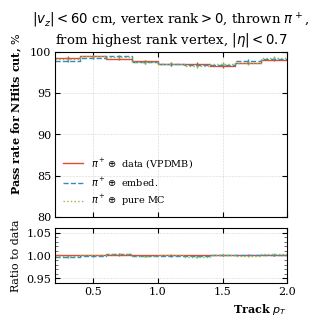

Saving single_track_embedding-output/cut_pass_rate_vs_pt_13059025_primaryTrackPassPossibleHitRatioCut.pgf


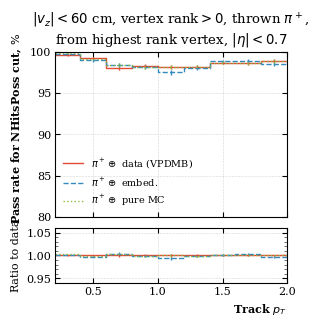

Saving single_track_embedding-output/cut_pass_rate_vs_pt_13059025_primaryTrackPassDcaCut.pgf


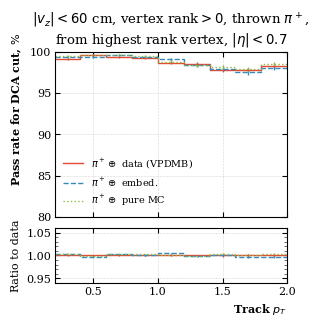

Saving single_track_embedding-output/cut_pass_rate_vs_pt_13059025_primaryTrackPassLastPointCut.pgf


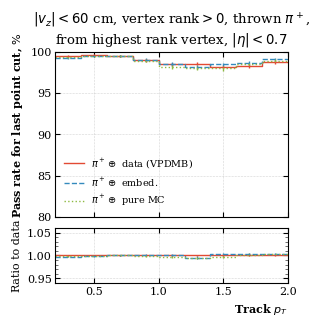

Saving single_track_embedding-output/cut_pass_rate_vs_pt_13059025_primaryTrackPassAllCuts.pgf


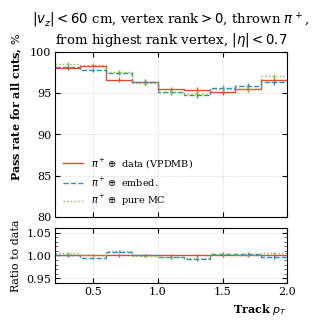

Saving single_track_embedding-output/cut_pass_rate_vs_eta_13059025_primaryTrackPassNHitsCut.pgf


Saving single_track_embedding-output/cut_pass_rate_vs_eta_13059025_primaryTrackPassPossibleHitRatioCut.pgf


Saving single_track_embedding-output/cut_pass_rate_vs_eta_13059025_primaryTrackPassDcaCut.pgf


Saving single_track_embedding-output/cut_pass_rate_vs_eta_13059025_primaryTrackPassLastPointCut.pgf


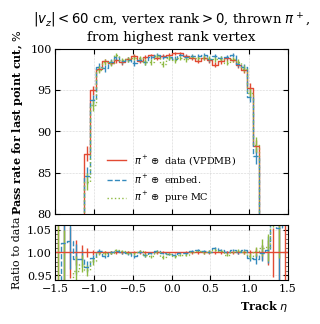

/nix/store/ax30w3frjnlbgyndv20i5b55zp1b659j-python3.7-matplotlib-3.1.3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:3369: RuntimeWarning: invalid value encountered in double_scalars
  low = [v - e for v, e in zip(data, a)]
/nix/store/ax30w3frjnlbgyndv20i5b55zp1b659j-python3.7-matplotlib-3.1.3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:3369: RuntimeWarning: invalid value encountered in double_scalars
  low = [v - e for v, e in zip(data, a)]


Saving single_track_embedding-output/cut_pass_rate_vs_eta_13059025_primaryTrackPassAllCuts.pgf


Saving single_track_embedding-output/cut_pass_rate_vs_pt_13059025_eplus_primaryTrackPassNHitsCut.pgf


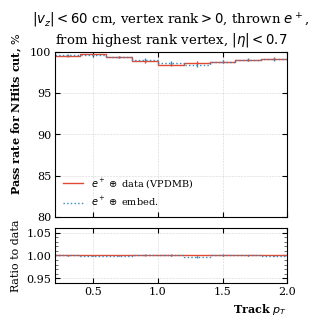

Saving single_track_embedding-output/cut_pass_rate_vs_pt_13059025_eplus_primaryTrackPassPossibleHitRatioCut.pgf


Saving single_track_embedding-output/cut_pass_rate_vs_pt_13059025_eplus_primaryTrackPassDcaCut.pgf


Saving single_track_embedding-output/cut_pass_rate_vs_pt_13059025_eplus_primaryTrackPassLastPointCut.pgf


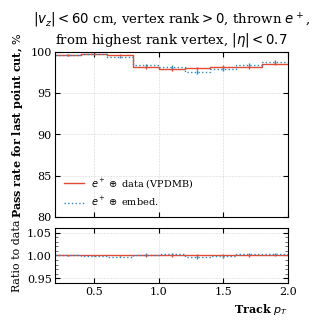

Saving single_track_embedding-output/cut_pass_rate_vs_pt_13059025_eplus_primaryTrackPassAllCuts.pgf


Saving single_track_embedding-output/cut_pass_rate_vs_eta_13059025_eplus_primaryTrackPassNHitsCut.pgf


Saving single_track_embedding-output/cut_pass_rate_vs_eta_13059025_eplus_primaryTrackPassPossibleHitRatioCut.pgf


Saving single_track_embedding-output/cut_pass_rate_vs_eta_13059025_eplus_primaryTrackPassDcaCut.pgf


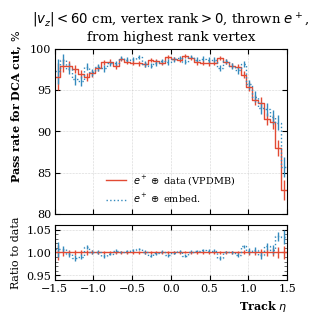

Saving single_track_embedding-output/cut_pass_rate_vs_eta_13059025_eplus_primaryTrackPassLastPointCut.pgf


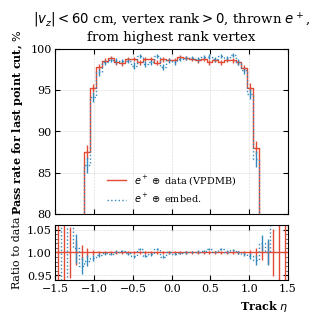

Saving single_track_embedding-output/cut_pass_rate_vs_eta_13059025_eplus_primaryTrackPassAllCuts.pgf


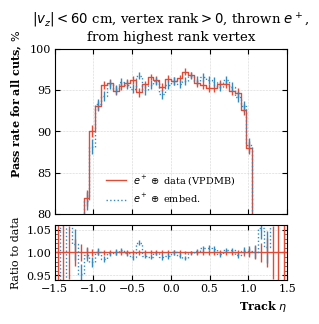

/Users/veprbl/star-jet/study/tracking_efficiency/utils/efficiency.py:84: RuntimeWarning: invalid value encountered in less
  def apply_vz_cut(pqs, cond=lambda vz: np.abs(vz) < 60):


Saving single_track_embedding-output/cut_pass_rate_vs_pt_13104003_primaryTrackPassNHitsCut.pgf


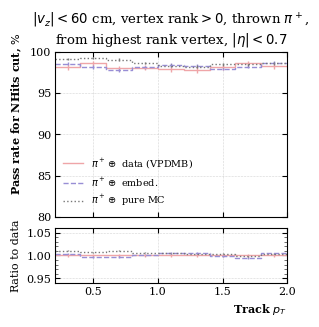

Saving single_track_embedding-output/cut_pass_rate_vs_pt_13104003_primaryTrackPassPossibleHitRatioCut.pgf


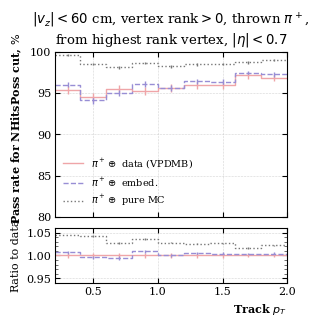

Saving single_track_embedding-output/cut_pass_rate_vs_pt_13104003_primaryTrackPassDcaCut.pgf


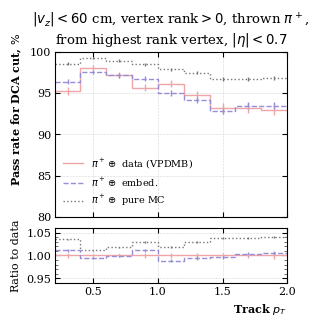

Saving single_track_embedding-output/cut_pass_rate_vs_pt_13104003_primaryTrackPassLastPointCut.pgf


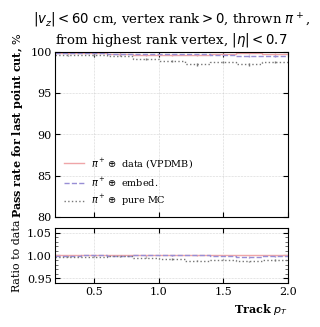

Saving single_track_embedding-output/cut_pass_rate_vs_pt_13104003_primaryTrackPassAllCuts.pgf


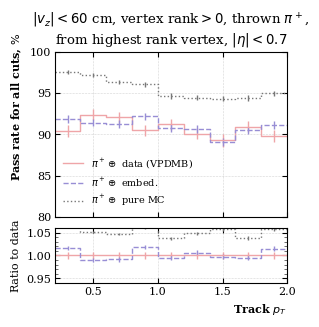

Saving single_track_embedding-output/cut_pass_rate_vs_eta_13104003_primaryTrackPassNHitsCut.pgf


Saving single_track_embedding-output/cut_pass_rate_vs_eta_13104003_primaryTrackPassPossibleHitRatioCut.pgf


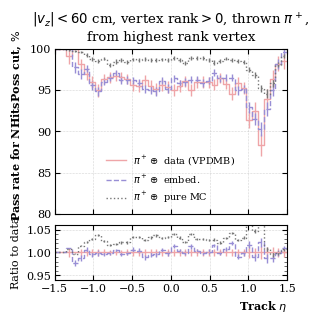

Saving single_track_embedding-output/cut_pass_rate_vs_eta_13104003_primaryTrackPassDcaCut.pgf


/nix/store/ax30w3frjnlbgyndv20i5b55zp1b659j-python3.7-matplotlib-3.1.3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:3369: RuntimeWarning: invalid value encountered in double_scalars
  low = [v - e for v, e in zip(data, a)]
/nix/store/ax30w3frjnlbgyndv20i5b55zp1b659j-python3.7-matplotlib-3.1.3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:3369: RuntimeWarning: invalid value encountered in double_scalars
  low = [v - e for v, e in zip(data, a)]


Saving single_track_embedding-output/cut_pass_rate_vs_eta_13104003_primaryTrackPassLastPointCut.pgf


/nix/store/ax30w3frjnlbgyndv20i5b55zp1b659j-python3.7-matplotlib-3.1.3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:3369: RuntimeWarning: invalid value encountered in double_scalars
  low = [v - e for v, e in zip(data, a)]
/nix/store/ax30w3frjnlbgyndv20i5b55zp1b659j-python3.7-matplotlib-3.1.3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:3369: RuntimeWarning: invalid value encountered in double_scalars
  low = [v - e for v, e in zip(data, a)]


Saving single_track_embedding-output/cut_pass_rate_vs_eta_13104003_primaryTrackPassAllCuts.pgf


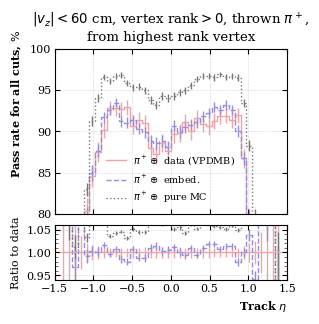

In [12]:
cuts_of_interest = [
    ('primaryTrackPassNHitsCut', "NHits cut"),
    ('primaryTrackPassPossibleHitRatioCut', "NHitsPoss cut"),
    ('primaryTrackPassDcaCut', "DCA cut"),
    ('primaryTrackPassLastPointCut', "last point cut"),
    ('primaryTrackPassAllCuts', "all cuts"),
]
var_bins = {
    "Track $p_T$": np.linspace(0.2, 2., 9 + 1),
    r"Track $\eta$": np.linspace(-1.5, 1.5, 40 + 1),
}
var_filename = {
    "Track $p_T$": "pt",
    r"Track $\eta$": "eta",
}
var_cuts = {
    "Track $p_T$": (", $|\eta| < 0.7$", lambda pqs: np.abs(flatten(pqs.tracks['primaryTrackEta'])) < 0.7),
    r"Track $\eta$": ("", lambda pqs: True),
}
variables = ["Track $p_T$", r"Track $\eta$"]

for plot_name, datasets in plot_sets.items():
    plots = {}
    for _pqs in datasets:
        pqs = utils.efficiency.apply_vz_cut(_pqs)
        good_true_tracks = (
            flatten(pqs.tracks['primaryTrackIsFromHighestRankingVertex'])
            & (flatten(pqs.tracks['primaryTrackVertexRank']) > 0)
            & is_embedded_track_id(flatten(pqs.tracks['primaryTrackIdTruth']))
        ).astype(np.int64)
        var_xs = {
            "Track $p_T$": flatten(pqs.tracks['primaryTrackPt']),
            r"Track $\eta$": flatten(pqs.tracks['primaryTrackEta']),
        }

        for var_name in variables:
            xs = var_xs[var_name]
            bins = var_bins[var_name]
            _, common_cuts_func = var_cuts[var_name]
            common_cuts = common_cuts_func(pqs)
            num_good, _ = np.histogram(xs, bins=bins, weights=(good_true_tracks & common_cuts))

            for cut_name, cut_label in cuts_of_interest:
                pass_cut_tracks = flatten(pqs.cuts[cut_name]).astype(np.int64)
                num_pass, _ = np.histogram(xs, bins=bins, weights=(good_true_tracks & common_cuts & pass_cut_tracks))
                ys = num_pass / num_good
                dys = utils.efficiency.calc_eff_uncertainty(num_pass, num_good)

                plots.setdefault((var_name, cut_name), []).append({
                    'ys': ys * 100,
                    'dys': dys * 100,
                    'vis_kwargs': _pqs.vis_kwargs
                })

    for var_name in variables:
        for cut_name, cut_label in cuts_of_interest:
            bins = var_bins[var_name]
            common_cuts_label, _ = var_cuts[var_name]
            _, ax = utils.plot.plot_vectors_with_ratio(plots[(var_name, cut_name)], bins=bins)

            utils.plot.setup_ratio_plot(ax, fine_agreement=True)
            plt.sca(ax[0])
            plt.ylim(80., 100.)
            plt.legend(loc='lower center' if var_name == r"Track $\eta$" else 'lower left')
            particle_species = plots[(var_name, cut_name)][0]['vis_kwargs']['label'].split(r" \oplus$")[0] + "$"
            plt.title(rf"$|v_z| < 60$ cm, vertex rank$ > 0$, thrown {particle_species}," + "\n" + r"from highest rank vertex" + common_cuts_label)
            utils.plot.set_label(y=f"Pass rate for {cut_label}, $\%$", offset=1.12)
            plt.sca(ax[1])
            utils.plot.set_label(x=var_name)
            save_fig(f"cut_pass_rate_vs_{var_filename[var_name]}_{plot_name}_{cut_name}")
            plt.show()

We now present the result for the tracking efficiency. First, using a
summary plot for the tracking efficiency averaged over a large region
of the phase space to maximize the statistical precision.

In [13]:
efficiency_results = {}

for plot_name, datasets in plot_sets_for_summary.items():
    for __pqs in datasets:
        _pqs = utils.efficiency.apply_eta_thrown_cut(__pqs)
        for vz_cut in [60, 30, 10]:
            pqs = utils.efficiency.apply_vz_cut(
                _pqs,
                cond=lambda vz: np.abs(vz) < vz_cut
            )
            eff = utils.efficiency.calc_efficiency(pqs)
            label = __pqs.vis_kwargs['label']
            efficiency_results.setdefault(plot_name, {}).setdefault(label, []).append({
                'vz_cut': vz_cut,
                'eff': eff,
                'vis_kwargs': __pqs.vis_kwargs,
            })

/nix/store/gpsgzr8nc46marcxq0q85h0jhljxxcbv-python3.7-ipykernel-5.1.4/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


Saving single_track_embedding-output/eff_summary_13059025_jp_primaryTrackPassAllCuts.pgf


Saving single_track_embedding-output/eff_summary_13104003_jp_primaryTrackPassAllCuts.pgf


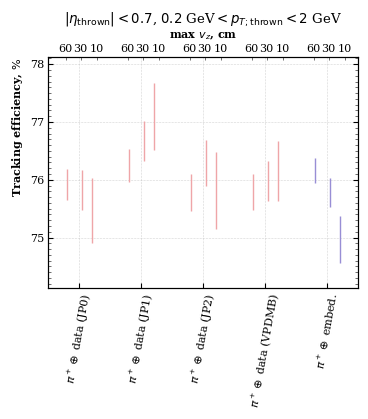

Saving single_track_embedding-output/eff_summary_13104003_mc_primaryTrackPassAllCuts.pgf


In [14]:
for plot_name, results in efficiency_results.items():
    labels = list(results.keys())
    labels.sort()
    xs = np.arange(0.5, 0.5 + len(labels), 1.)

    figsize = (len(xs) * 0.8, 3)
    plt.figure(figsize=figsize)
    for x, label in zip(xs, labels):
        for result in results[label]:
            plt.errorbar(x + (35 - result['vz_cut']) / 50 * 0.4,
                         result['eff'][2] * 100,
                         yerr=result['eff'][3] * 100,
                         fmt='none',
                         **result['vis_kwargs']
            )

    plt.xticks(xs, labels, rotation=80)
    if plot_name != "13104003_mc":
        plt.title(r"$|\eta_{\mathrm{thrown}}| < 0.7$, $0.2$ GeV$ < p_{T\mathrm{;thrown}} < 2$ GeV")
    utils.plot.set_label(y=f"Tracking efficiency, $\%$")
    plt.gca().yaxis.set_major_locator(mpl.ticker.MultipleLocator(base=1.0))
    plt.gca().yaxis.set_minor_locator(mpl.ticker.MultipleLocator(base=0.1))
    plt.xlim(0., len(labels))
    ylim_min, ylim_max = plt.gca().get_ylim()
    ylim_mean = (ylim_min + ylim_max) / 2
    plt.ylim(ylim_mean - 2., ylim_mean + 2.)
    ax1 = plt.gca()
    ax2 = ax1.twiny()
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks([])
    ax2.set_xticks(np.sort(np.concatenate([xs + 2.5 / 50 * 0.4, xs + 35 / 50 * 0.4, xs - 27.5 / 50 * 0.4])), minor=True)
    ax2.set_xticklabels(["60", "30", "10"] * len(xs), minor=True)
    ax2.set_xlabel("max $v_z$, cm", fontweight='semibold')
    # dirty hack
    bbox_inches = mpl.transforms.Bbox.from_bounds(-0.4 + figsize[0] * 0.13, -0.8, figsize[0] * 0.77 + 0.5, figsize[1] + 0.9)
    save_fig(f"eff_summary_{plot_name}_{cut_name}", bbox_inches=bbox_inches)
    plt.show()

Finally, the tracking efficiency is presented as a function of
particle momentum and as a function of the charged jet p_T.
Unfortunately, the latter projection doesn't have enough statistics in
the current sample.

In [15]:
eff_var_bins = {
    "pt": np.linspace(0.2, 2., 9 + 1),
    "eta": np.linspace(-1.5, 1.5, 30 + 1),
    "leading_jet_pt": np.array([3., 3.5, 4., 5., 6., 8., 14.]),
}
eff_variables = ["pt", "eta", "leading_jet_pt"]

eff_plots = {}

for plot_name, datasets in plot_sets.items():
    for __pqs in datasets:
        _pqs = utils.efficiency.apply_vz_cut(__pqs)
        for var_name in eff_variables:
            bins = eff_var_bins[var_name]
            if var_name == "pt":
                pqs = utils.efficiency.apply_thrown_eta_cut(_pqs)
                var = pqs.rs_geant["thrownPt"].values
            elif var_name == "eta":
                pqs = _pqs
                var = pqs.rs_geant["thrownEta"].values
            elif var_name == "leading_jet_pt":
                pqs = utils.common.select_require_chg_jets(utils.efficiency.apply_thrown_eta_cut(_pqs))
                var = pqs.jets.apply(lambda jets: np.max([jet.pt for jet in jets], initial=0)).values
            else:
                raise KeyError()

            ys = []
            dys = []

            for var_min, var_max in zip(bins[:-1], bins[1:]):
                cond = (var_min <= var) & (var < var_max)
                _, _, y, dy = utils.efficiency.calc_efficiency(pqs.iloc[cond])
                ys.append(y)
                dys.append(dy)

            eff_plots.setdefault(plot_name, {}).setdefault(var_name, []).append({
                'bins': bins,
                'ys': np.array(ys) * 100,
                'dys': np.array(dys) * 100,
                'vis_kwargs': __pqs.vis_kwargs
            })

/Users/veprbl/star-jet/study/tracking_efficiency/utils/efficiency.py:84: RuntimeWarning: invalid value encountered in less
  def apply_vz_cut(pqs, cond=lambda vz: np.abs(vz) < 60):


Saving single_track_embedding-output/eff_vs_pt_13059025.pgf


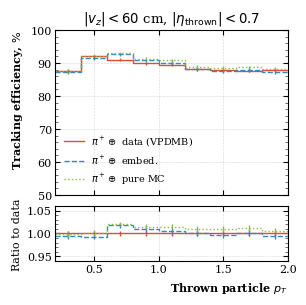

Saving single_track_embedding-output/eff_vs_eta_13059025.pgf


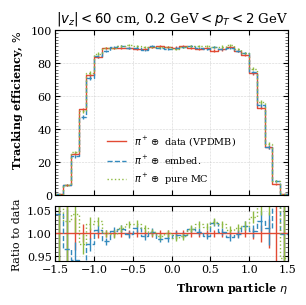

Saving single_track_embedding-output/eff_vs_leading_jet_pt_13059025.pgf


Saving single_track_embedding-output/eff_vs_pt_13059025_eplus.pgf


Saving single_track_embedding-output/eff_vs_eta_13059025_eplus.pgf


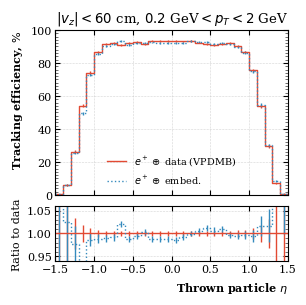

Saving single_track_embedding-output/eff_vs_leading_jet_pt_13059025_eplus.pgf


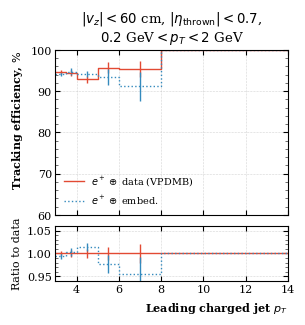

Saving single_track_embedding-output/eff_vs_pt_13104003.pgf


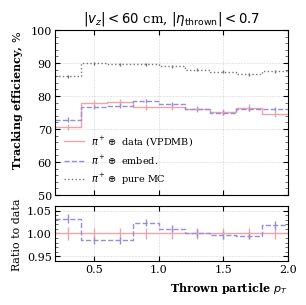

/nix/store/ax30w3frjnlbgyndv20i5b55zp1b659j-python3.7-matplotlib-3.1.3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:3369: RuntimeWarning: invalid value encountered in double_scalars
  low = [v - e for v, e in zip(data, a)]
/nix/store/ax30w3frjnlbgyndv20i5b55zp1b659j-python3.7-matplotlib-3.1.3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:3369: RuntimeWarning: invalid value encountered in double_scalars
  low = [v - e for v, e in zip(data, a)]


Saving single_track_embedding-output/eff_vs_eta_13104003.pgf


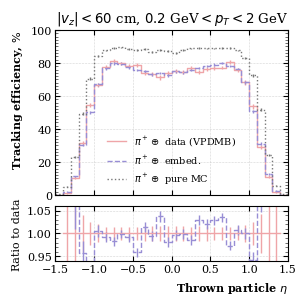

Saving single_track_embedding-output/eff_vs_leading_jet_pt_13104003.pgf


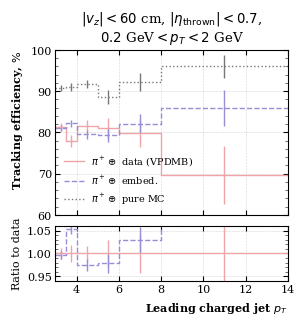

In [16]:
var_title = {
    "pt": "$|v_z| < 60$ cm, $|\\eta_{\\mathrm{thrown}}| < 0.7$",
    "eta": "$|v_z| < 60$ cm, $0.2$ GeV$ < p_T < 2$ GeV",
    "leading_jet_pt": "$|v_z| < 60$ cm, $|\\eta_{\\mathrm{thrown}}| < 0.7$,\n$0.2$ GeV$ < p_T < 2$ GeV"
}
var_label = {
    "pt": r"Thrown particle $p_T$",
    "eta": r"Thrown particle $\eta$",
    "leading_jet_pt": "Leading charged jet $p_T$",
}
var_ylim = {
    "pt": (50., 100.),
    "eta": (0., 100.),
    "leading_jet_pt": (60., 100.),
}

for plot_name, plots in eff_plots.items():
    for var_name, plot in plots.items():
        bins = eff_var_bins[var_name]
        _, ax = utils.plot.plot_vectors_with_ratio(plot, bins=bins)

        utils.plot.setup_ratio_plot(ax, fine_agreement=True)
        plt.sca(ax[0])
        plt.ylim(*var_ylim[var_name])
        plt.legend(loc='lower center' if var_name == "eta" else 'lower left')
        plt.title(var_title[var_name])
        utils.plot.set_label(y=f"Tracking efficiency, $\%$")
        plt.gca().yaxis.set_minor_locator(mpl.ticker.MultipleLocator(base=2.))
        plt.sca(ax[1])
        utils.plot.set_label(x=var_label[var_name])
        save_fig(f"eff_vs_{var_name}_{plot_name}")
        plt.show()